In [1]:
from halka_arz_functions import *

## Collecting Halka arz data.

In [2]:
year_period = 3
start, end = Delta_Time(years=3)
url = 'https://halkarz.com/k/halka-arz/'
print(f"Stard date {start}, end date {end}.")

Stard date 2021-04-16, end date 2024-04-16.


### Collecting name of stocks

In [8]:
start_year = dt.datetime.today().year
year_period = 3
halka_arz_pages = {}
stocks = {}
for i in range(year_period):
    year_page = url+f'{start_year - i}/'
    #halka_arz_pages.update({page : {'Pages':page_urls(page)}})
    pages = page_urls(year_page)
    for page in pages:
        page_soup = make_soup(page)
        stocks_ = page_soup.find_all(class_ = "halka-arz-list archives")
        for stock in stocks_:
            stock_content = stock.find(class_ = 'il-content')
            stock_symbol = stock_content.find(class_ = 'il-bist-kod').get_text(strip=True)
            stock_name = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['title']
            stock_page = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['href']
            stocks.update({stock_symbol :
                            {'url':stock_page,
                             'stock_name':stock_name,
                             'release_year':start_year-i}})

### Collecting details for stocks

In [3]:
for stock in stocks:
    stocks[stock].update({'Halka_arz_info': get_halka_arz_info(stocks[stock]['url'])})
    stocks[stock].update({'Halka_arz_result': get_halka_arz_result(stocks[stock]['url'])})

NameError: name 'stocks' is not defined

### Collecting historical data

In [16]:
for stock in stocks:
    print(stock)
    stocks[stock].update({'Hist_data': get_hist_data(stock, start_date=start, end_date=end)})

RGYAS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RGYAS.IS']: Exception('%ticker%: No timezone found, symbol may be delisted')



RGYAS DONE BY GOOGLE FINANCE
ENTRA
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENTRA.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



ENTRA DONE BY GOOGLE FINANCE
ODINE
[*********************100%%**********************]  1 of 1 completed
MOGAN
[*********************100%%**********************]  1 of 1 completed
ARTMS
[*********************100%%**********************]  1 of 1 completed
OBAMS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OBAMS.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



OBAMS DONE BY GOOGLE FINANCE
ALVES
[*********************100%%**********************]  1 of 1 completed
LMKDC
[*********************100%%**********************]  1 of 1 completed
BORSK
[*********************100%%**********************]  1 of 1 completed
PATEK
[*********************100%%**********************]  1 of 1 completed
AVPGY
[*********************100%%**********************]  1 of 1 completed
MEGMT
[*********************100%%**********************]  1 of 1 completed
KBORU
[*********************100%%**********************]  1 of 1 completed
SURGY
[*********************100%%**********************]  1 of 1 completed
CATES
[*********************100%%**********************]  1 of 1 completed
SKYMD
[*********************100%%**********************]  1 of 1 completed
BEGYO
[*********************100%%**********************]  1 of 1 completed
AGROT
[*********************100%%**********************]  1 of 1 completed
EKOS
[*********************100%%**********************]  1 of 1 comple

### Save data.

In [2]:
with open('stocks.p', 'wb') as handle:
    pickle.dump(stocks, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'stocks' is not defined

## Data preparation

In [95]:
with open('stocks.p', 'rb') as handle:
    Stocks_copy = pickle.load(handle)

### Prepating stock info data

In [97]:
halka_arz_info_df = pd.DataFrame()
for stock in Stocks_copy:
    halka_arz_info_df = pd.concat([halka_arz_info_df, Stocks_copy[stock]['Halka_arz_info']], axis=0, join='outer', ignore_index='True')
halka_arz_info_df.head()

,Halka Arz Tarihi :,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,\n Aracı Kurum : \n (Konsorsiyum)\n,Bist Kodu :,Pazar :,\n Aracı Kurum : \n,Bist İlk İşlem Tarihi :,Fiili Dolaşımdaki Pay :,Fiili Dolaşımdaki Pay Oranı (%) :,Endeks :,Ek Pay :
0,\n 17-18-19 Nisan 2024\n ...,"135,00 TL",Eşit Dağıtım **,"33,357,450 Lot",Ak Yatırım Menkul Değerler A.Ş.\n ...,RGYAS,Yıldız Pazar,NaN,NaN,NaN,NaN,NaN,NaN
1,\n 27-28-29 Mart 2024\n ...,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",NaN,ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,4 Nisan 2024,NaN,NaN,NaN,NaN
2,\n 13-14-15 Mart 2024\n ...,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",NaN,ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,21 Mart 2024,"43,534,318 Lot",%39.39,NaN,NaN
3,\n 28-29 Şubat - 1 Mart 202...,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",NaN,MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,7 Mart 2024,"262,555,096 Lot",%10.75,BIST500,NaN
4,\n 27-28 Şubat 2024\n ...,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",NaN,ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,4 Mart 2024,"19,998,335 Lot",%28.56,BIST500,NaN


In [98]:
# Since there is only pre halka arz info for stock at top of list.
halka_arz_info_df.drop(index=0, inplace=True)
halka_arz_info_df.reset_index(drop=True, inplace=True)

In [99]:
# Fixing time column
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = halka_arz_info_df["Bist İlk İşlem Tarihi : "].apply(fix_time_it)
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = pd.to_datetime(halka_arz_info_df["Bist İlk İşlem Tarihi : "])
halka_arz_info_df.head()

,Halka Arz Tarihi :,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,\n Aracı Kurum : \n (Konsorsiyum)\n,Bist Kodu :,Pazar :,\n Aracı Kurum : \n,Bist İlk İşlem Tarihi :,Fiili Dolaşımdaki Pay :,Fiili Dolaşımdaki Pay Oranı (%) :,Endeks :,Ek Pay :
0,\n 27-28-29 Mart 2024\n ...,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",NaN,ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,2024-04-04,NaN,NaN,NaN,NaN
1,\n 13-14-15 Mart 2024\n ...,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",NaN,ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,"43,534,318 Lot",%39.39,NaN,NaN
2,\n 28-29 Şubat - 1 Mart 202...,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",NaN,MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07,"262,555,096 Lot",%10.75,BIST500,NaN
3,\n 27-28 Şubat 2024\n ...,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",NaN,ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04,"19,998,335 Lot",%28.56,BIST500,NaN
4,\n 22-23 Şubat 2024\n ...,"39,24 TL",Eşit Dağıtım,"96,336,345 Lot",NaN,OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01,"96,325,004 Lot",%20.09,BIST500,NaN


In [100]:
halka_arz_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                   --------------  -----         
 0   Halka Arz Tarihi :                                                                                       103 non-null    object        
 1   Halka Arz Fiyatı/Aralığı :                                                                               103 non-null    object        
 2   Dağıtım Yöntemi :                                                                                        103 non-null    object        
 3   Pay :                                                                                                    103 non-null    object        
 4   
               Aracı Kurum : 
             

In [101]:
# Droping unnecessary columns and fix some columns
info_df = halka_arz_info_df.drop(columns=['Halka Arz Tarihi : ',
                                        "\n               Aracı Kurum : \n                              (Konsorsiyum)\n                            ",
                                        'Endeks : ','Ek Pay : ',
                                        'Fiili Dolaşımdaki Pay :', 
                                        'Fiili Dolaşımdaki Pay Oranı (%) :'])
info_df.rename(columns={"\n               Aracı Kurum : \n                            ": "Aracı Kurum : ",
                         "Bist Kodu : ": "Symbol"}, inplace=True)
info_df.head()

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Symbol,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :
0,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,2024-04-04
1,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21
2,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07
3,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04
4,"39,24 TL",Eşit Dağıtım,"96,336,345 Lot",OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01


In [102]:
# Fixing price column
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].astype(str)
info_df['Halka Arz Fiyatı/Aralığı : '].dropna(inplace=True)
info_df.drop(info_df[info_df['Halka Arz Fiyatı/Aralığı : '] == 'nan'].index, inplace=True)
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].apply(value_fix, replace=True)

In [103]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :   103 non-null    float64       
 1   Dağıtım Yöntemi :            103 non-null    object        
 2   Pay :                        103 non-null    object        
 3   Symbol                       103 non-null    object        
 4   Pazar :                      103 non-null    object        
 5   Aracı Kurum :                103 non-null    object        
 6   Bist İlk İşlem Tarihi :      103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.8+ KB


### Preparing historical data

In [104]:
halka_arz_result_df = pd.DataFrame()
for symbol in Stocks_copy:
    for col in Stocks_copy[symbol]['Halka_arz_result'].columns:
        Stocks_copy[symbol]['Halka_arz_result'][col] = Stocks_copy[symbol]['Halka_arz_result'][col].apply(value_fix_dot)
    Stocks_copy[symbol]['Halka_arz_result']['Symbol'] = str(symbol)
    if Stocks_copy[symbol]['Hist_data'].shape[0] == 0:
        continue
    Stocks_copy[symbol]['Halka_arz_result']['Hype_Days'] = get_hyped_days(Stocks_copy[symbol]['Hist_data'])
    halka_arz_result_df = pd.concat([halka_arz_result_df, Stocks_copy[symbol]['Halka_arz_result']], axis=0, join='outer')
halka_arz_result_df.head()

,Yurt İçi Bireysel_Kisi,Yurt İçi Bireysel_Lot,Yurt İçi Kurumsal_Kisi,Yurt İçi Kurumsal_Lot,Symbol,Hype_Days,Yurt Dışı Kurumsal_Kisi,Yurt Dışı Kurumsal_Lot,Yurt Dışı Bireysel_Kisi,Yurt Dışı Bireysel_Lot,...,Yurtiçi Kurumsal_Kisi,Yurtiçi Kurumsal_Lot,Yurtdışı Bireysel_Kisi,Yurtdışı Bireysel_Lot,Yurtdışı Kurumsal_Kisi,Yurtdışı Kurumsal_Lot,Yüksek Başvurulu_Kisi,Yüksek Başvurulu_Lot,Yüksek Başvurulu Bireysel_Kisi,Yüksek Başvurulu Bireysel_Lot
0,3586255.0,277174288.0,276.0,92391429.0,ENTRA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3198260.0,26520000.0,182.0,15470000.0,ODINE,10.0,4.0,2210000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3502171.0,210108000.0,212.0,52527000.0,MOGAN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2185014.0,19959421.0,49.0,448.0,ARTMS,9.0,NaN,NaN,4435.0,40131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3388122.0,47204809.0,268.0,43351355.0,OBAMS,6.0,13.0,4816818.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Here there are some problems due to website. Gonna change NaN ones with 0 for later calculations.
halka_arz_result_df.fillna(0, inplace=True)
halka_arz_result_df.reset_index(inplace=True, drop=True)
halka_arz_result_df.head()

,Yurt İçi Bireysel_Kisi,Yurt İçi Bireysel_Lot,Yurt İçi Kurumsal_Kisi,Yurt İçi Kurumsal_Lot,Symbol,Hype_Days,Yurt Dışı Kurumsal_Kisi,Yurt Dışı Kurumsal_Lot,Yurt Dışı Bireysel_Kisi,Yurt Dışı Bireysel_Lot,...,Yurtiçi Kurumsal_Kisi,Yurtiçi Kurumsal_Lot,Yurtdışı Bireysel_Kisi,Yurtdışı Bireysel_Lot,Yurtdışı Kurumsal_Kisi,Yurtdışı Kurumsal_Lot,Yüksek Başvurulu_Kisi,Yüksek Başvurulu_Lot,Yüksek Başvurulu Bireysel_Kisi,Yüksek Başvurulu Bireysel_Lot
0,3586255.0,277174288.0,276.0,92391429.0,ENTRA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3198260.0,26520000.0,182.0,15470000.0,ODINE,10.0,4.0,2210000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3502171.0,210108000.0,212.0,52527000.0,MOGAN,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2185014.0,19959421.0,49.0,448.0,ARTMS,9.0,0.0,0.0,4435.0,40131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3388122.0,47204809.0,268.0,43351355.0,OBAMS,6.0,13.0,4816818.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
# Better check columns here, it may change.
halka_arz_result_df.columns

Index(['Yurt İçi Bireysel_Kisi', 'Yurt İçi Bireysel_Lot',
       'Yurt İçi Kurumsal_Kisi', 'Yurt İçi Kurumsal_Lot', 'Symbol',
       'Hype_Days', 'Yurt Dışı Kurumsal_Kisi', 'Yurt Dışı Kurumsal_Lot',
       'Yurt Dışı Bireysel_Kisi', 'Yurt Dışı Bireysel_Lot',
       'Şirket Çalışanları_Kisi', 'Şirket Çalışanları_Lot',
       'Şirket Çalışanları & Çiftçi Grubu_Kisi',
       'Şirket Çalışanları & Çiftçi Grubu_Lot', 'Grup Çalışanları_Kisi',
       'Grup Çalışanları_Lot', 'Yurt İçi Gerçek Kişi_Kisi',
       'Yurt İçi Gerçek Kişi_Lot', 'Yurt Dışı Gerçek Kişi_Kisi',
       'Yurt Dışı Gerçek Kişi_Lot', 'Kale Grubu Çalışanları_Kisi',
       'Kale Grubu Çalışanları_Lot',
       'Şirket Çalışanları / Çiftçi Yatırımcı_Kisi',
       'Şirket Çalışanları / Çiftçi Yatırımcı_Lot', 'Yurtiçi Bireysel_Kisi',
       'Yurtiçi Bireysel_Lot', 'Yurtiçi Kurumsal_Kisi', 'Yurtiçi Kurumsal_Lot',
       'Yurtdışı Bireysel_Kisi', 'Yurtdışı Bireysel_Lot',
       'Yurtdışı Kurumsal_Kisi', 'Yurtdışı Kurumsal_Lot',
    

In [107]:
# Grouping participants
df = pd.DataFrame()
df['Symbol'] = halka_arz_result_df['Symbol']
df['HypeDays'] = halka_arz_result_df['Hype_Days']
df['Yurtici_Kisi'] = halka_arz_result_df['Yurt İçi Bireysel_Kisi'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtiçi Bireysel_Kisi']
df['Yurtici_Lot'] = halka_arz_result_df['Yurt İçi Bireysel_Lot'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtiçi Bireysel_Lot']
df['Yurtdisi_Kisi'] = halka_arz_result_df['Yurt Dışı Bireysel_Kisi'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtdışı Bireysel_Kisi']
df['Yurtdisi_Lot'] = halka_arz_result_df['Yurt Dışı Bireysel_Lot'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtdışı Bireysel_Lot']
df['Yurtici_Kurumsal'] = halka_arz_result_df['Yurt İçi Kurumsal_Kisi']  + halka_arz_result_df['Yurtiçi Kurumsal_Kisi']
df['Yurtici_Kurumsal_Lot'] = halka_arz_result_df['Yurt İçi Kurumsal_Lot']  + halka_arz_result_df['Yurtiçi Kurumsal_Lot']
df['Yurtdisi_Kurumsal'] = halka_arz_result_df['Yurt Dışı Kurumsal_Kisi']  + halka_arz_result_df['Yurtdışı Kurumsal_Kisi']
df['Yurtdisi_Kurumsal_Lot'] = halka_arz_result_df['Yurt Dışı Kurumsal_Lot']  + halka_arz_result_df['Yurtdışı Kurumsal_Lot']
df['Sirket_Calisanlari_Kisi'] = halka_arz_result_df['Şirket Çalışanları_Kisi'] + halka_arz_result_df['Grup Çalışanları_Kisi'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Kisi'] + halka_arz_result_df['Kale Grubu Çalışanları_Kisi'] 
df['Sirket_Calisanlari_Lot'] = halka_arz_result_df['Şirket Çalışanları_Lot'] + halka_arz_result_df['Grup Çalışanları_Lot'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Lot'] + halka_arz_result_df['Kale Grubu Çalışanları_Lot'] 
df['Yuksek Başvurulu_Kisi'] = halka_arz_result_df['Yüksek Başvurulu_Kisi']
df['Yuksek Başvurulu_Lot'] = halka_arz_result_df['Yüksek Başvurulu_Lot']
df['Yuksek Başvurulu Bireysel_Kisi'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Kisi']
df['Yuksek Başvurulu Bireysel_Lot'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Lot']
df.head()

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,Sirket_Calisanlari_Kisi,Sirket_Calisanlari_Lot,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot
0,ENTRA,0.0,3586255.0,277174288.0,0.0,0.0,276.0,92391429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,421.0,963363.0,0.0,0.0,0.0,0.0


In [108]:
df['Total_Lot'] = df['Yurtici_Lot'] + df['Yurtdisi_Lot'] + df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'] + df['Sirket_Calisanlari_Lot'] + df['Yuksek Başvurulu_Lot'] + df['Yuksek Başvurulu Bireysel_Lot']
df['Total_Kisi'] = df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'] + df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'] + df['Sirket_Calisanlari_Kisi'] + df['Yuksek Başvurulu_Kisi'] + df['Yuksek Başvurulu Bireysel_Kisi']
df['Kurumsal_Oran'] = (df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Oran'] = (df['Yurtici_Lot'] + df['Yurtdisi_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Kisi_Oran'] = (df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'])/df['Total_Kisi'] * 100
df['Kurumsal_Kisi_Oran'] = (df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'])/df['Total_Kisi'] * 100
df

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,...,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot,Total_Lot,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran
0,ENTRA,0.0,3586255.0,277174288.0,0.0,0.0,276.0,92391429.0,0.0,0.0,...,0.0,0.0,0.0,0.0,369565717.0,3586531.0,25.000000,75.000000,99.992305,0.007695
1,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,...,0.0,0.0,0.0,0.0,44200000.0,3198446.0,40.000000,60.000000,99.994185,0.005815
2,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,262635000.0,3502383.0,20.000000,80.000000,99.993947,0.006053
3,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20000000.0,2189498.0,0.002240,99.997760,99.997762,0.002238
4,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,...,0.0,0.0,0.0,0.0,96336345.0,3388824.0,50.000001,49.000000,99.979285,0.008292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,HTTBT,1.0,45712.0,7038462.0,0.0,0.0,87.0,12317307.0,8.0,8798077.0,...,2461.0,7038462.0,0.0,0.0,35192308.0,48268.0,59.999998,20.000001,94.704566,0.196818
99,INVES,1.0,122015.0,34390197.0,139.0,19440.0,48.0,3089363.0,1.0,1000.0,...,0.0,0.0,0.0,0.0,37500000.0,122203.0,8.240968,91.759032,99.959903,0.040097
100,DAPGM,1.0,45390.0,25815806.0,0.0,0.0,46.0,4204194.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30020000.0,45436.0,14.004644,85.995356,99.898759,0.101241
101,HUNER,0.0,242732.0,129801807.0,319.0,172130.0,49.0,26063.0,0.0,0.0,...,0.0,0.0,0.0,0.0,130000000.0,243100.0,0.020048,99.979952,99.979844,0.020156


In [109]:
df.drop(index=0, inplace=True) # Im droping it for this time, due to hyped days.
df.reset_index(drop=True)

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,...,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot,Total_Lot,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran
0,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,...,0.0,0.0,0.0,0.0,44200000.0,3198446.0,40.000000,60.000000,99.994185,0.005815
1,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,262635000.0,3502383.0,20.000000,80.000000,99.993947,0.006053
2,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20000000.0,2189498.0,0.002240,99.997760,99.997762,0.002238
3,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,...,0.0,0.0,0.0,0.0,96336345.0,3388824.0,50.000001,49.000000,99.979285,0.008292
4,ALVES,9.0,2870401.0,32000000.0,0.0,0.0,215.0,8000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40000000.0,2870616.0,20.000000,80.000000,99.992510,0.007490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,HTTBT,1.0,45712.0,7038462.0,0.0,0.0,87.0,12317307.0,8.0,8798077.0,...,2461.0,7038462.0,0.0,0.0,35192308.0,48268.0,59.999998,20.000001,94.704566,0.196818
98,INVES,1.0,122015.0,34390197.0,139.0,19440.0,48.0,3089363.0,1.0,1000.0,...,0.0,0.0,0.0,0.0,37500000.0,122203.0,8.240968,91.759032,99.959903,0.040097
99,DAPGM,1.0,45390.0,25815806.0,0.0,0.0,46.0,4204194.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30020000.0,45436.0,14.004644,85.995356,99.898759,0.101241
100,HUNER,0.0,242732.0,129801807.0,319.0,172130.0,49.0,26063.0,0.0,0.0,...,0.0,0.0,0.0,0.0,130000000.0,243100.0,0.020048,99.979952,99.979844,0.020156


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 1 to 102
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          102 non-null    object 
 1   HypeDays                        102 non-null    float64
 2   Yurtici_Kisi                    102 non-null    float64
 3   Yurtici_Lot                     102 non-null    float64
 4   Yurtdisi_Kisi                   102 non-null    float64
 5   Yurtdisi_Lot                    102 non-null    float64
 6   Yurtici_Kurumsal                102 non-null    float64
 7   Yurtici_Kurumsal_Lot            102 non-null    float64
 8   Yurtdisi_Kurumsal               102 non-null    float64
 9   Yurtdisi_Kurumsal_Lot           102 non-null    float64
 10  Sirket_Calisanlari_Kisi         102 non-null    float64
 11  Sirket_Calisanlari_Lot          102 non-null    float64
 12  Yuksek Başvurulu_Kisi           102 

### Extra

There is one more thing I want to add, their sectors and values.  In order to do this, I will use 'isyatirim' page.

In [111]:
page = 'https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx#page-1'
df_extra = pd.read_html(page)[2]
df_extra.head()

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,A1CAP,A1 Capital,Aracı Kurumlar,3376,"4.557,6",1413,259,1350
1,ACSEL,Acıselsan Acıpayam Selüloz,Kimyasal Ürün,15910,"1.705,8",529,483,107
2,ADEL,Adel Kalemcilik,Kırtasiye,75950,"17.943,2",5561,276,236
3,ADESE,Adese AVM,Perakande - Ticaret,232,"2.338,6",725,929,"1.008,0"
4,ADGYO,Adra GYO,GYO,2810,"8.253,0",2558,251,2937


In [112]:
# For this part, I have to fix ',' . 
def value_fix_(value):
    return float(value.replace('.','').split(',')[0])
df_extra['Piyasa Değeri (mn $)'] = df_extra['Piyasa Değeri (mn $)'].apply(value_fix_)

In [113]:
df_extra['Piyasa Değeri (mn TL)'] = df_extra['Piyasa Değeri (mn TL)'].apply(value_fix_)
df_extra['Sermaye (mn TL)'] = df_extra['Sermaye (mn TL)'].apply(value_fix_)

In [114]:
df_extra.columns

Index(['Kod', 'Hisse Adı', 'Sektör', 'Kapanış (TL)', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)'],
      dtype='object')

In [115]:
df_extra.rename(columns={"Kod": "Symbol"}, inplace=True)
df_extra.drop(columns=['Kapanış (TL)', 'Hisse Adı'], inplace=True)
df_extra.head()

,Symbol,Sektör,Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,A1CAP,Aracı Kurumlar,4557.0,1413.0,259,1350.0
1,ACSEL,Kimyasal Ürün,1705.0,529.0,483,107.0
2,ADEL,Kırtasiye,17943.0,5561.0,276,236.0
3,ADESE,Perakande - Ticaret,2338.0,725.0,929,1008.0
4,ADGYO,GYO,8253.0,2558.0,251,2937.0


This dataframe contains sectors, values and some extras. With help of this data, I can finally make one whole dataframe for halka arz stocks.

### Finishing

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
df = pd.merge(info_df, df, on=["Symbol"], how="inner")
df = pd.merge(df, df_extra, on="Symbol", how="inner")
df.head()

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Symbol,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :,HypeDays,Yurtici_Kisi,Yurtici_Lot,...,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran,Sektör,Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,30.00,Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,10.0,3198260.0,26520000.0,...,3198446.0,40.000000,60.00000,99.994185,0.005815,Teknoloji,9387.0,2909.0,400,1105.0
1,11.33,Eşit Dağıtım,"262,635,000 Lot",MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07,3.0,3502171.0,210108000.0,...,3502383.0,20.000000,80.00000,99.993947,0.006053,Elektrik Enerji Ürt.Teçh/Tesis Kurulum,39090.0,1211.0,108,2440.0
2,25.35,Eşit Dağıtım **,"20,000,000 Lot",ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04,9.0,2185014.0,19959421.0,...,2189498.0,0.002240,99.99776,99.997762,0.002238,Tekstil Entegre,3895.0,1207.0,286,700.0
3,39.24,Eşit Dağıtım,"96,336,345 Lot",OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01,6.0,3388122.0,47204809.0,...,3388824.0,50.000001,49.00000,99.979285,0.008292,Gıda,19627.0,6083.0,201,4794.0
4,19.45,Eşit Dağıtım,"40,000,000 Lot",ALVES,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-02-29,9.0,2870401.0,32000000.0,...,2870616.0,20.000000,80.00000,99.992510,0.007490,Kablo,9272.0,2874.0,250,1600.0


In [118]:
df["HypeDays"] = df["HypeDays"].astype(int)

In [155]:
df["Dağıtım Yöntemi : "].replace({"Eşit Dağıtım **": "Eşit Dağıtım"}, inplace=True)

In [156]:
df["Dağıtım Yöntemi : "].value_counts()

Dağıtım Yöntemi : 
0    81
1    21
Name: count, dtype: int64

In [157]:
var_map = {"Eşit Dağıtım": 0, "Oransal Dağıtım": 1}
df["Dağıtım Yöntemi : "].replace(var_map, inplace=True)

In [159]:
df.drop(columns=[ 'Pay : '], inplace=True)

## Data info

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :      102 non-null    float64       
 1   Dağıtım Yöntemi :               102 non-null    object        
 2   Pay :                           102 non-null    object        
 3   Symbol                          102 non-null    object        
 4   Pazar :                         102 non-null    object        
 5   Aracı Kurum :                   102 non-null    object        
 6   Bist İlk İşlem Tarihi :         102 non-null    datetime64[ns]
 7   HypeDays                        102 non-null    int64         
 8   Yurtici_Kisi                    102 non-null    float64       
 9   Yurtici_Lot                     102 non-null    float64       
 10  Yurtdisi_Kisi                   102 non-null    float64       
 11  Yurtdi

In [120]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Halka Arz Fiyatı/Aralığı :,102.0,25.636667,1.1,10.9775,18.05,28.1,130.0,25.406637
Bist İlk İşlem Tarihi :,102,2023-03-16 04:00:00,2022-02-18 00:00:00,2022-07-29 12:00:00,2023-04-23 00:00:00,2023-09-27 06:00:00,2024-03-21 00:00:00,NaN
HypeDays,102.0,4.872549,0.0,1.0,5.0,8.0,18.0,4.260506
Yurtici_Kisi,102.0,1519029.372549,5342.0,246077.5,1056224.0,2821444.0,4943543.0,1387874.879278
Yurtici_Lot,102.0,43026683.911765,2257920.0,11565000.0,26167903.0,50281250.0,210108000.0,48713624.645657
Yurtdisi_Kisi,102.0,727.235294,0.0,0.0,0.0,276.0,6690.0,1732.961782
Yurtdisi_Lot,102.0,21254.784314,0.0,0.0,0.0,17503.75,373583.0,57795.96752
Yurtici_Kurumsal,102.0,111.215686,8.0,49.0,88.0,158.75,484.0,85.774933
Yurtici_Kurumsal_Lot,102.0,13189205.794118,35.0,27222.25,8054292.0,15423300.0,93100000.0,18061035.841336
Yurtdisi_Kurumsal,102.0,4.323529,0.0,0.0,0.5,4.75,187.0,18.688251


## Data visualization

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

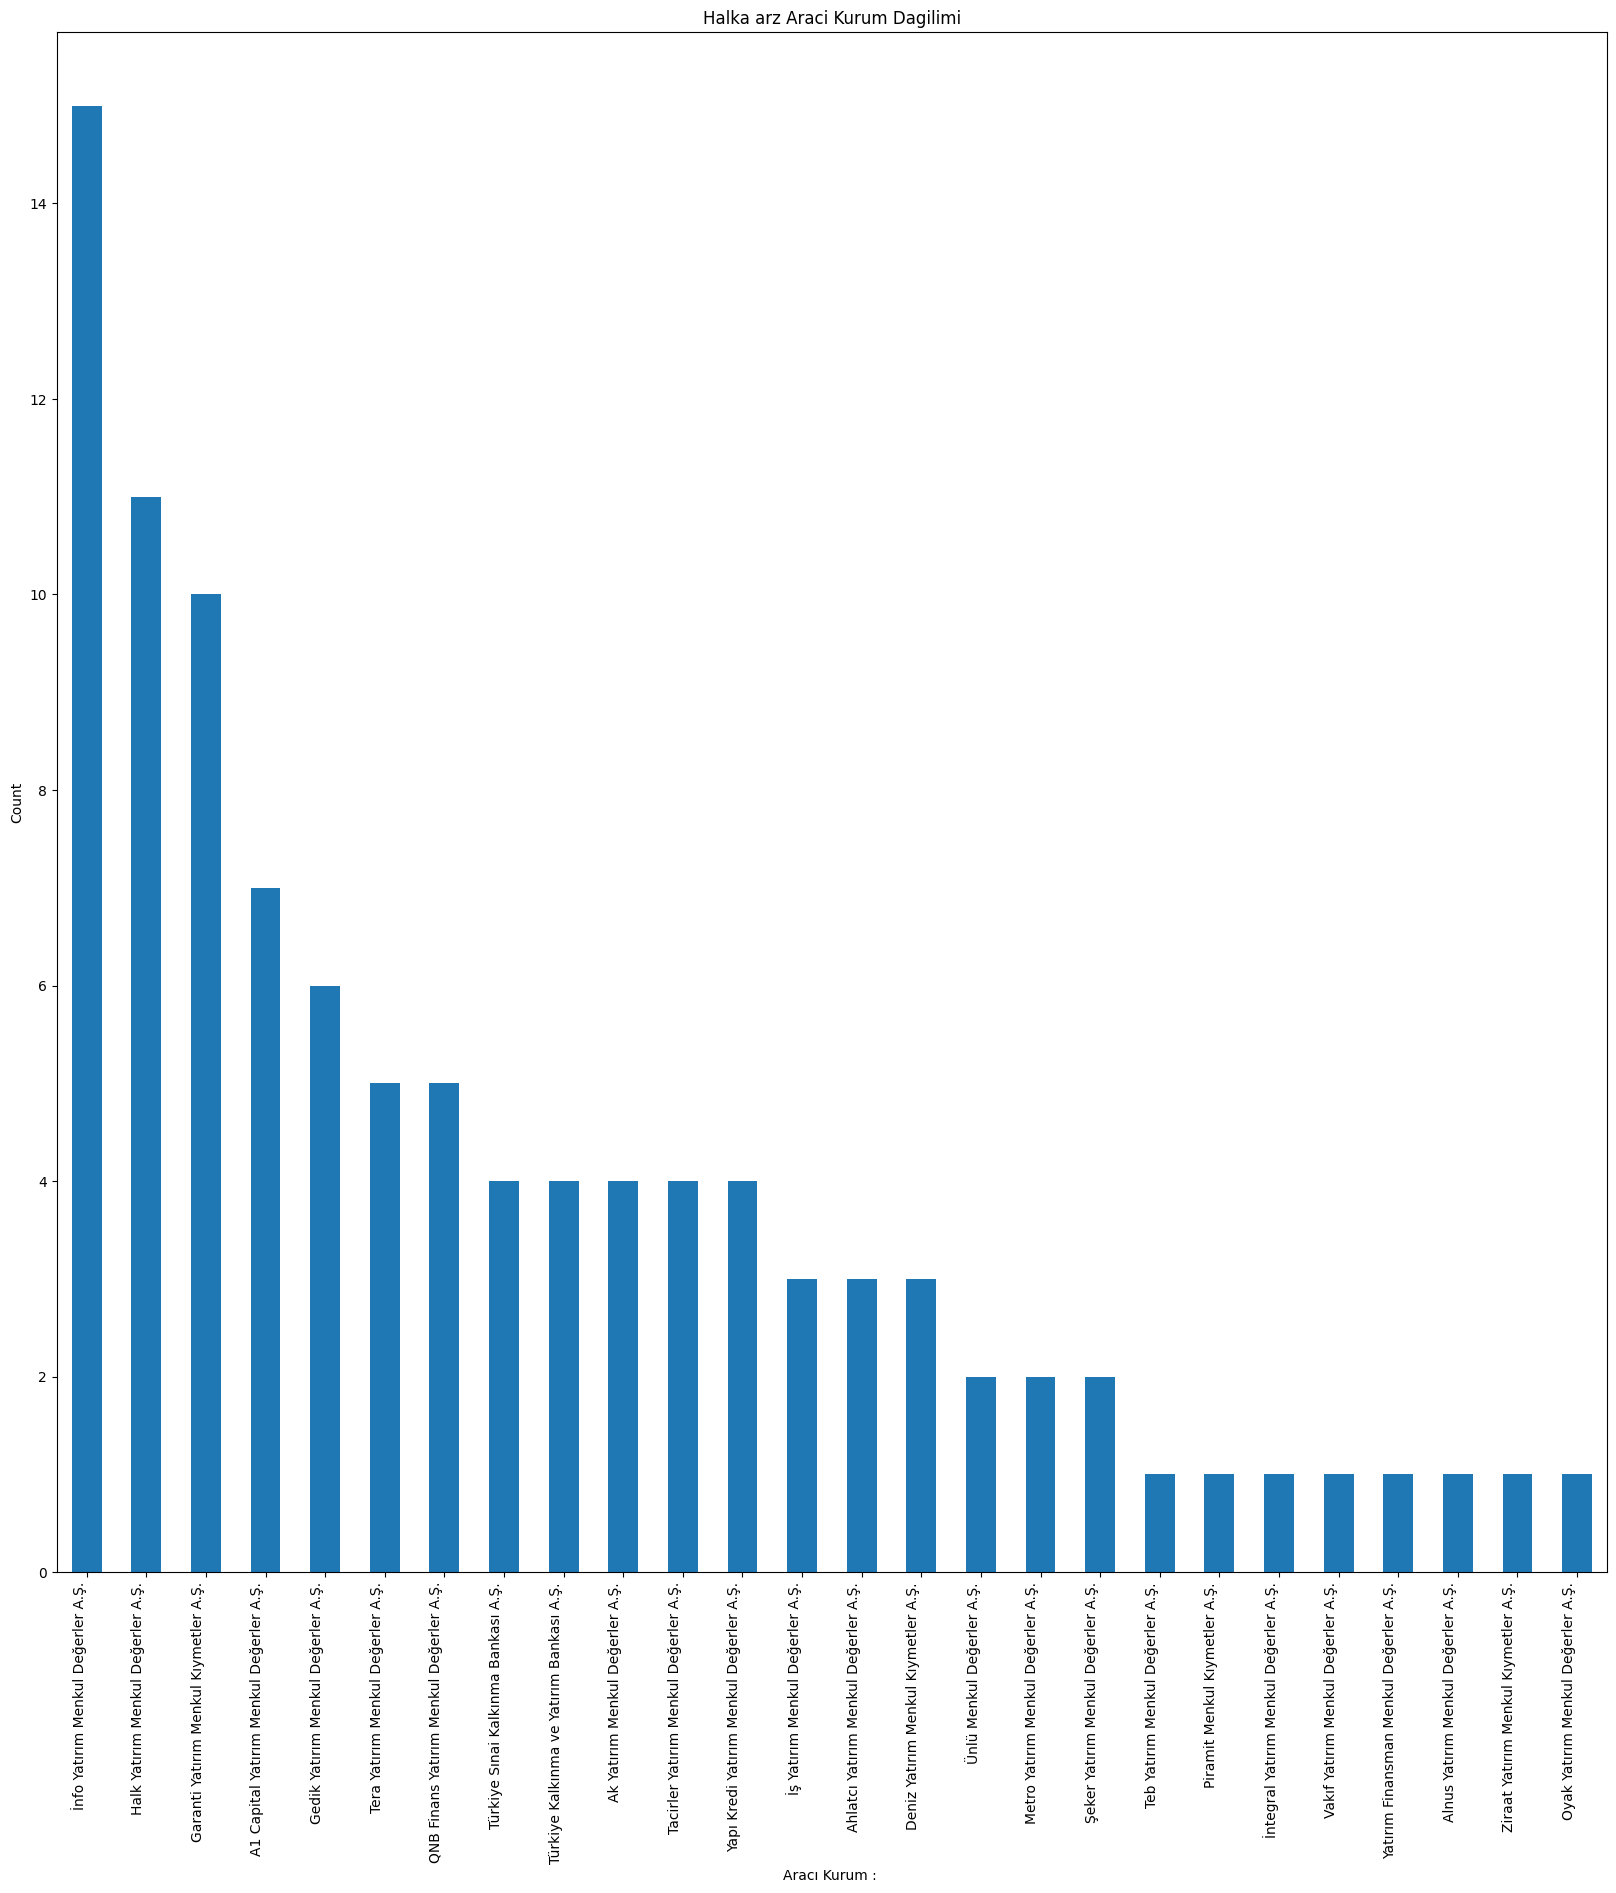

In [122]:
df["Aracı Kurum : "].value_counts().plot.bar(figsize=(20,20), title='Halka arz Araci Kurum Dagilimi', ylabel="Count");

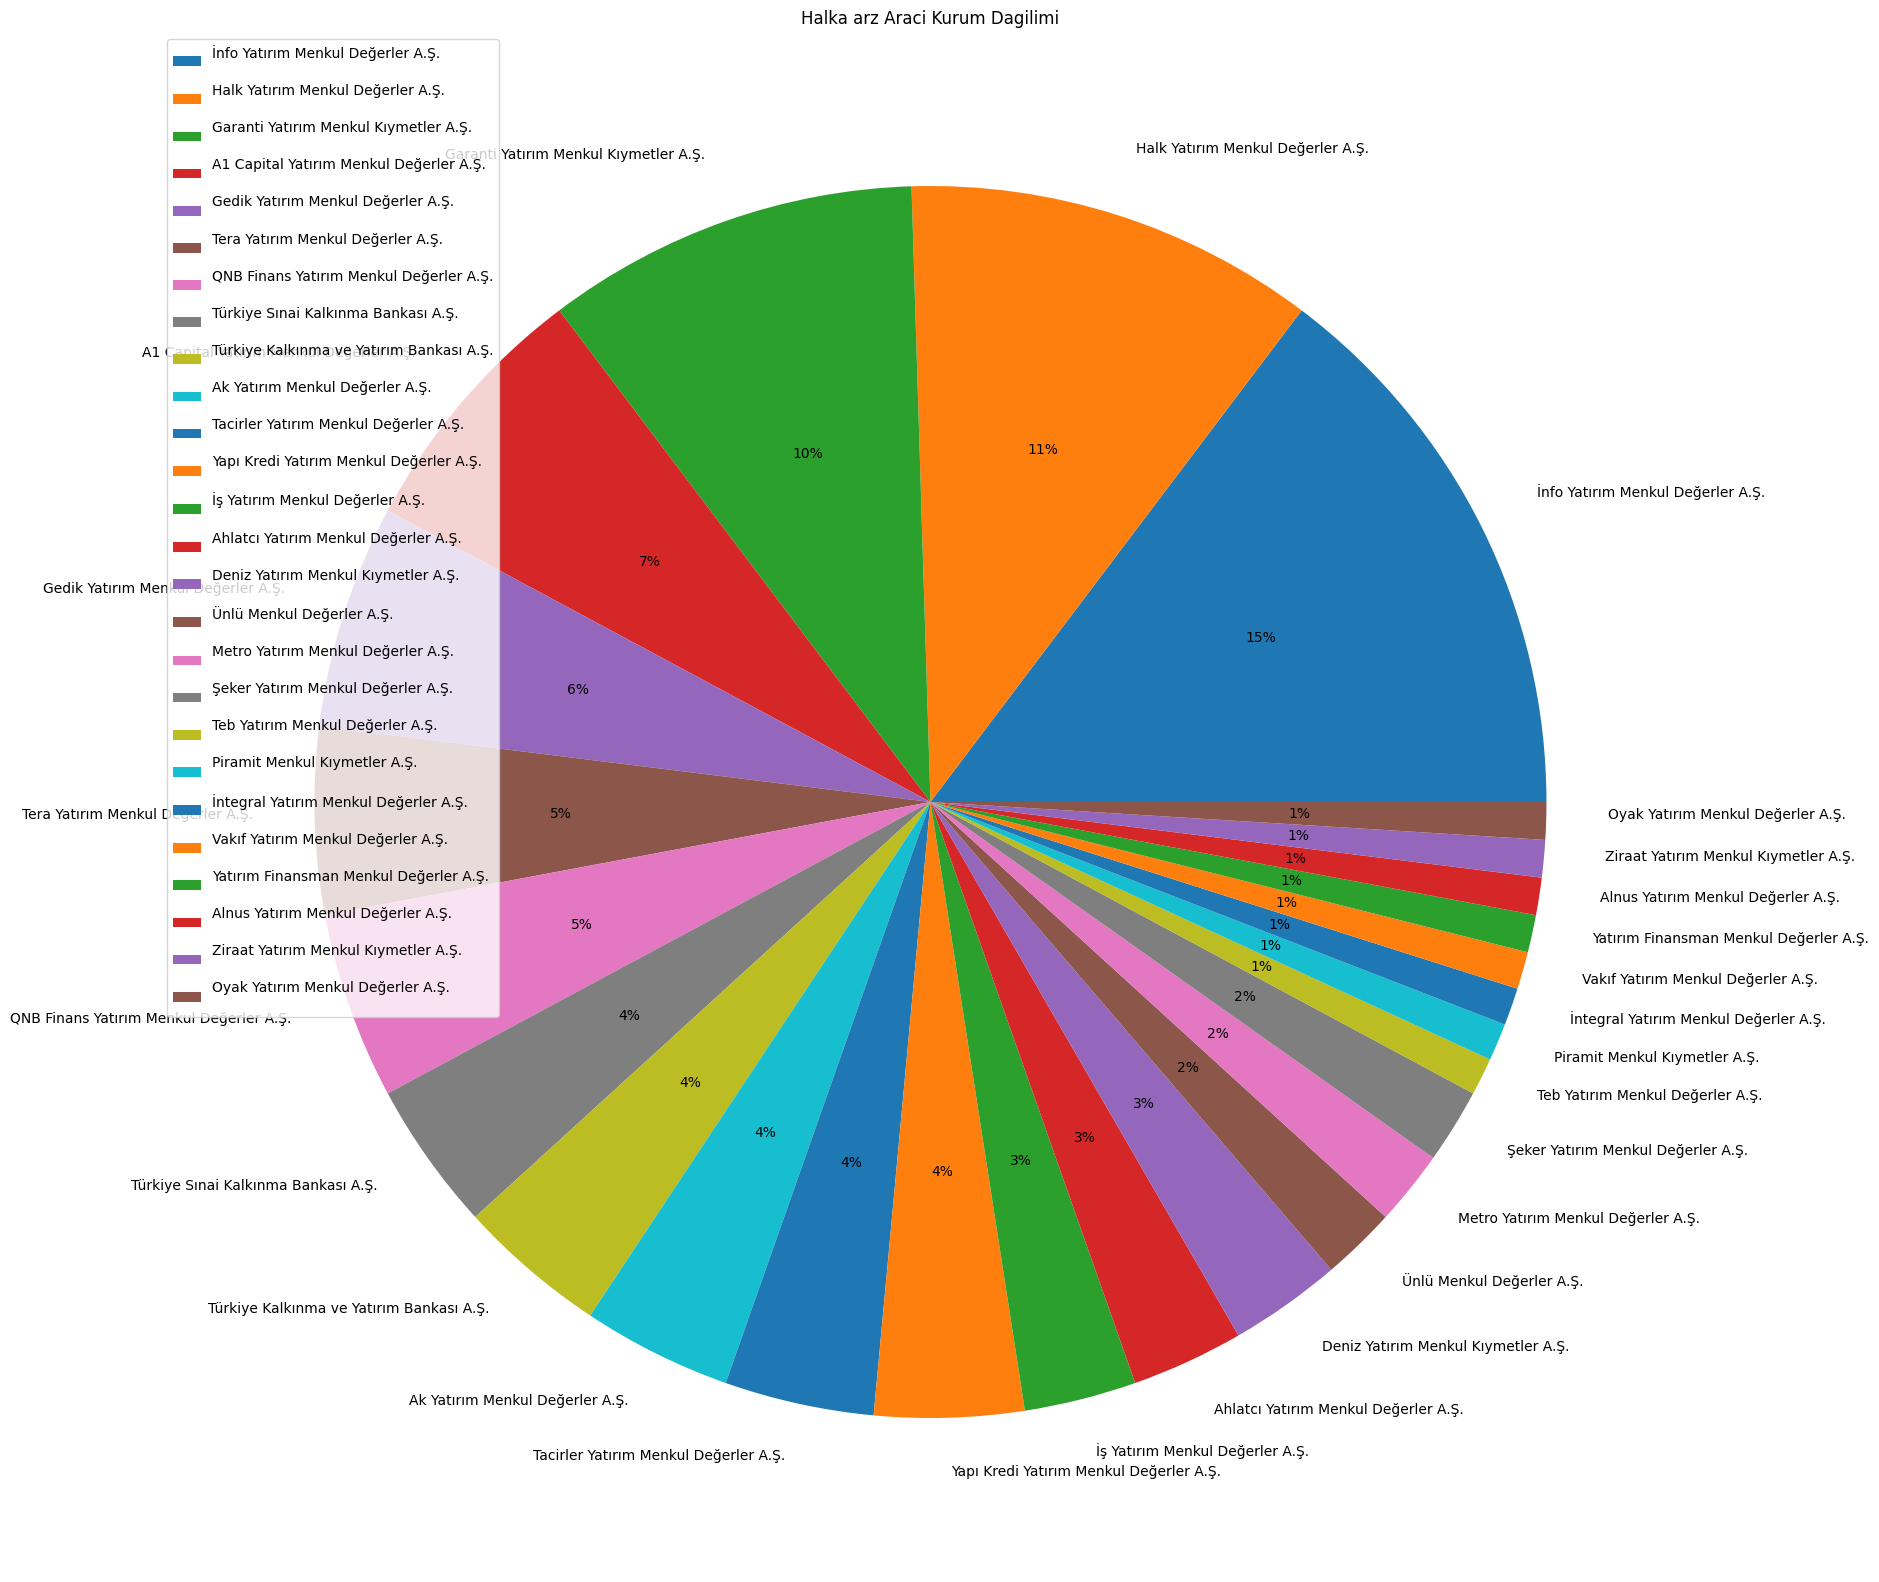

In [123]:
df["Aracı Kurum : "].value_counts().plot.pie(autopct='%1.0f%%',figsize=(20,20),ylabel="", legend=True, title="Halka arz Araci Kurum Dagilimi").legend(loc="best");

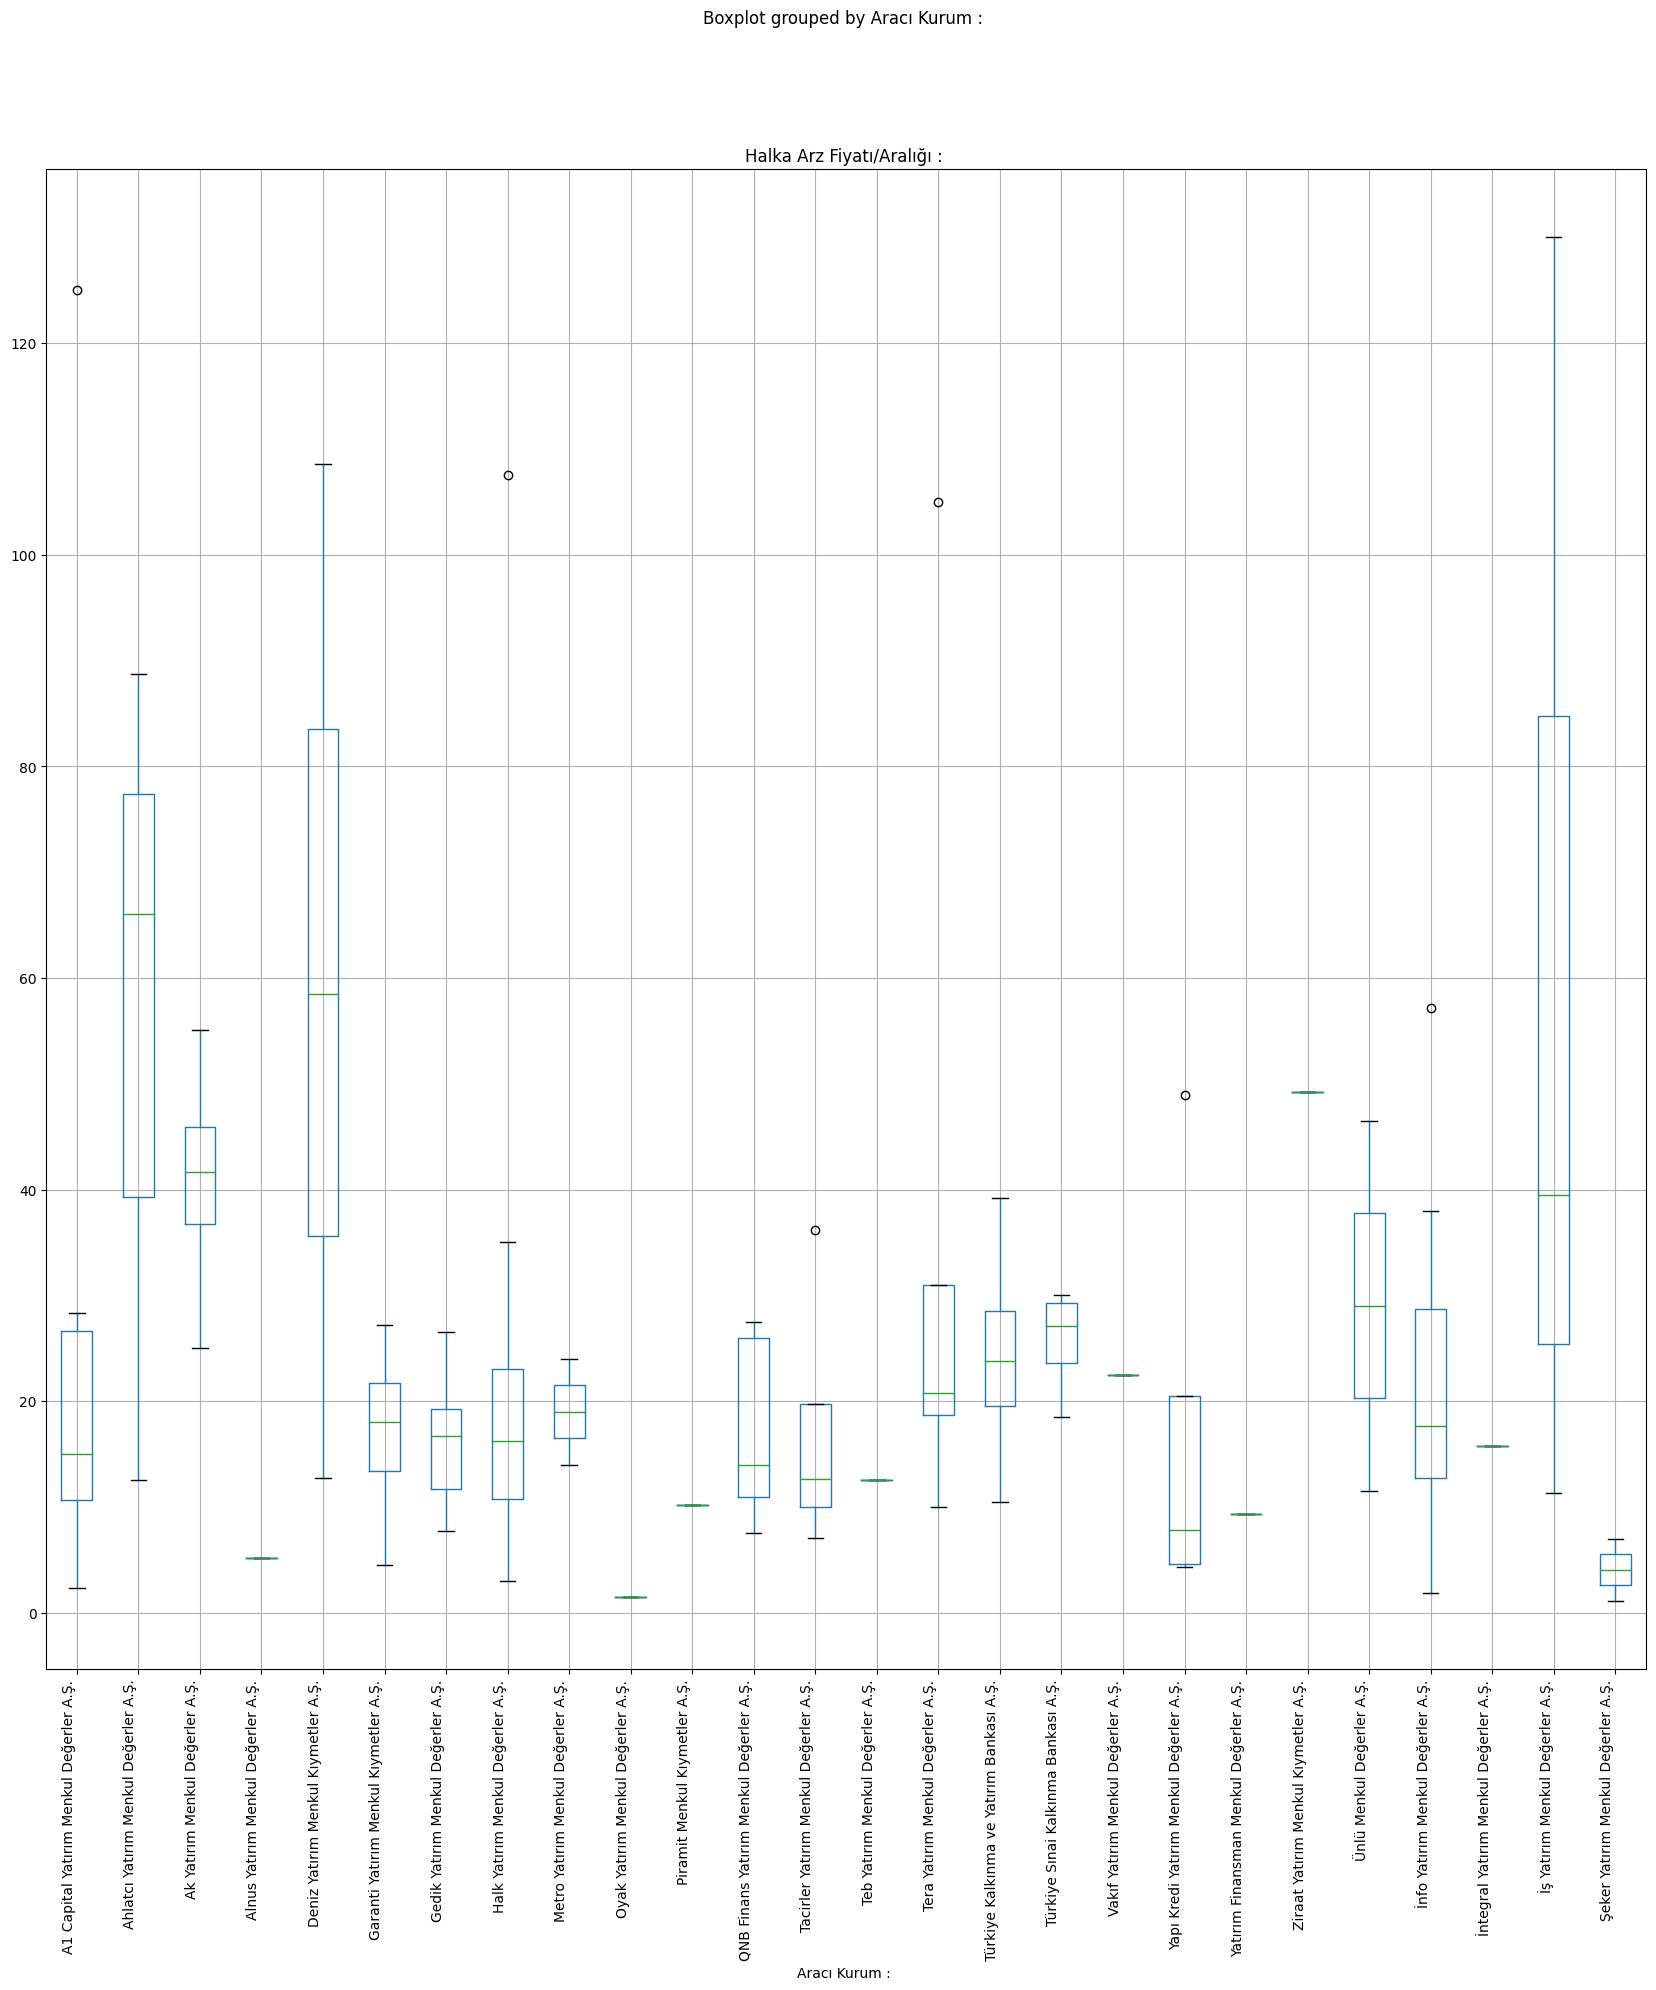

In [124]:
df.boxplot(figsize=(20,20), column='Halka Arz Fiyatı/Aralığı : ', by='Aracı Kurum : ', rot=90);

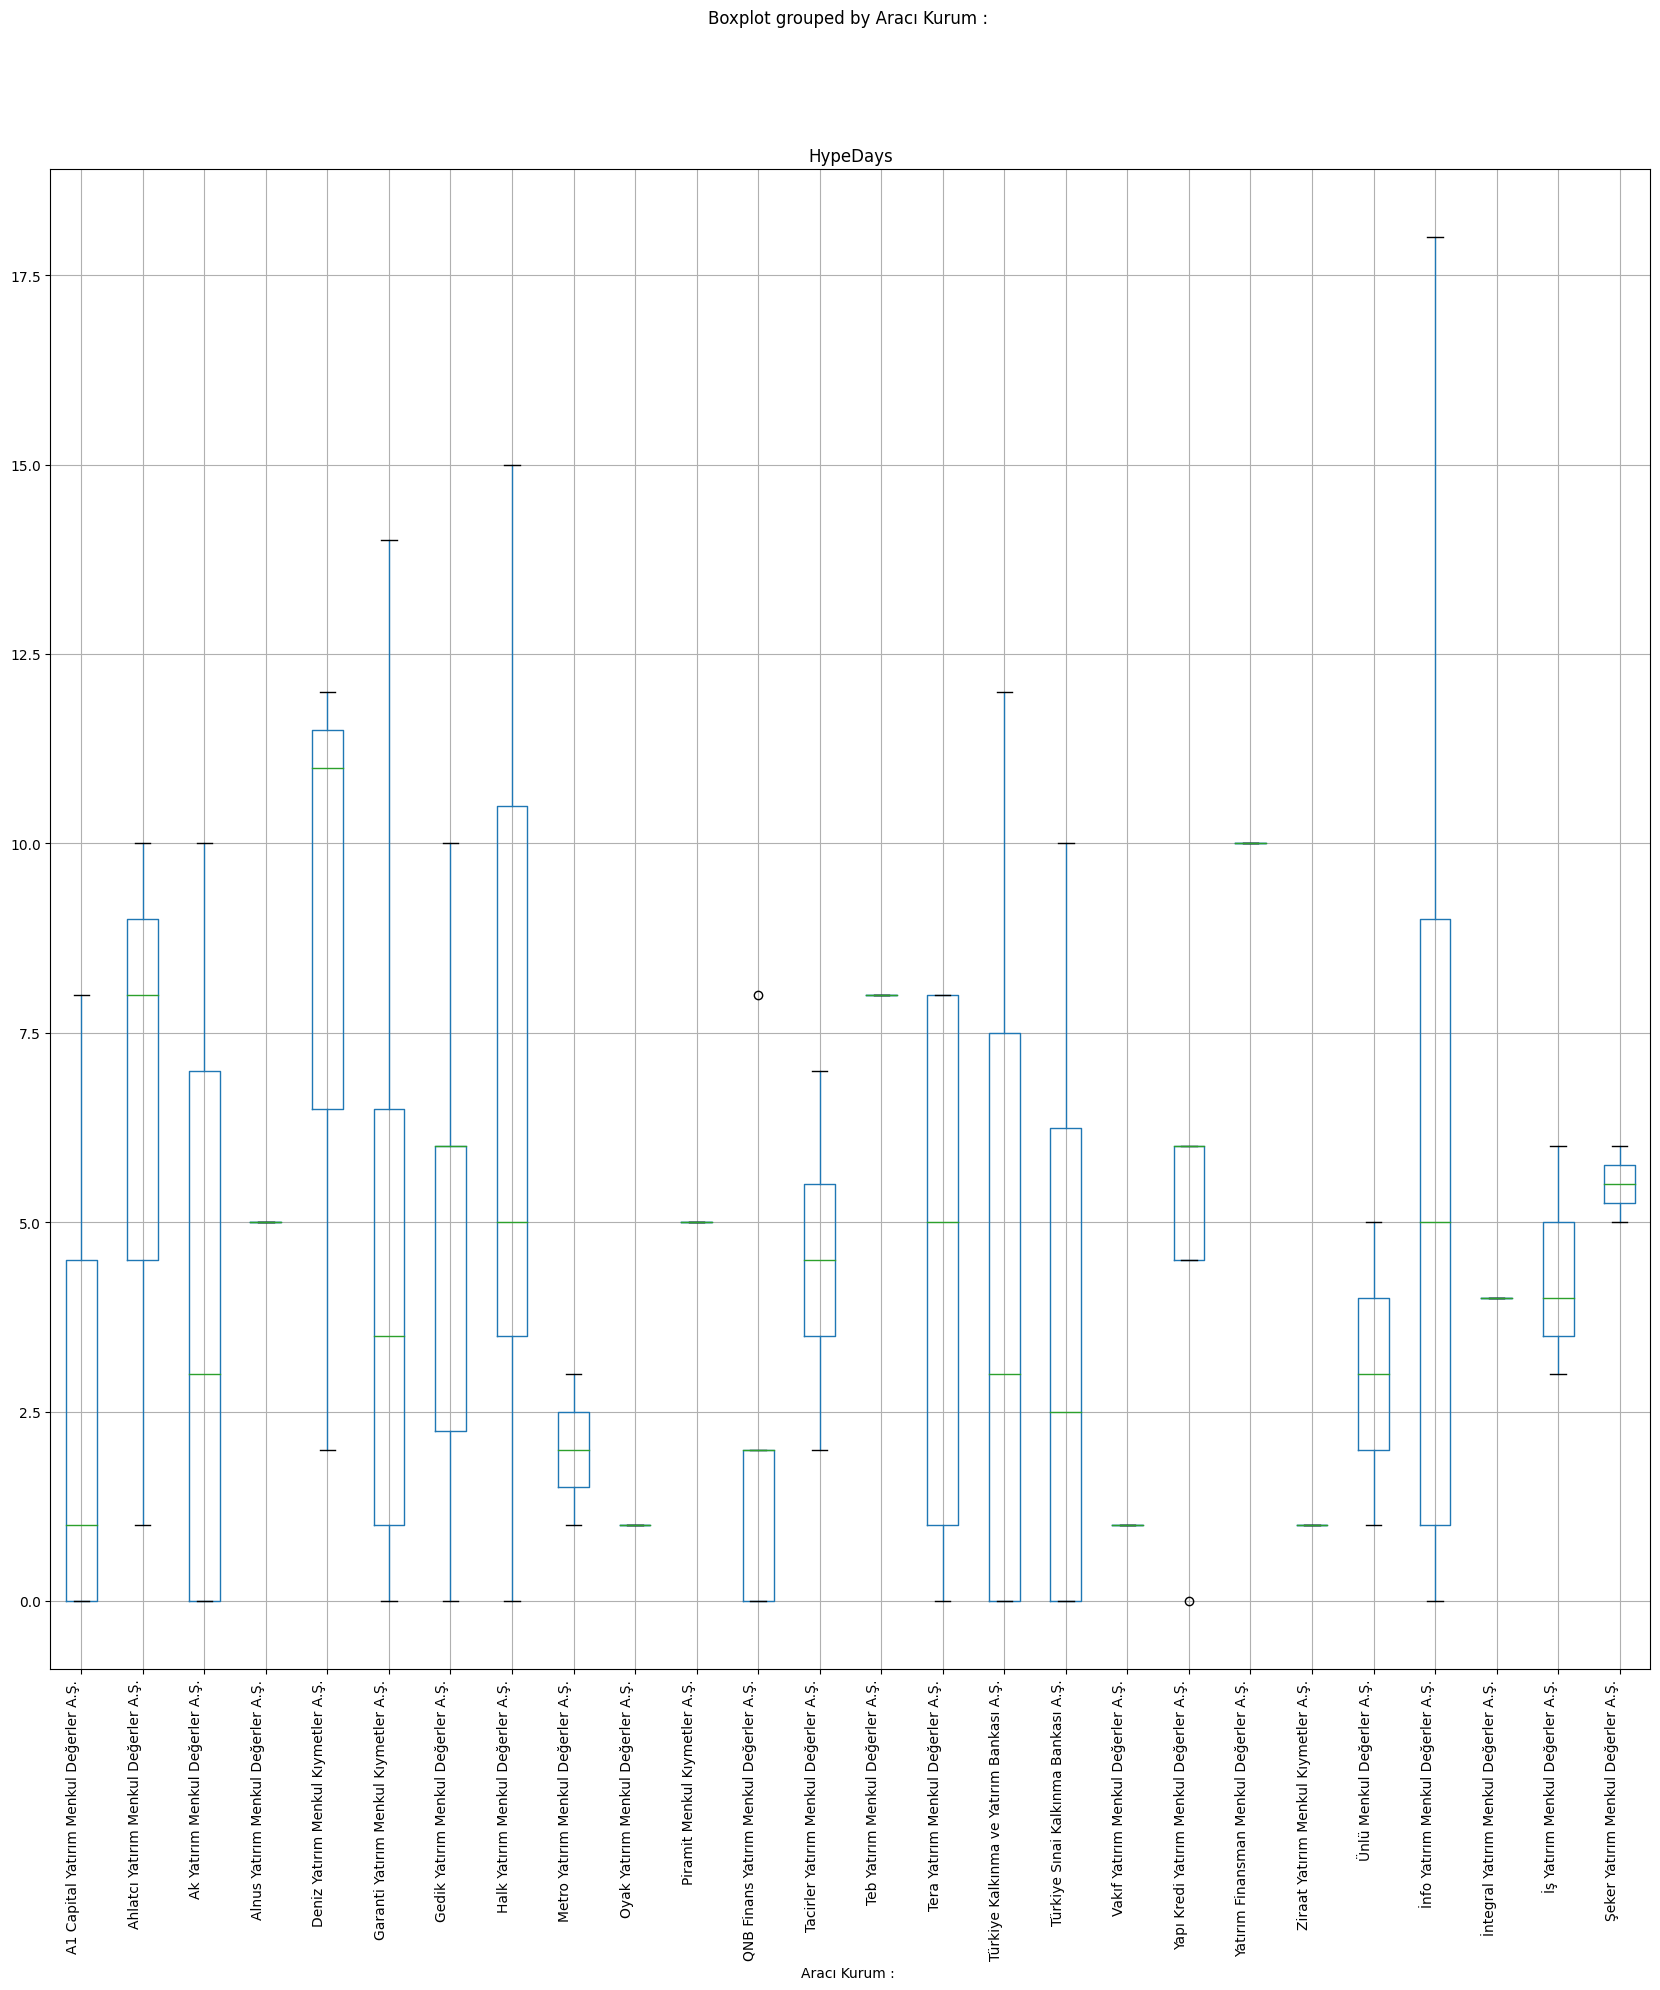

In [125]:
df.boxplot(figsize=(20,20), column='HypeDays', by='Aracı Kurum : ', rot=90);

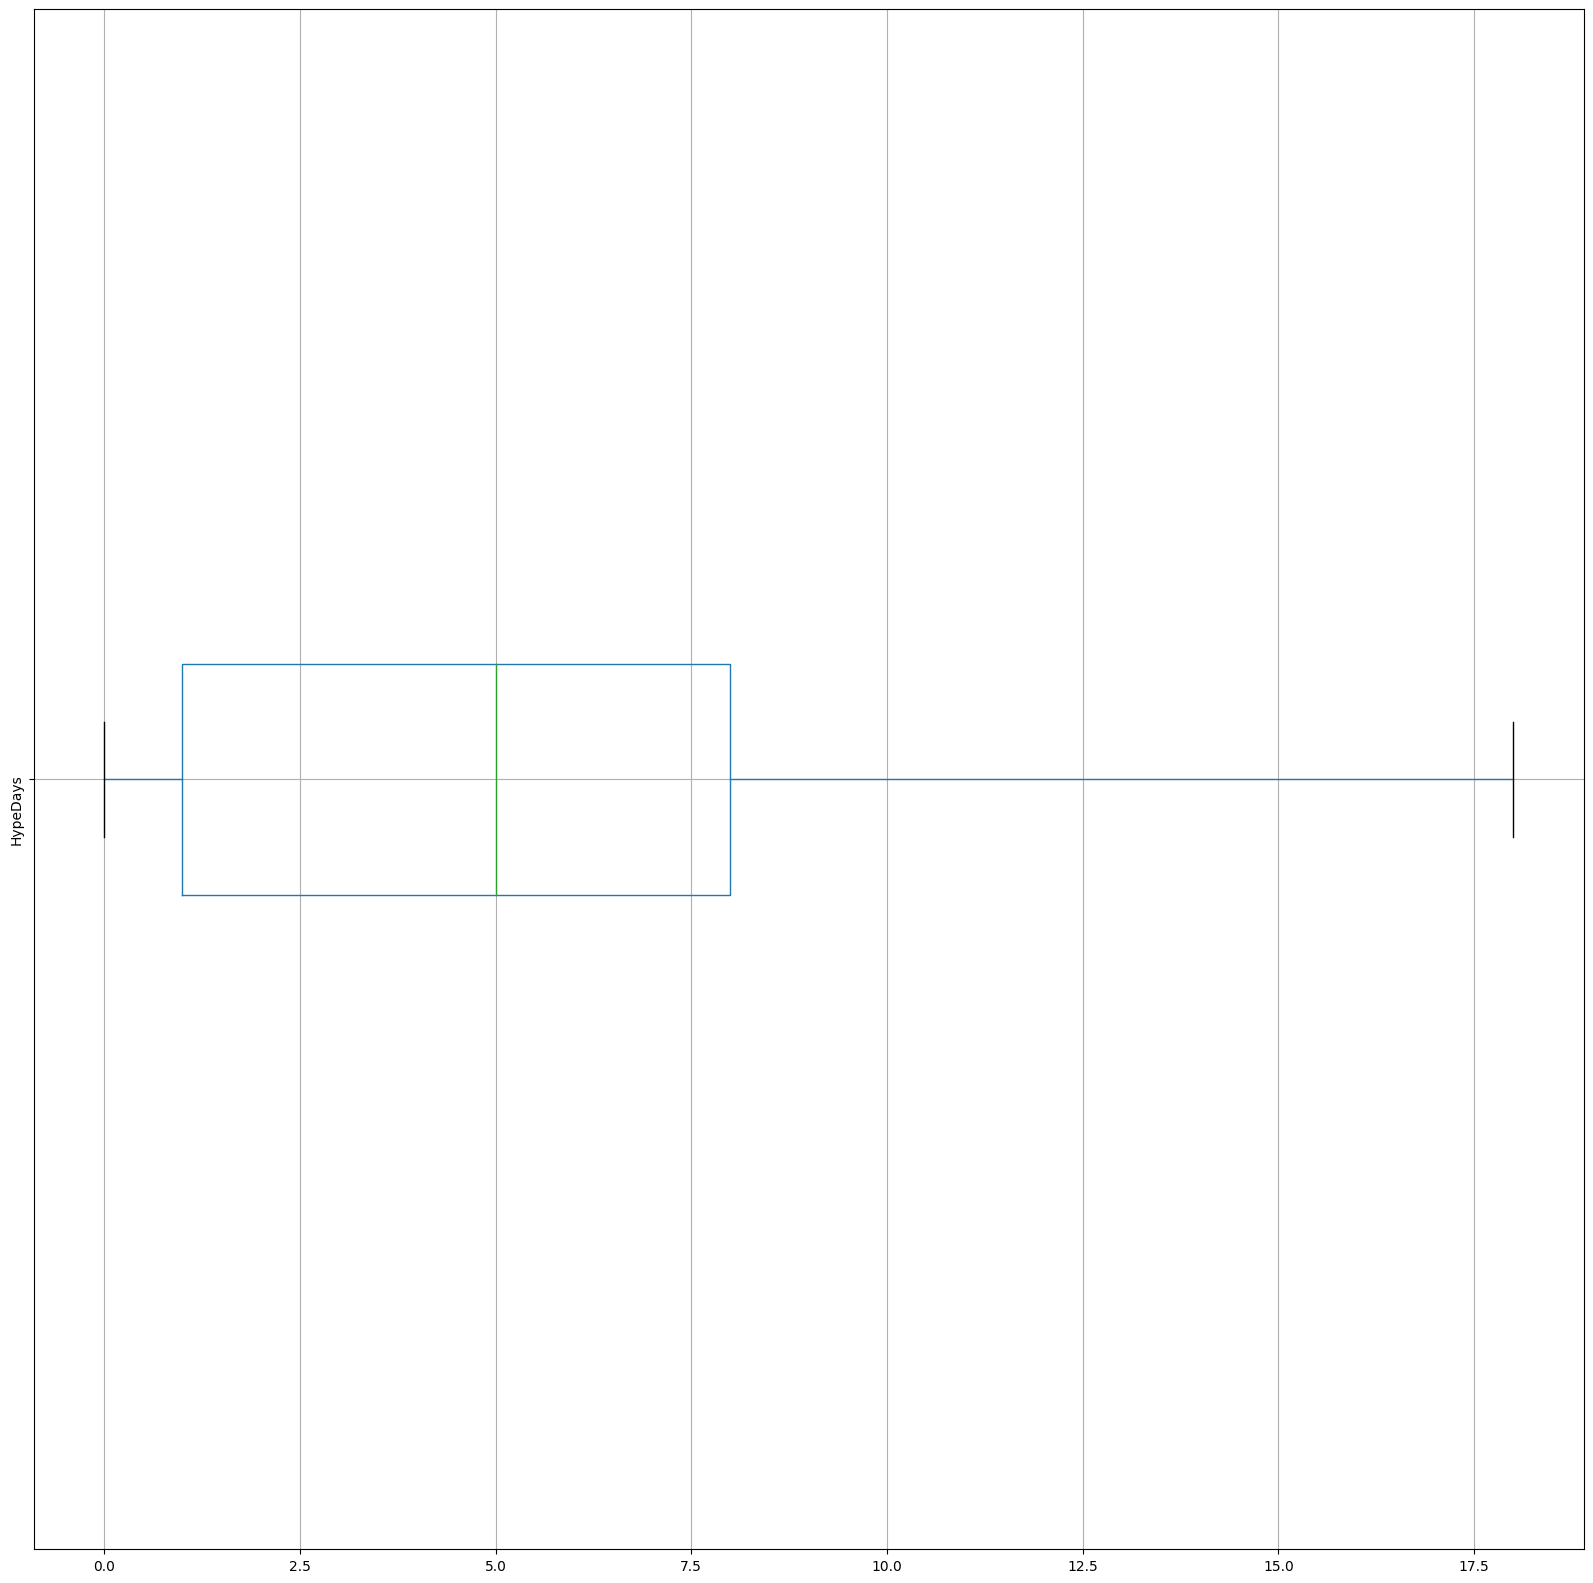

In [126]:
df.boxplot(figsize=(20,20), column='HypeDays', rot=90, vert=False, grid=True);

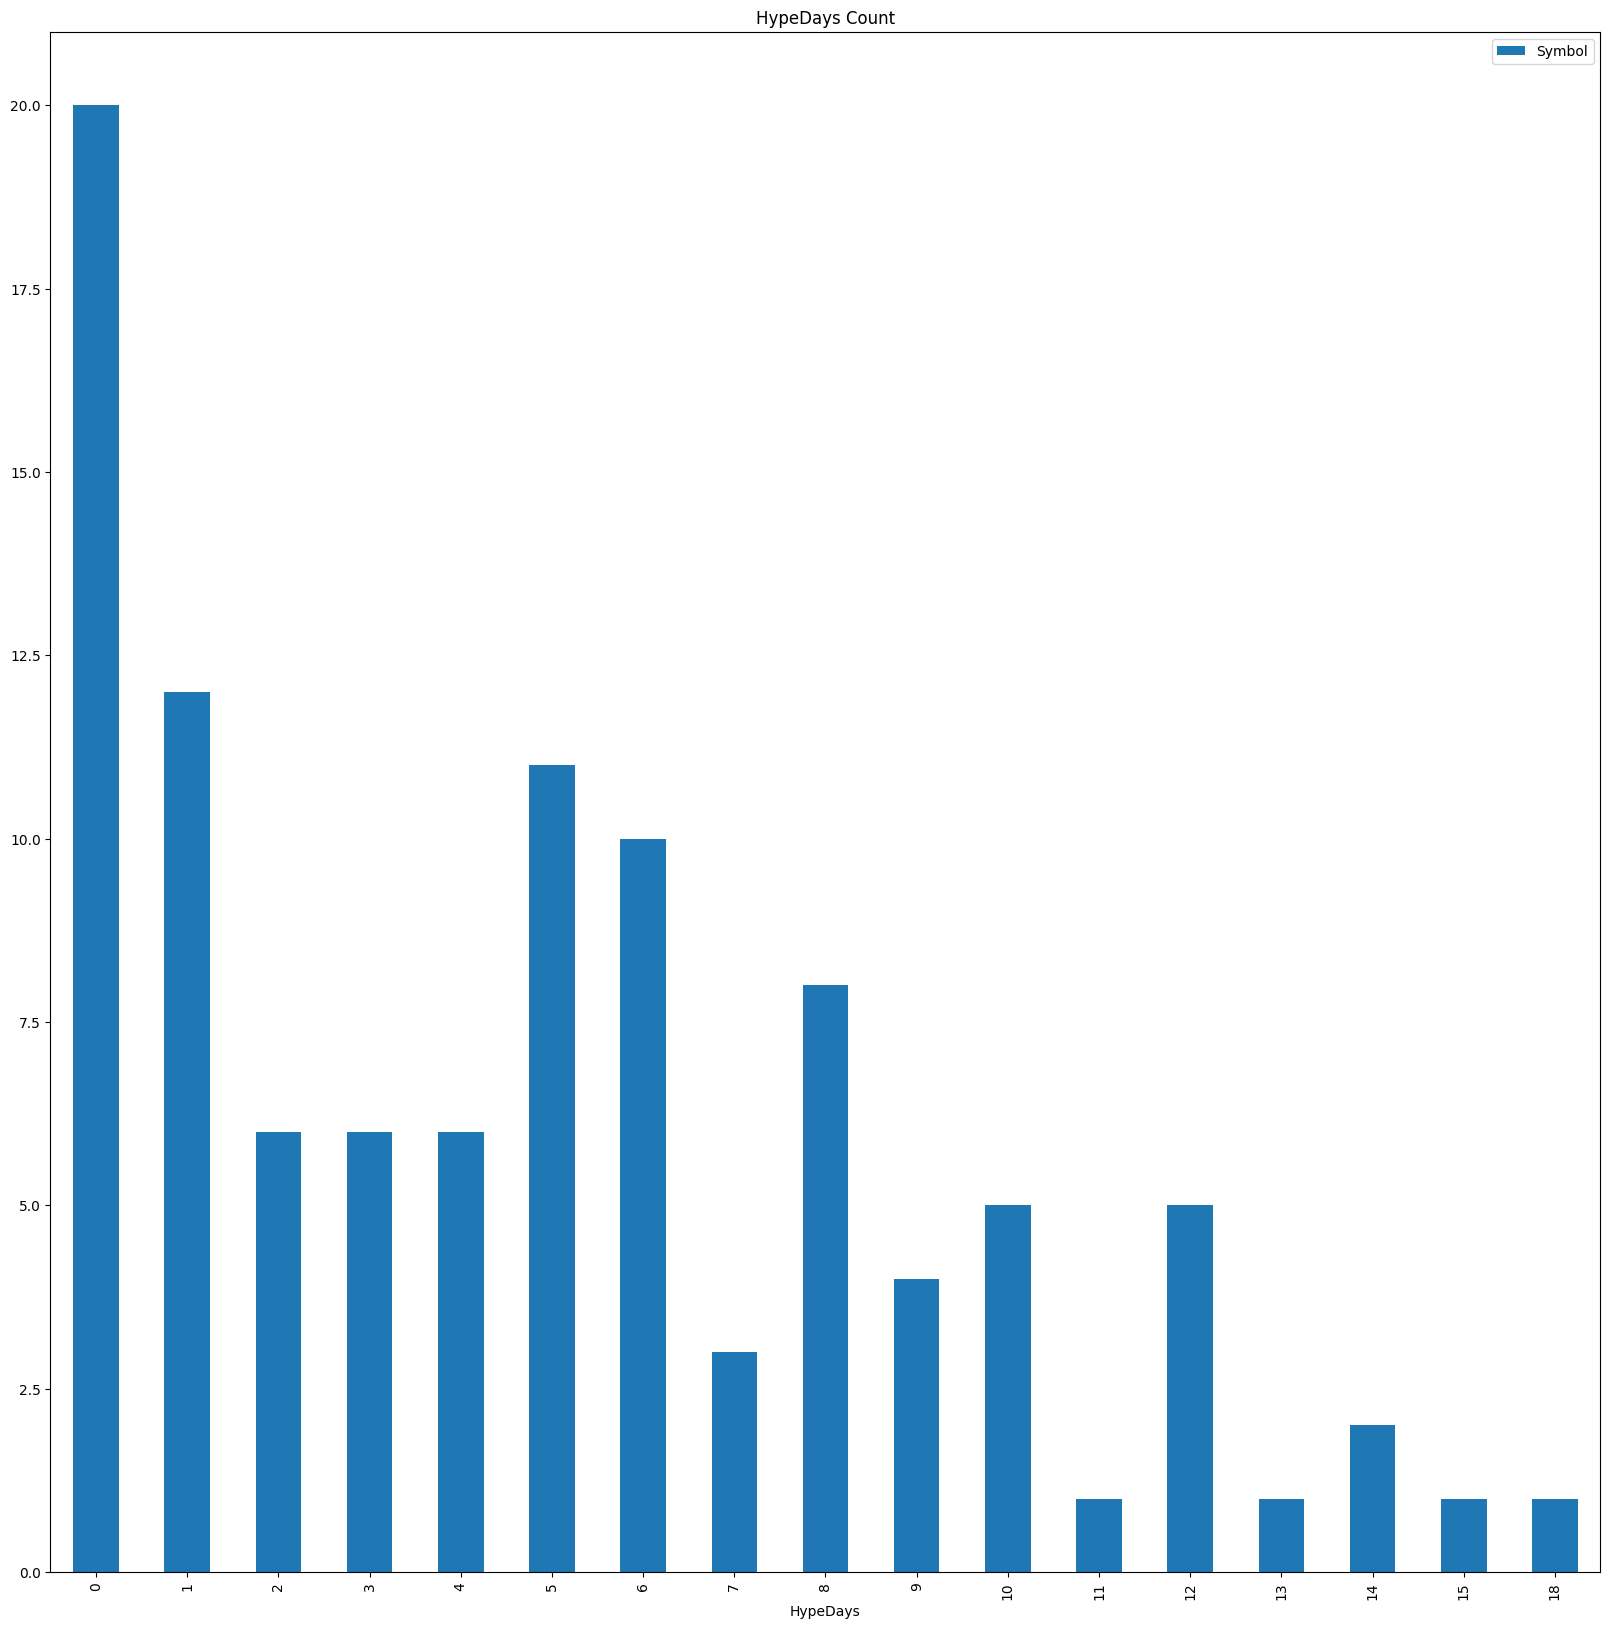

In [127]:
df.groupby(["HypeDays"]).count().plot(kind='bar', y='Symbol',figsize=(20,20), title='HypeDays Count');

In [128]:
bins = [0, 10., 20., 30., 40., 50., 60., 70., 80., 90., 100.]
labels = [0, 15., 25., 35., 45., 55., 65., 75., 85., 95.]
df['New_Bireysel_Oran'] = pd.cut(df['Bireysel_Oran'], bins=bins, labels=labels)

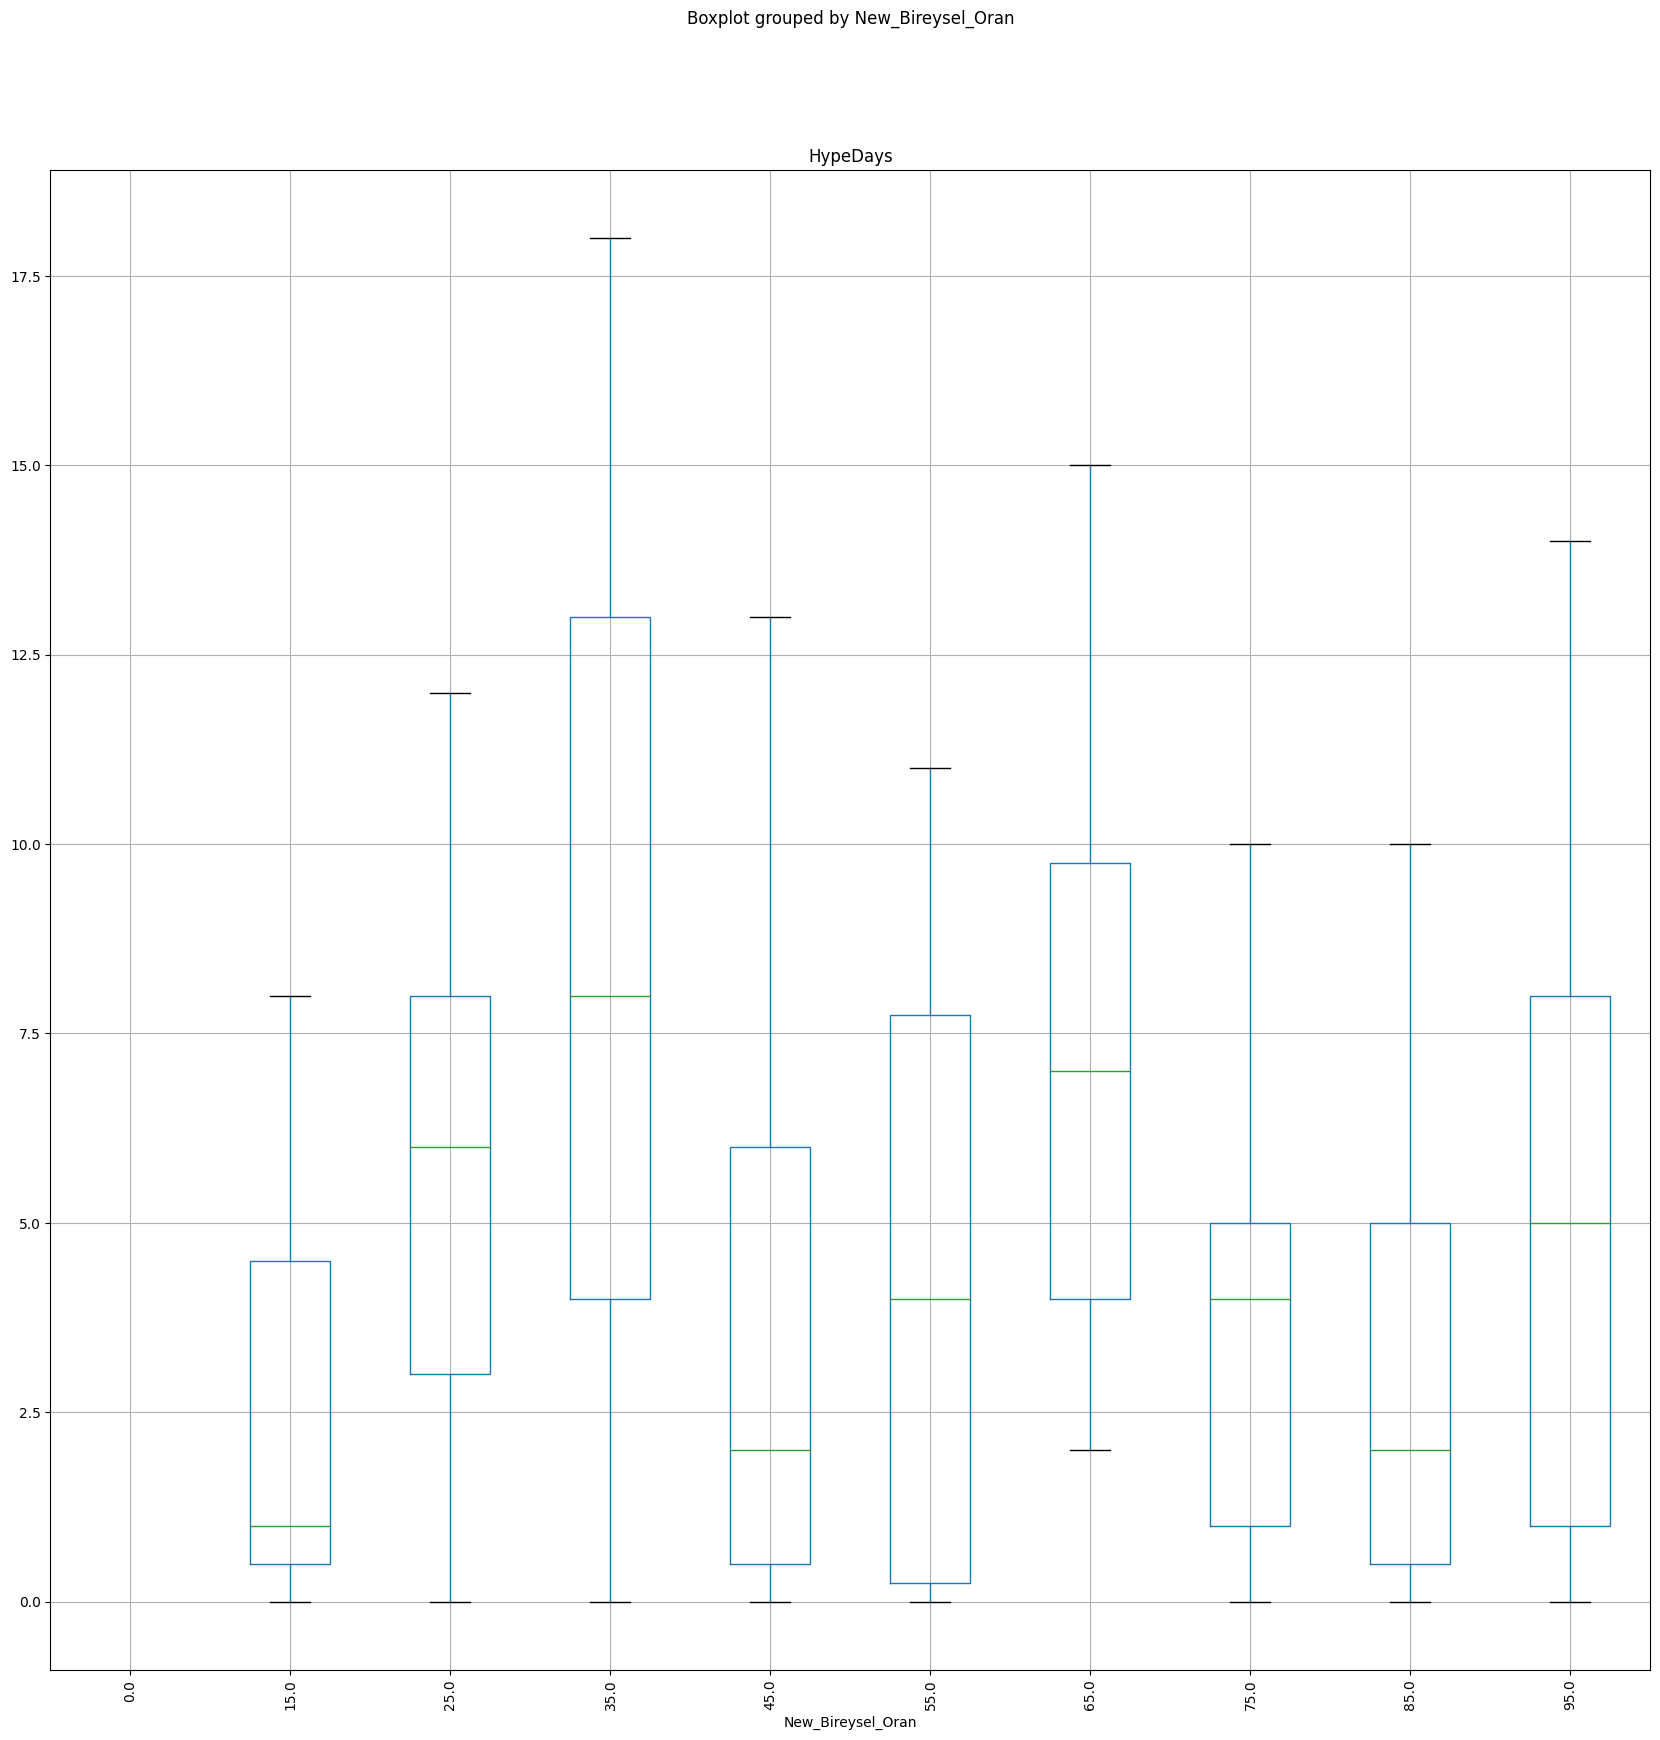

In [129]:
df.boxplot(figsize=(20,20), column='HypeDays', by='New_Bireysel_Oran', rot=90);

In [130]:
bins = [0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.]
labesl = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]
df['New_Piyasa Değeri (mn $)'] = pd.cut(df['Piyasa Değeri (mn $)'], bins=bins, labels=labels)

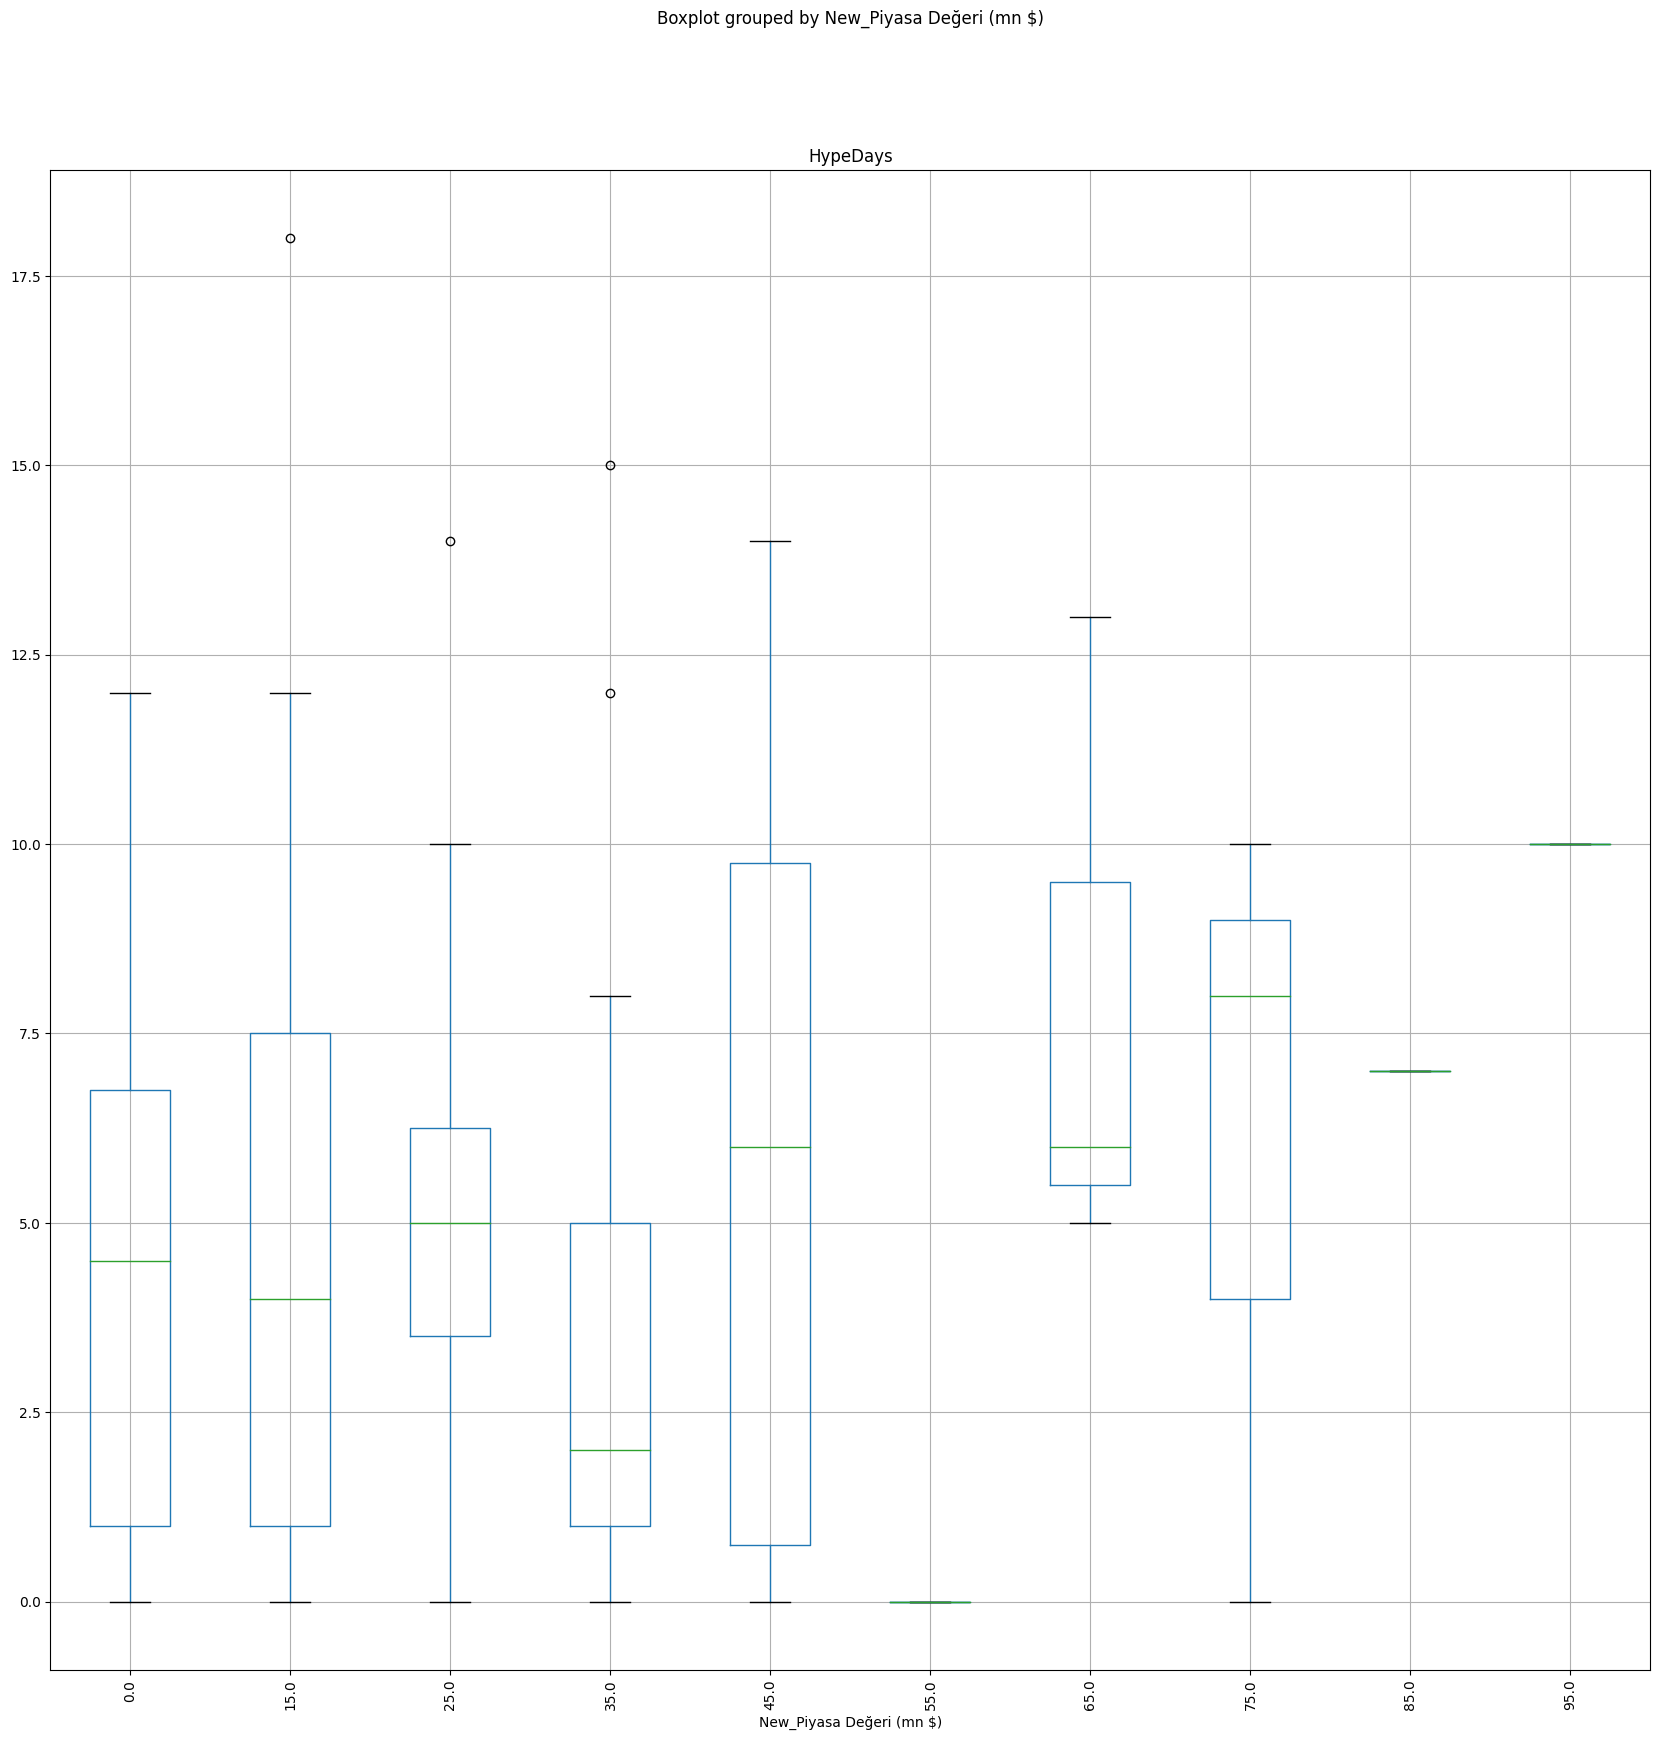

In [131]:
df.boxplot(figsize=(20,20), column='HypeDays', by='New_Piyasa Değeri (mn $)', rot=90);

In [132]:
bins = [0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.]
labesl = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]
df['New_Sermaye'] = pd.cut(df['Sermaye (mn TL)'], bins=bins, labels=labels)

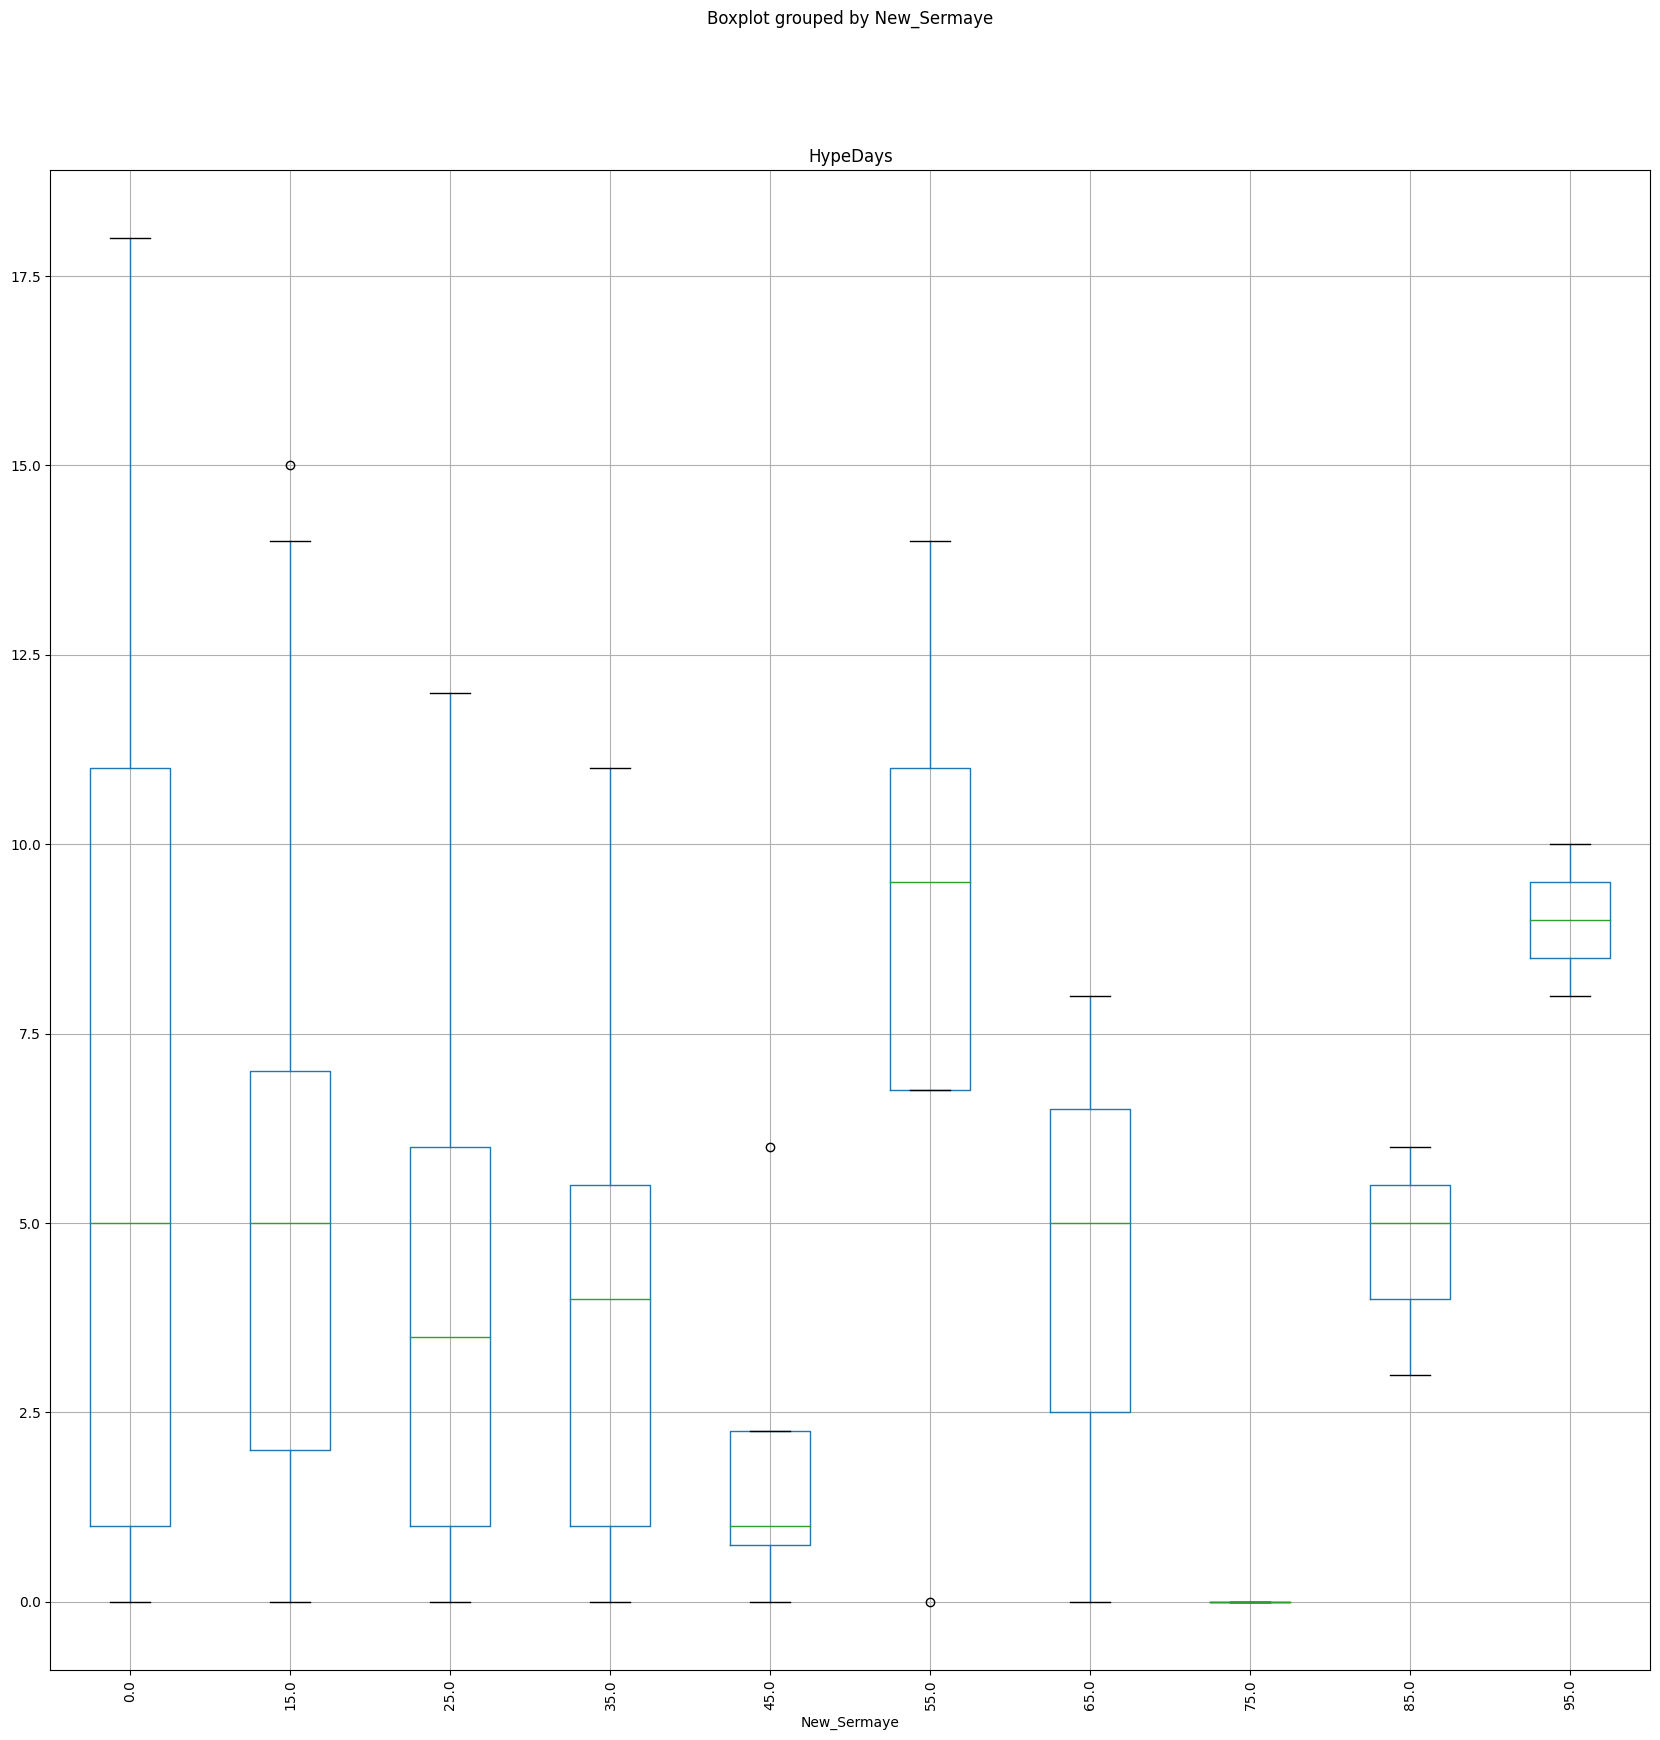

In [133]:
df.boxplot(figsize=(20,20), column='HypeDays', by='New_Sermaye', rot=90);

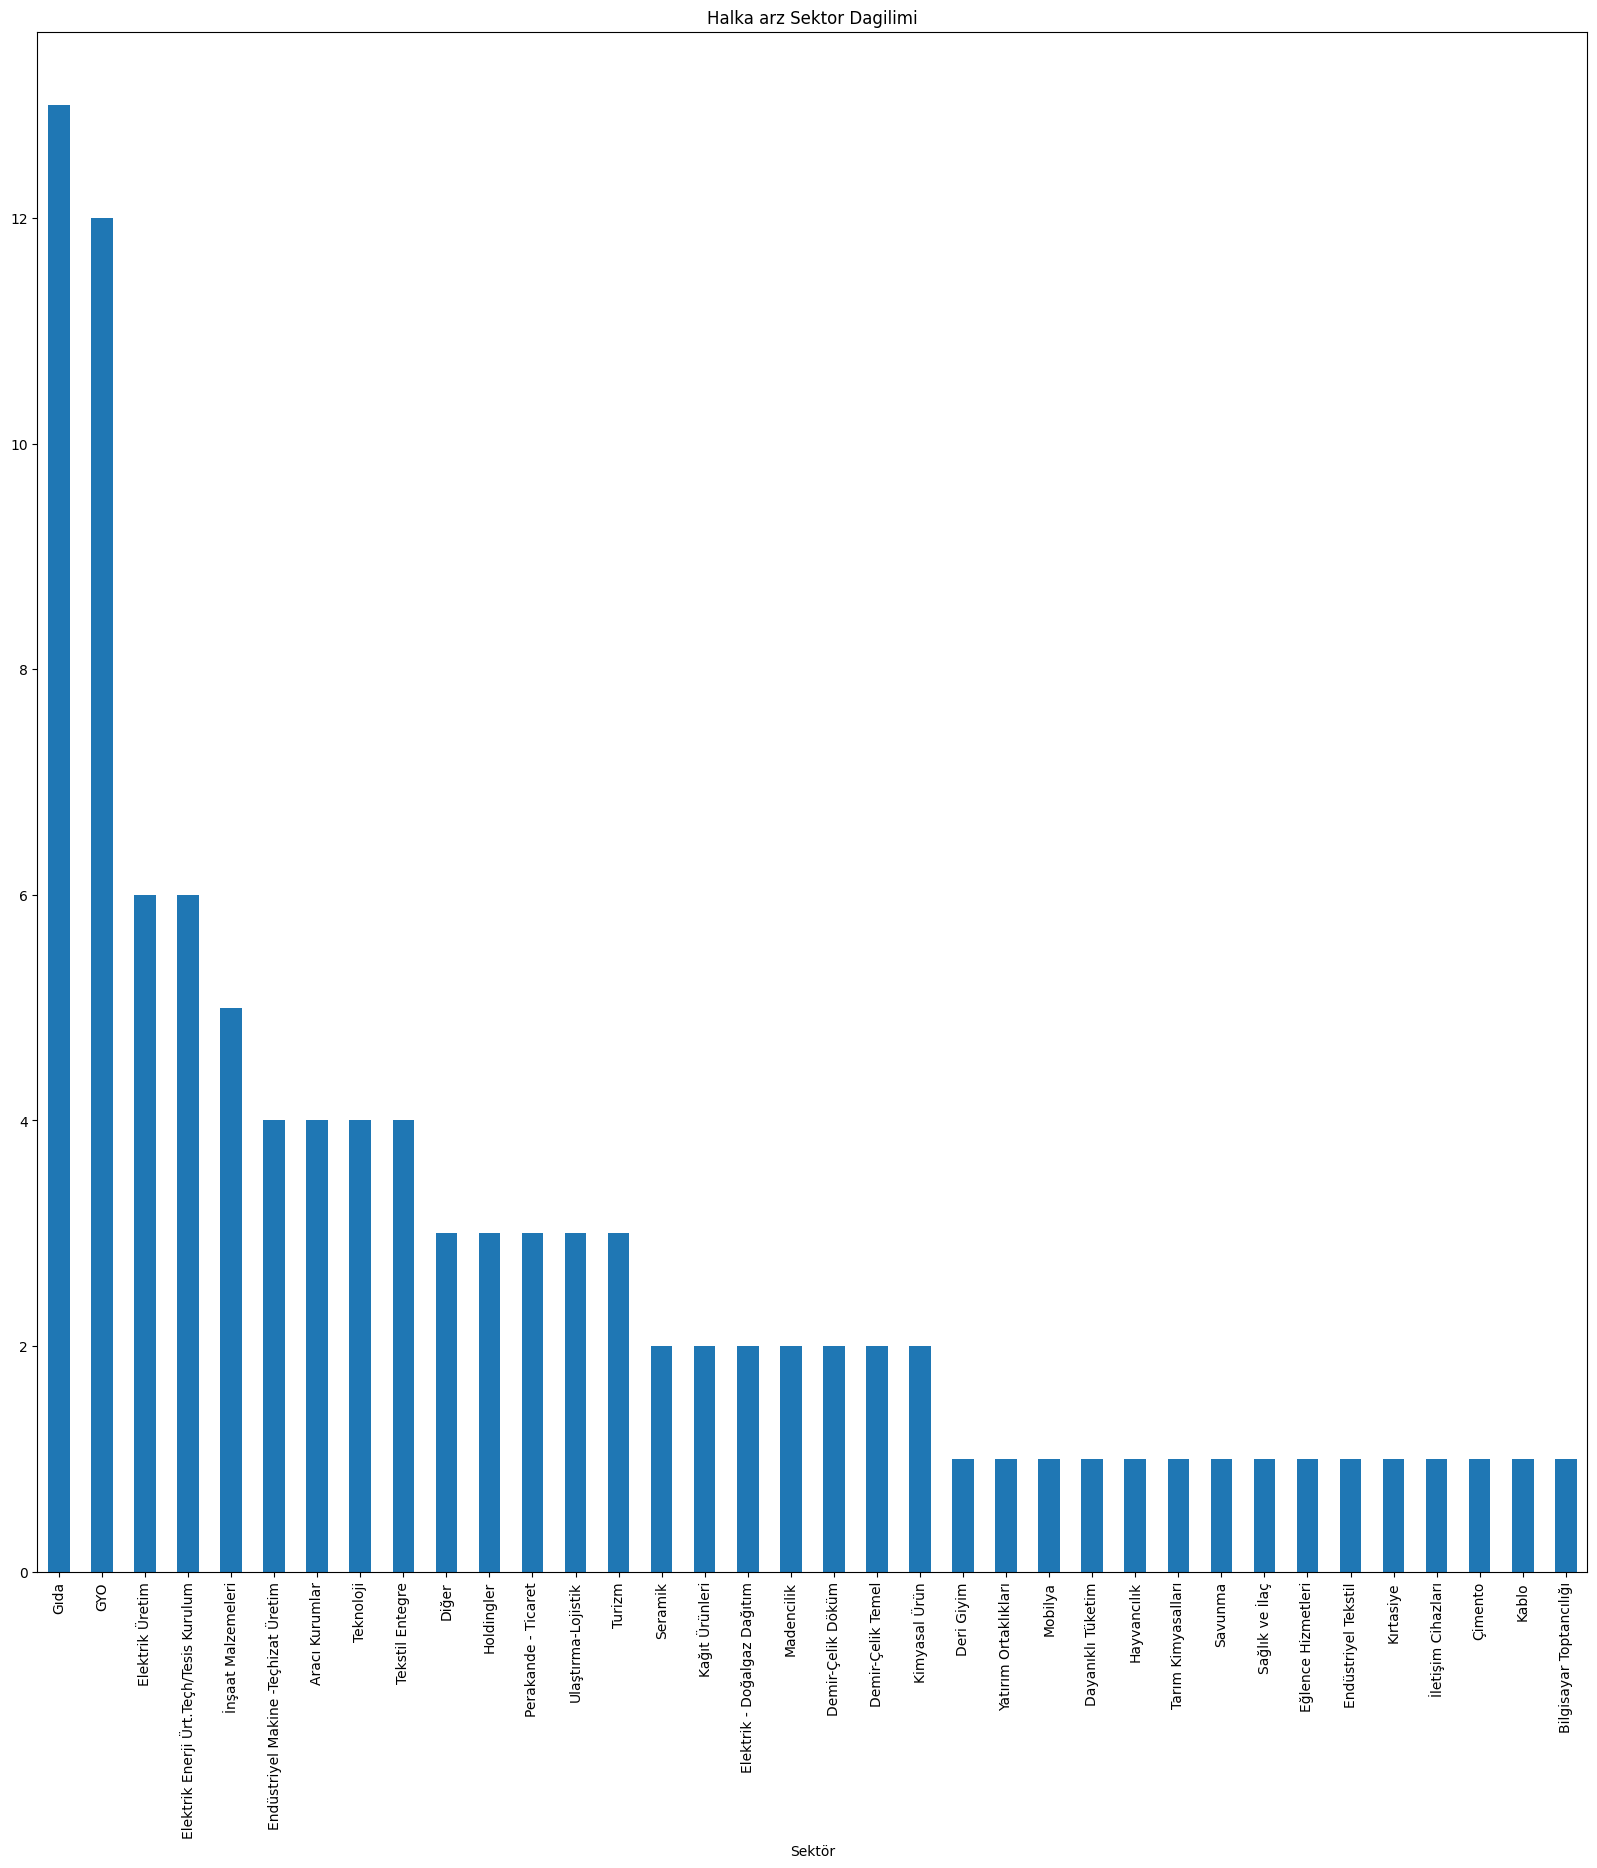

In [134]:
df["Sektör"].value_counts().plot.bar(figsize=(20,20), title='Halka arz Sektor Dagilimi');

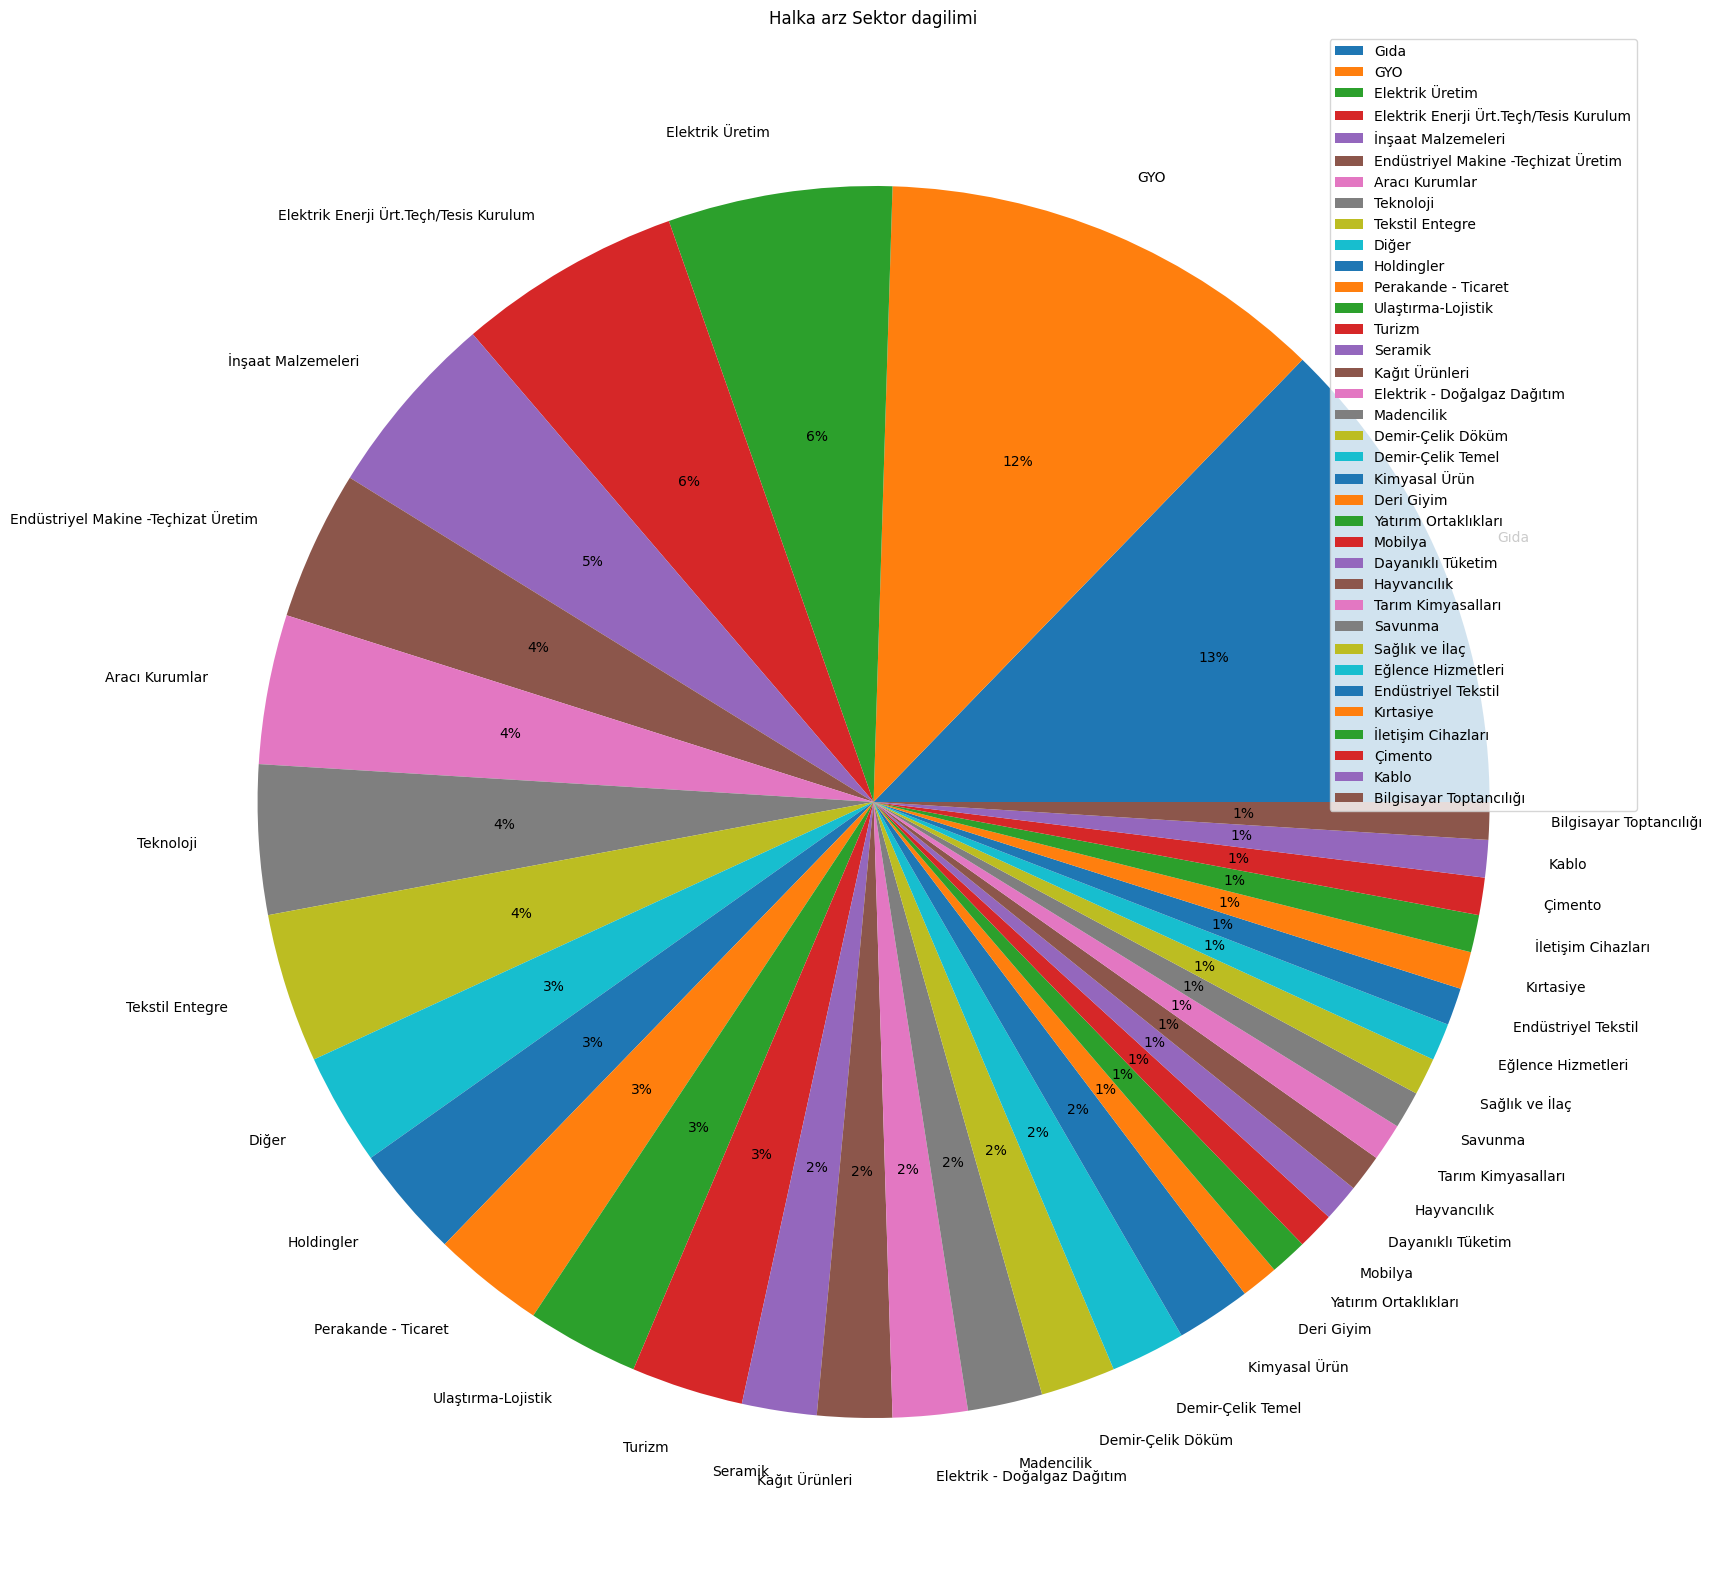

In [135]:
df["Sektör"].value_counts().plot.pie(autopct='%1.0f%%',figsize=(20,20), title='Halka arz Sektor dagilimi', ylabel="").legend(loc="best");

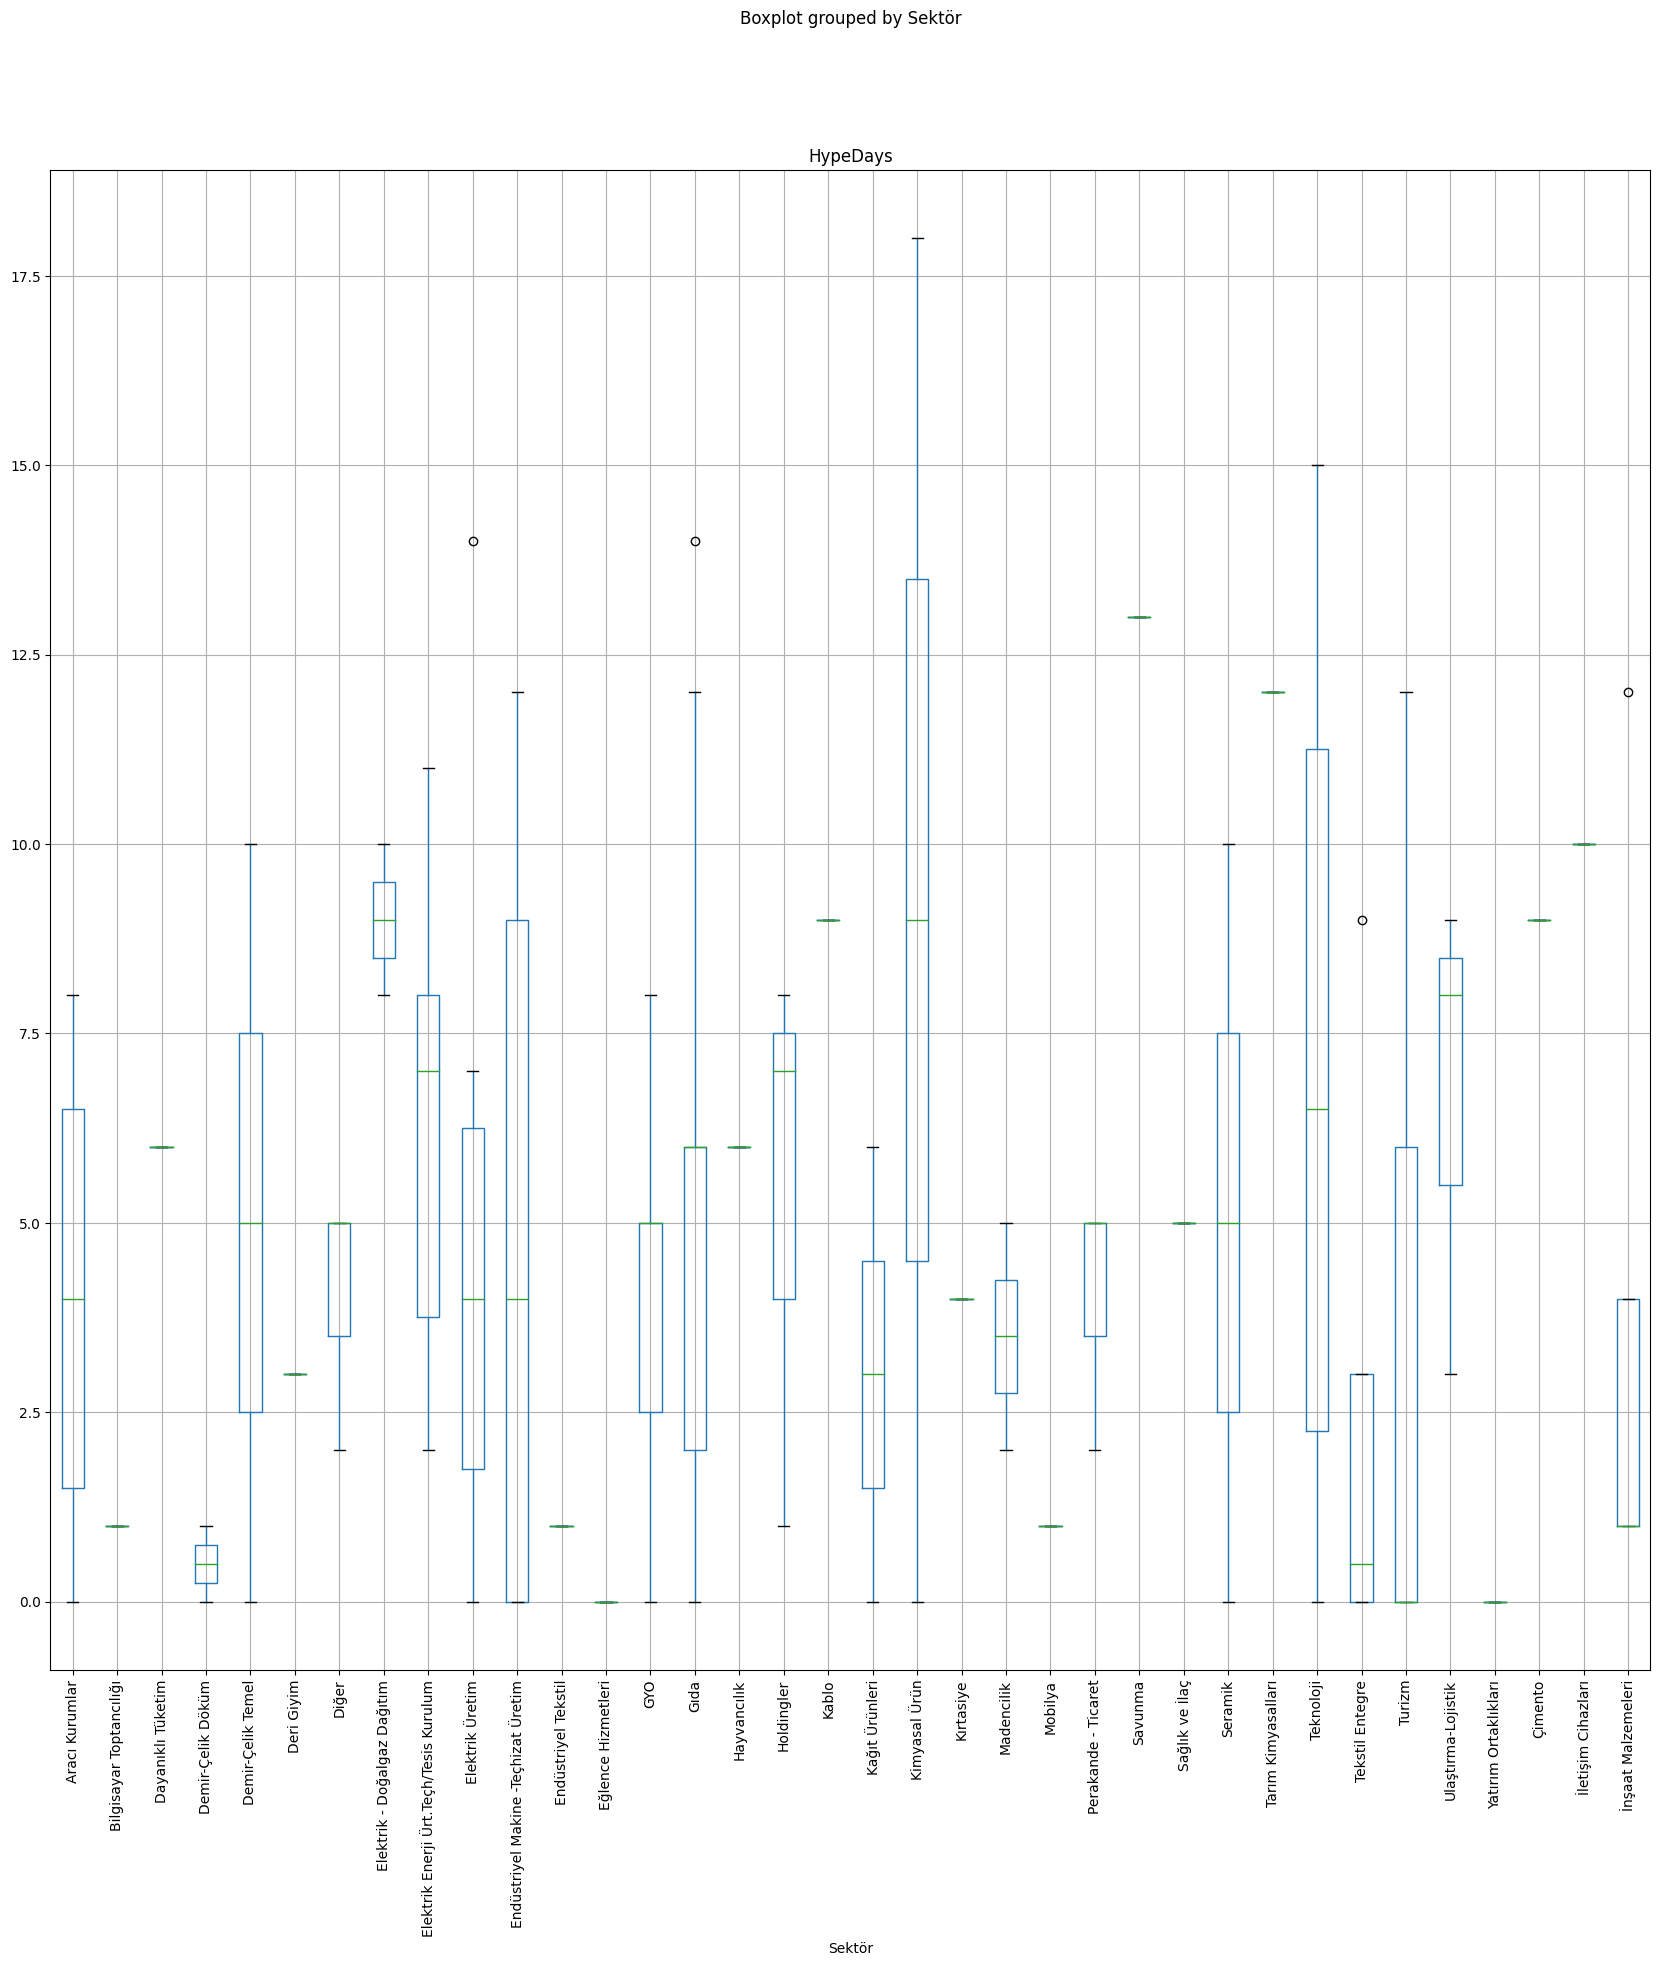

In [136]:
df.boxplot(figsize=(20,20), column='HypeDays', by='Sektör', rot=90);

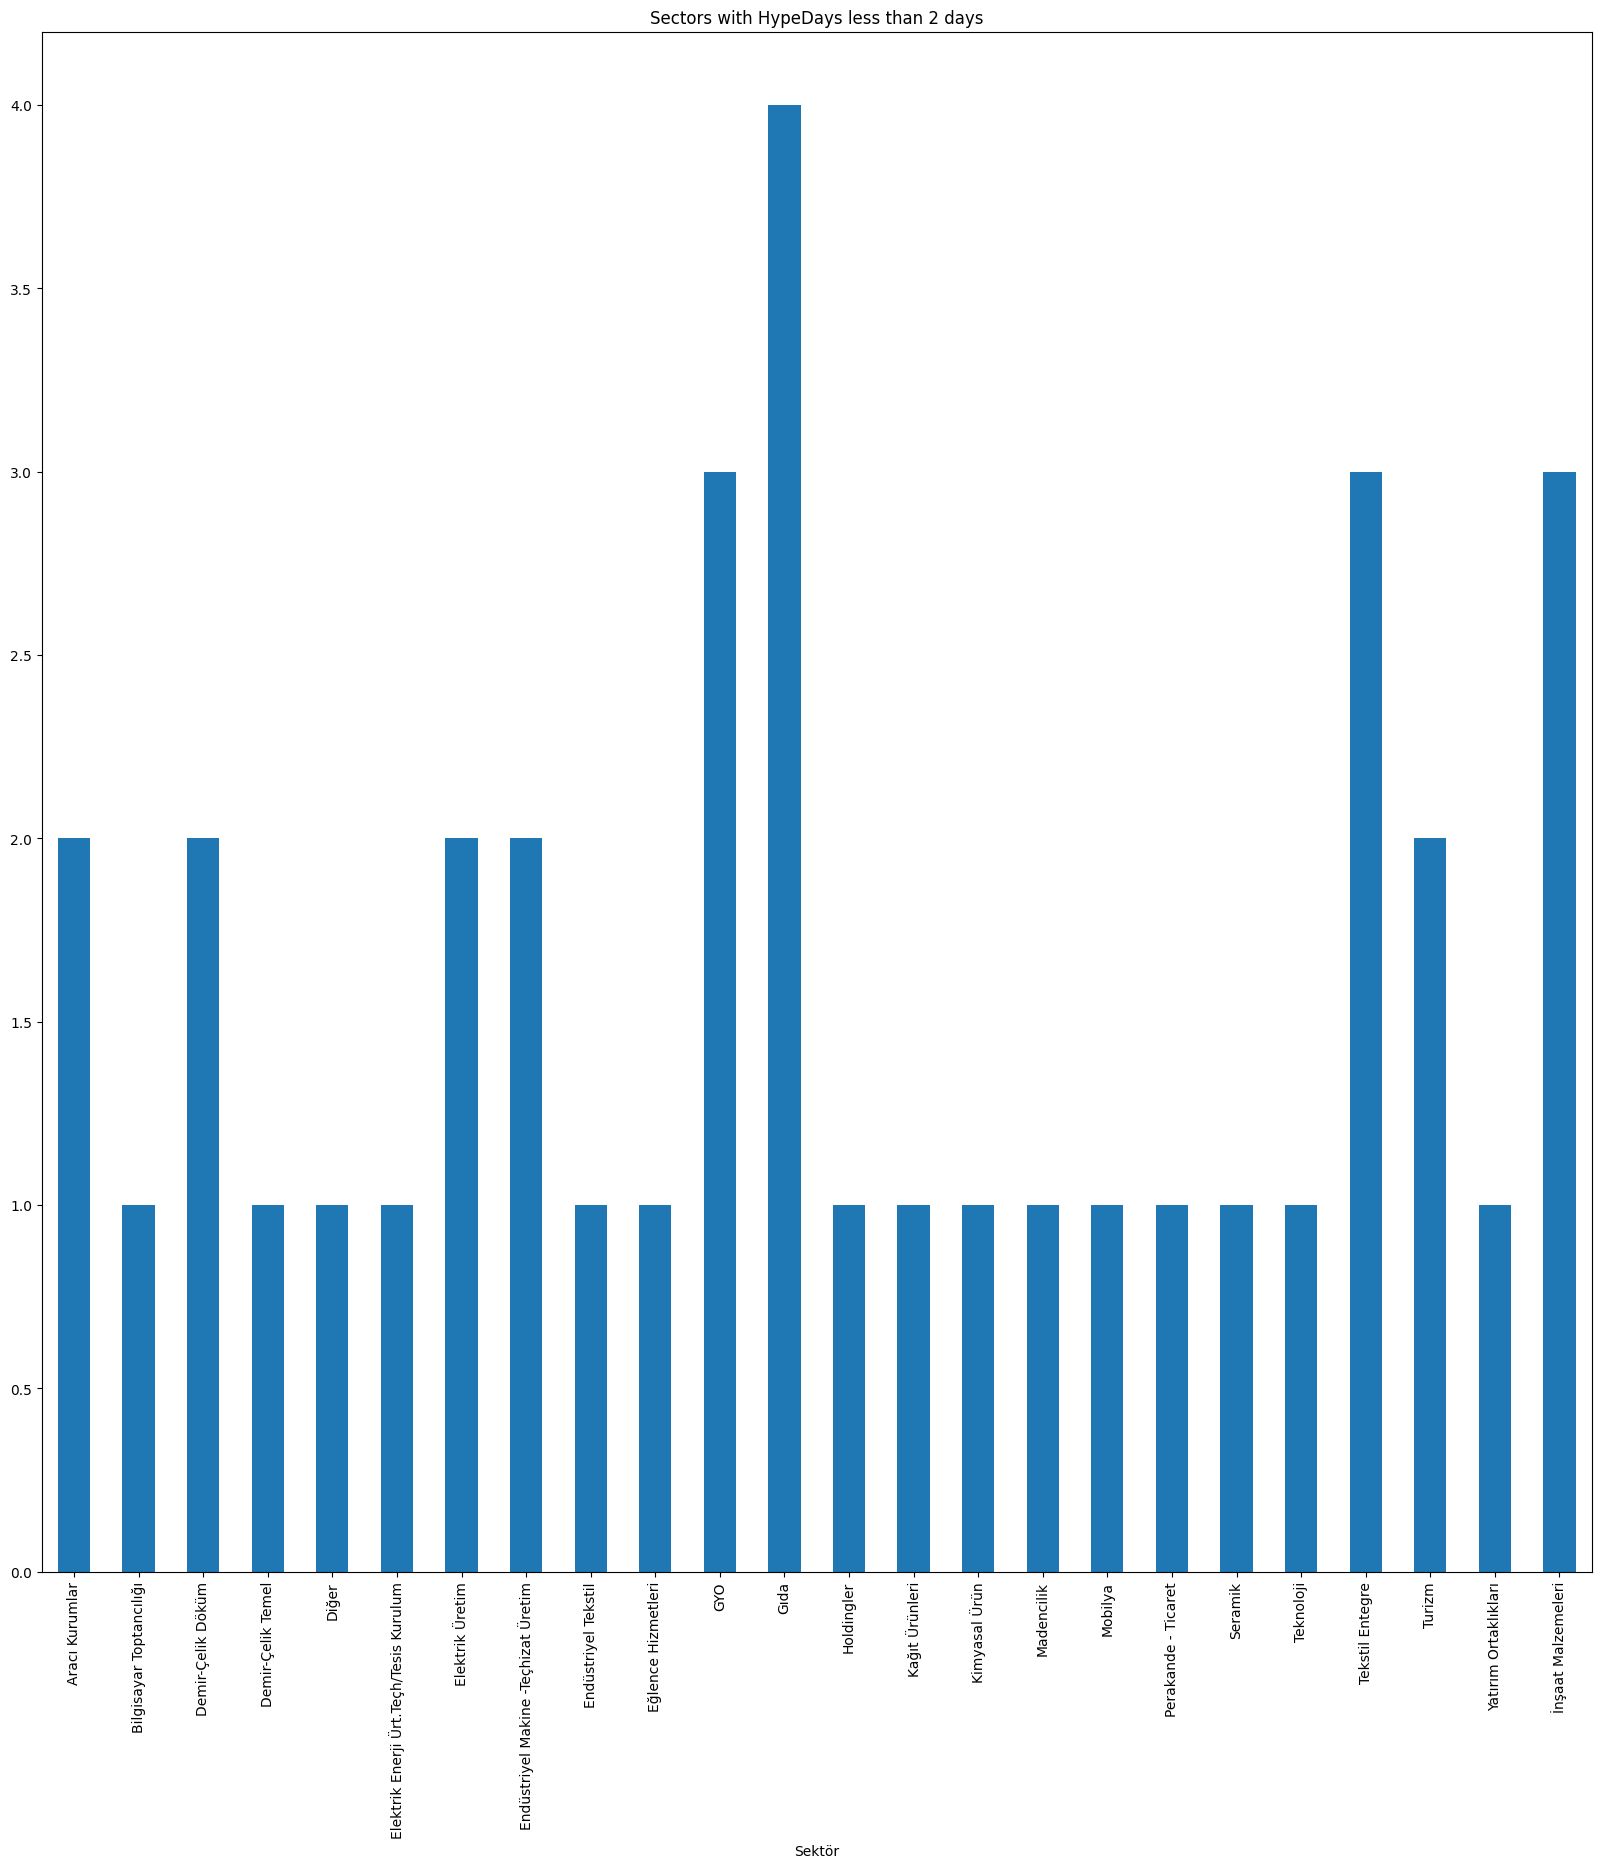

In [137]:
df[(df["HypeDays"] <= 2)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays less than 2 days');

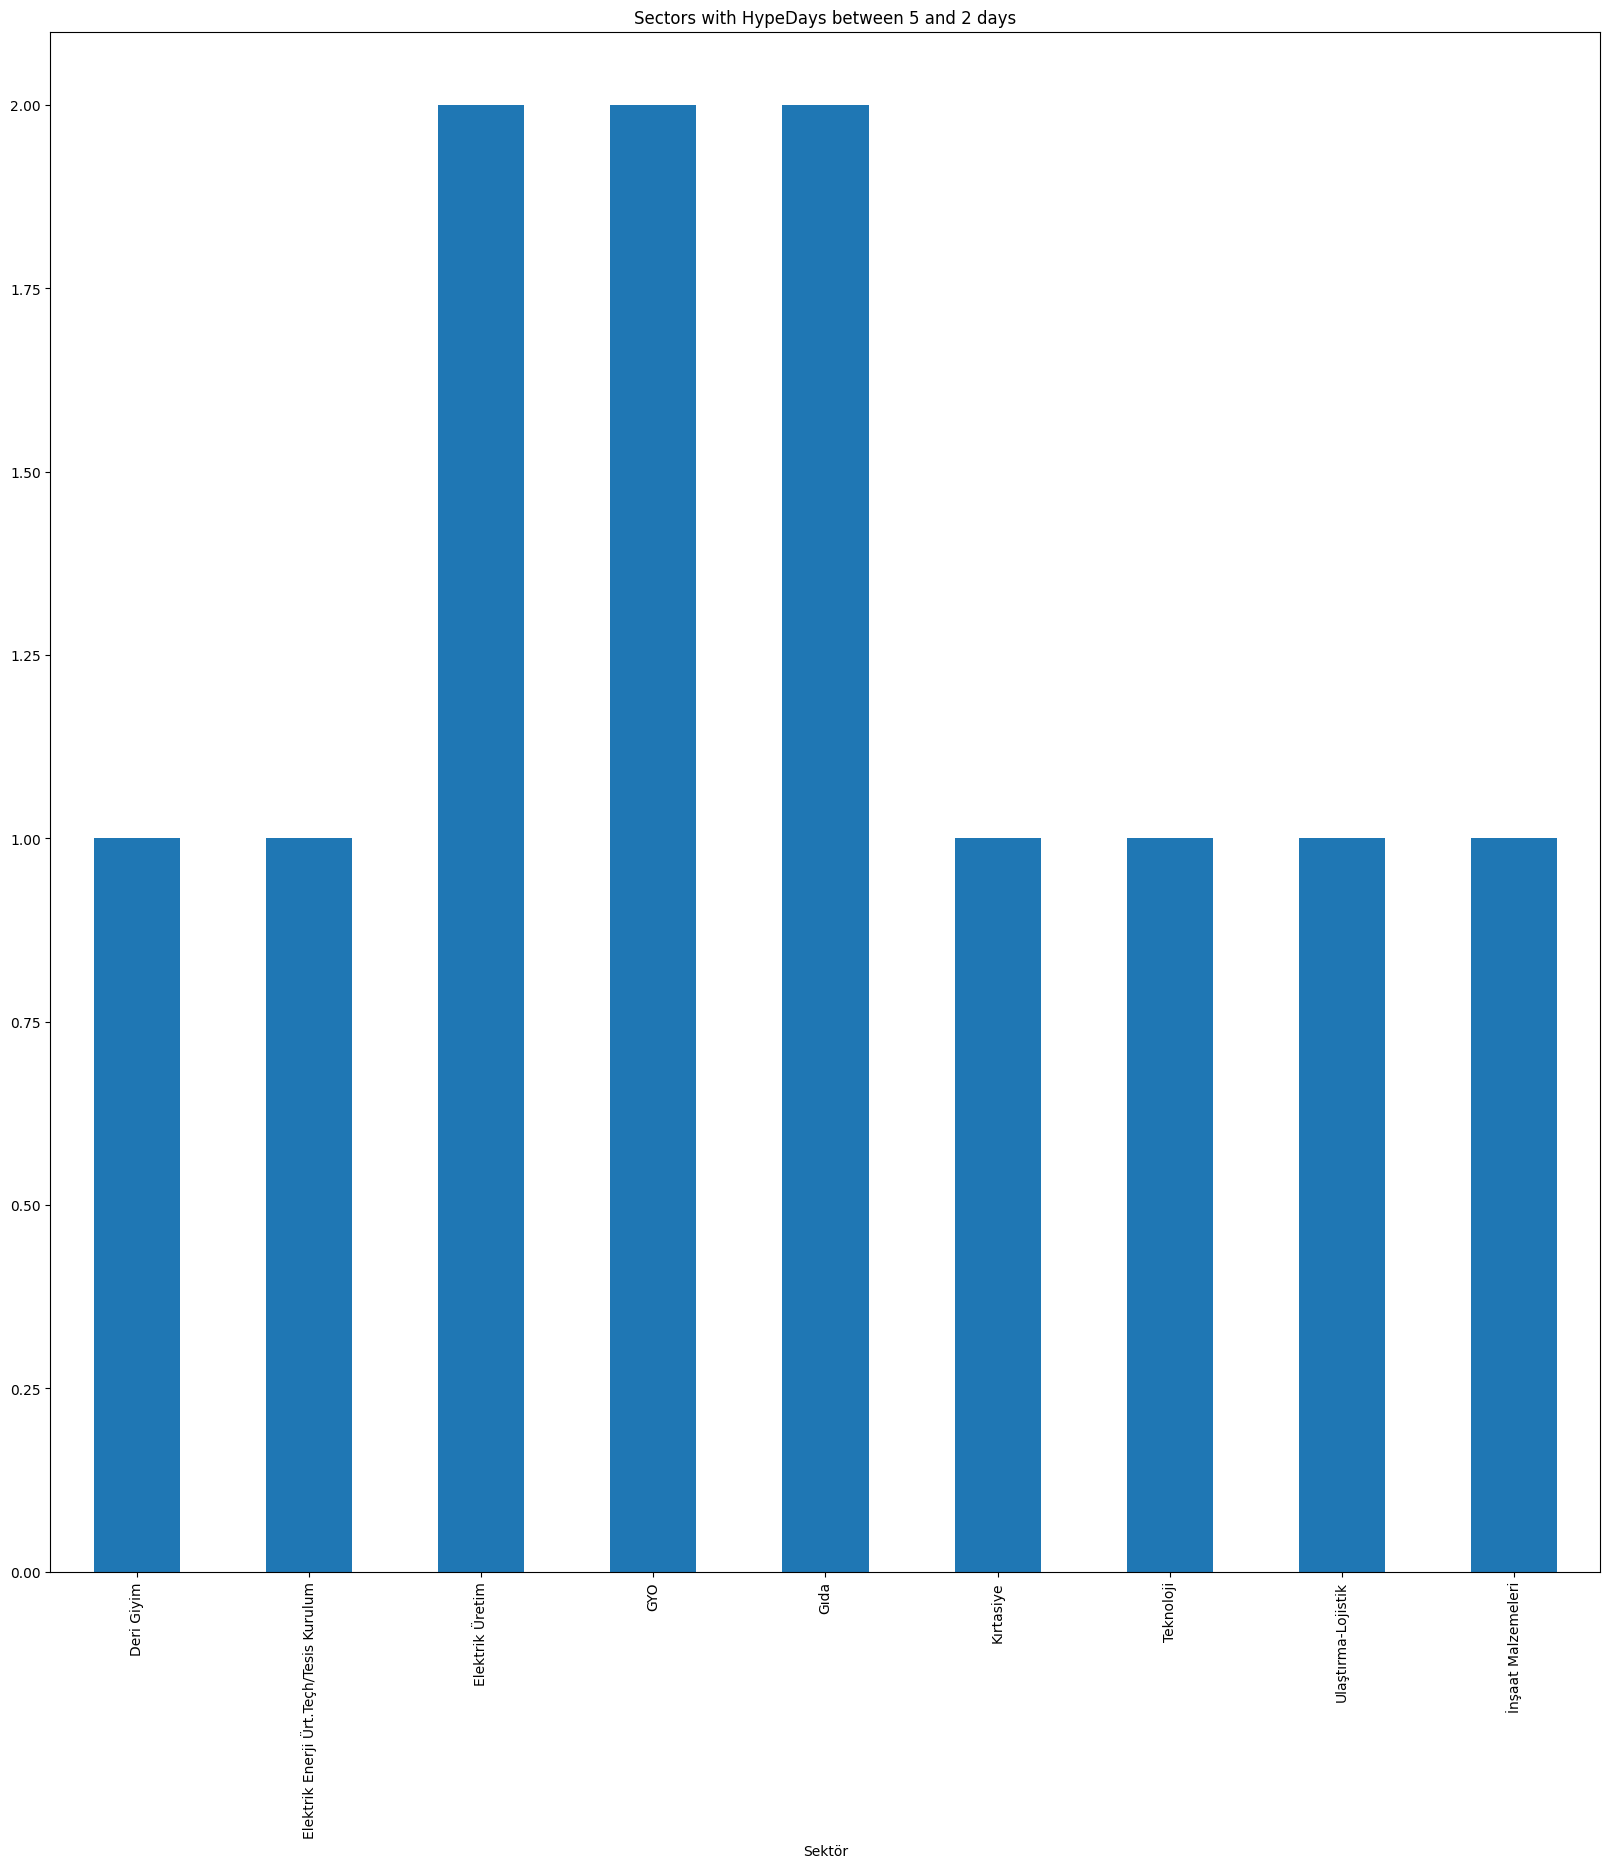

In [138]:
df[(df["HypeDays"] > 2) & (df["HypeDays"] < 5)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays between 5 and 2 days');

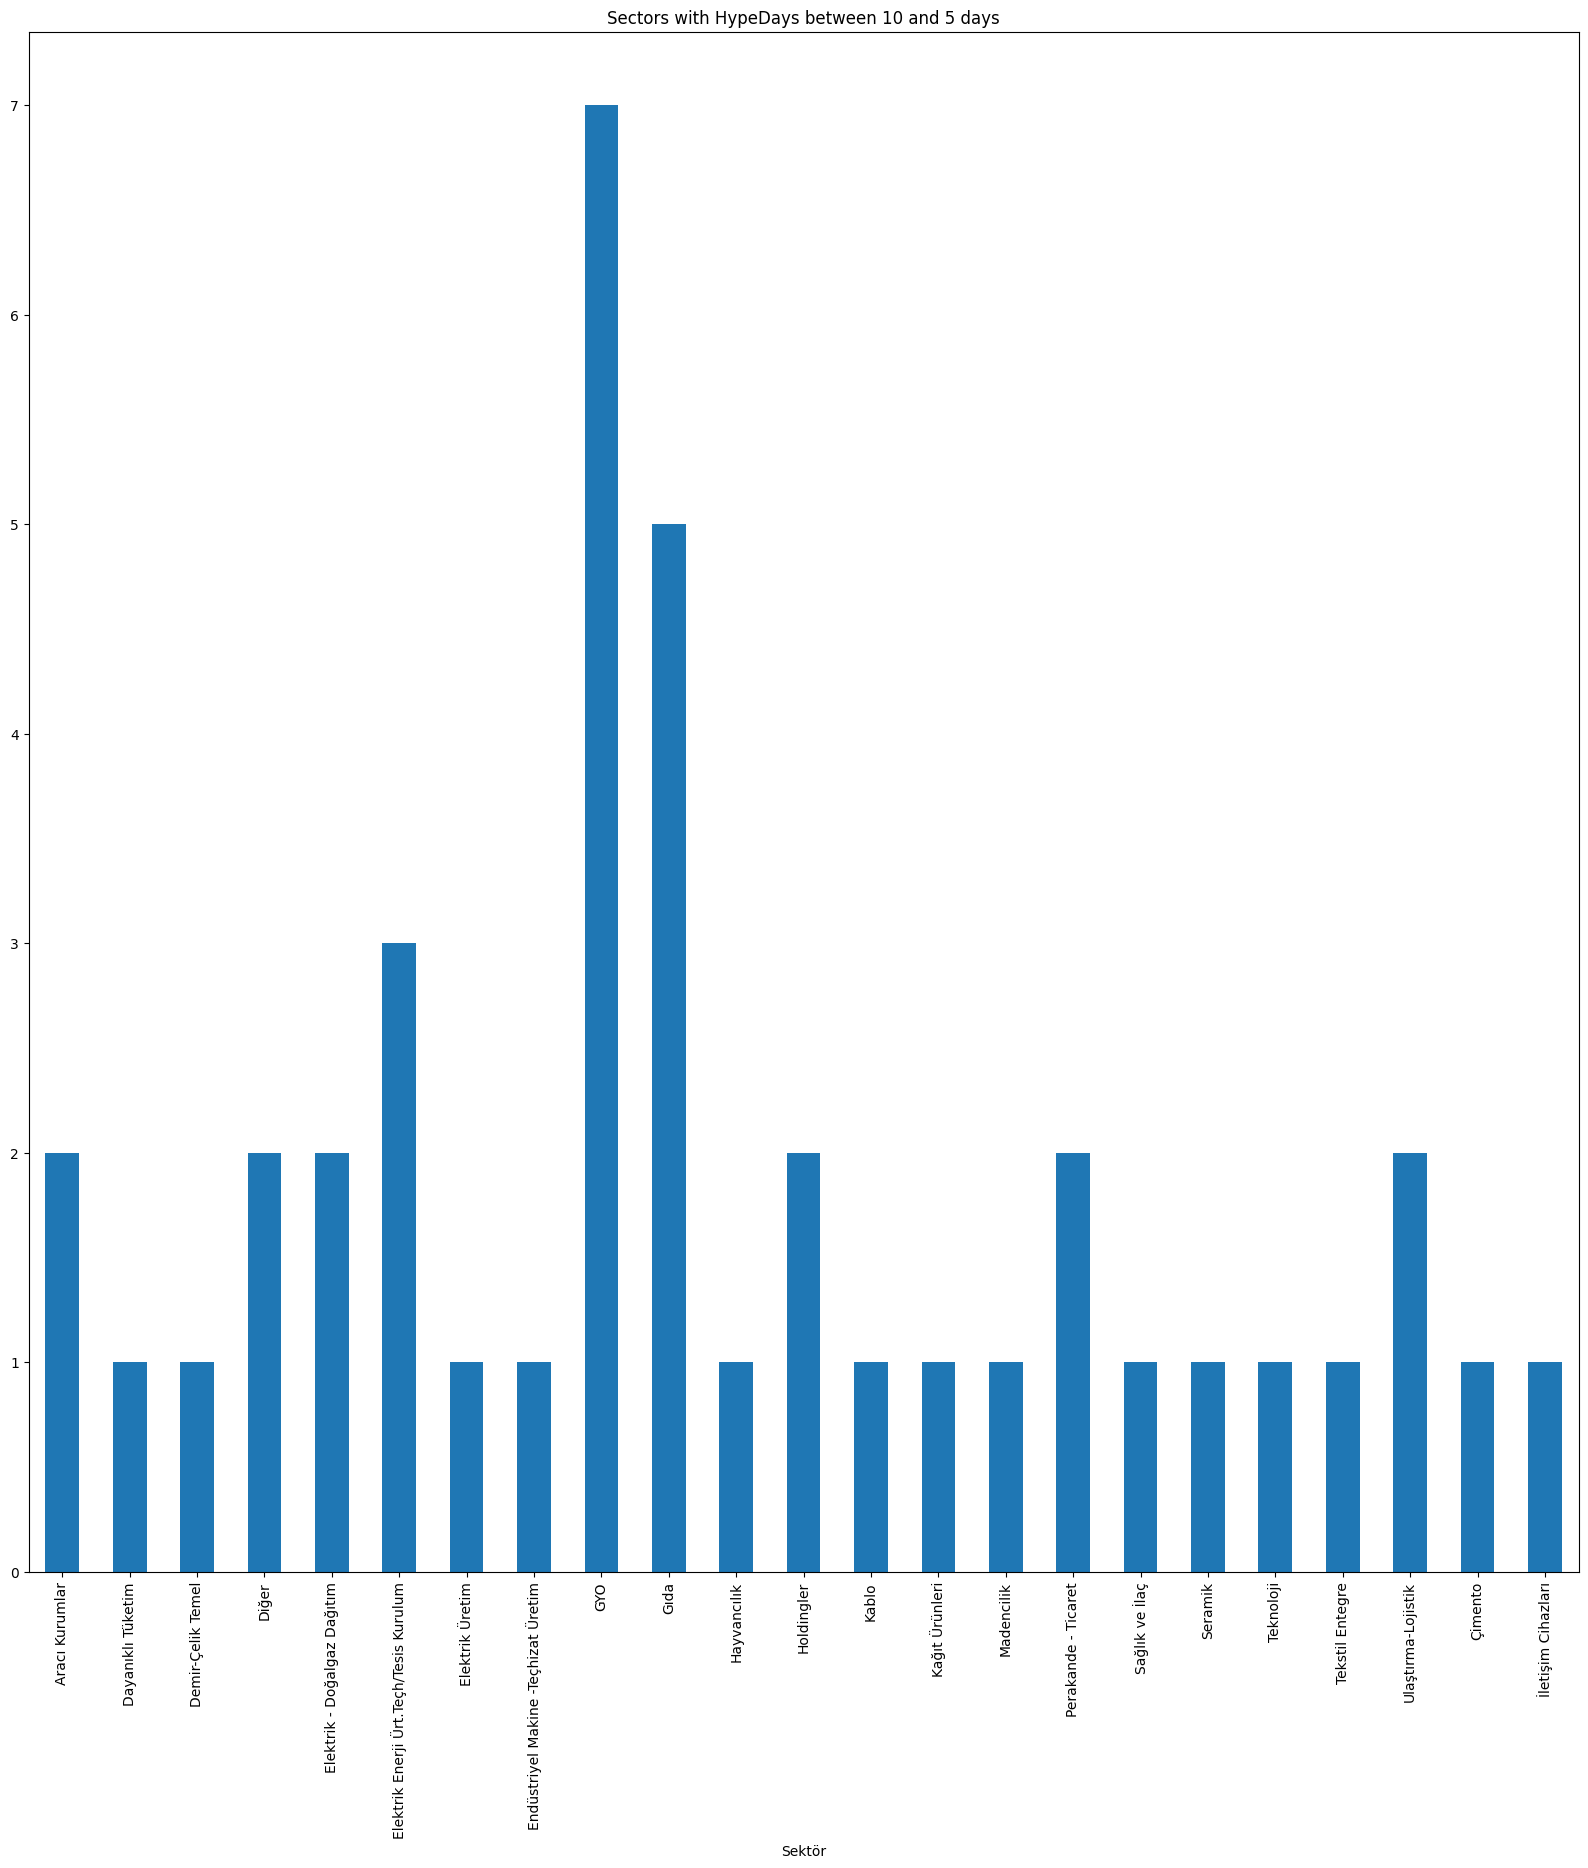

In [139]:
df[(df["HypeDays"] >= 5) & (df["HypeDays"] <= 10)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays between 10 and 5 days');

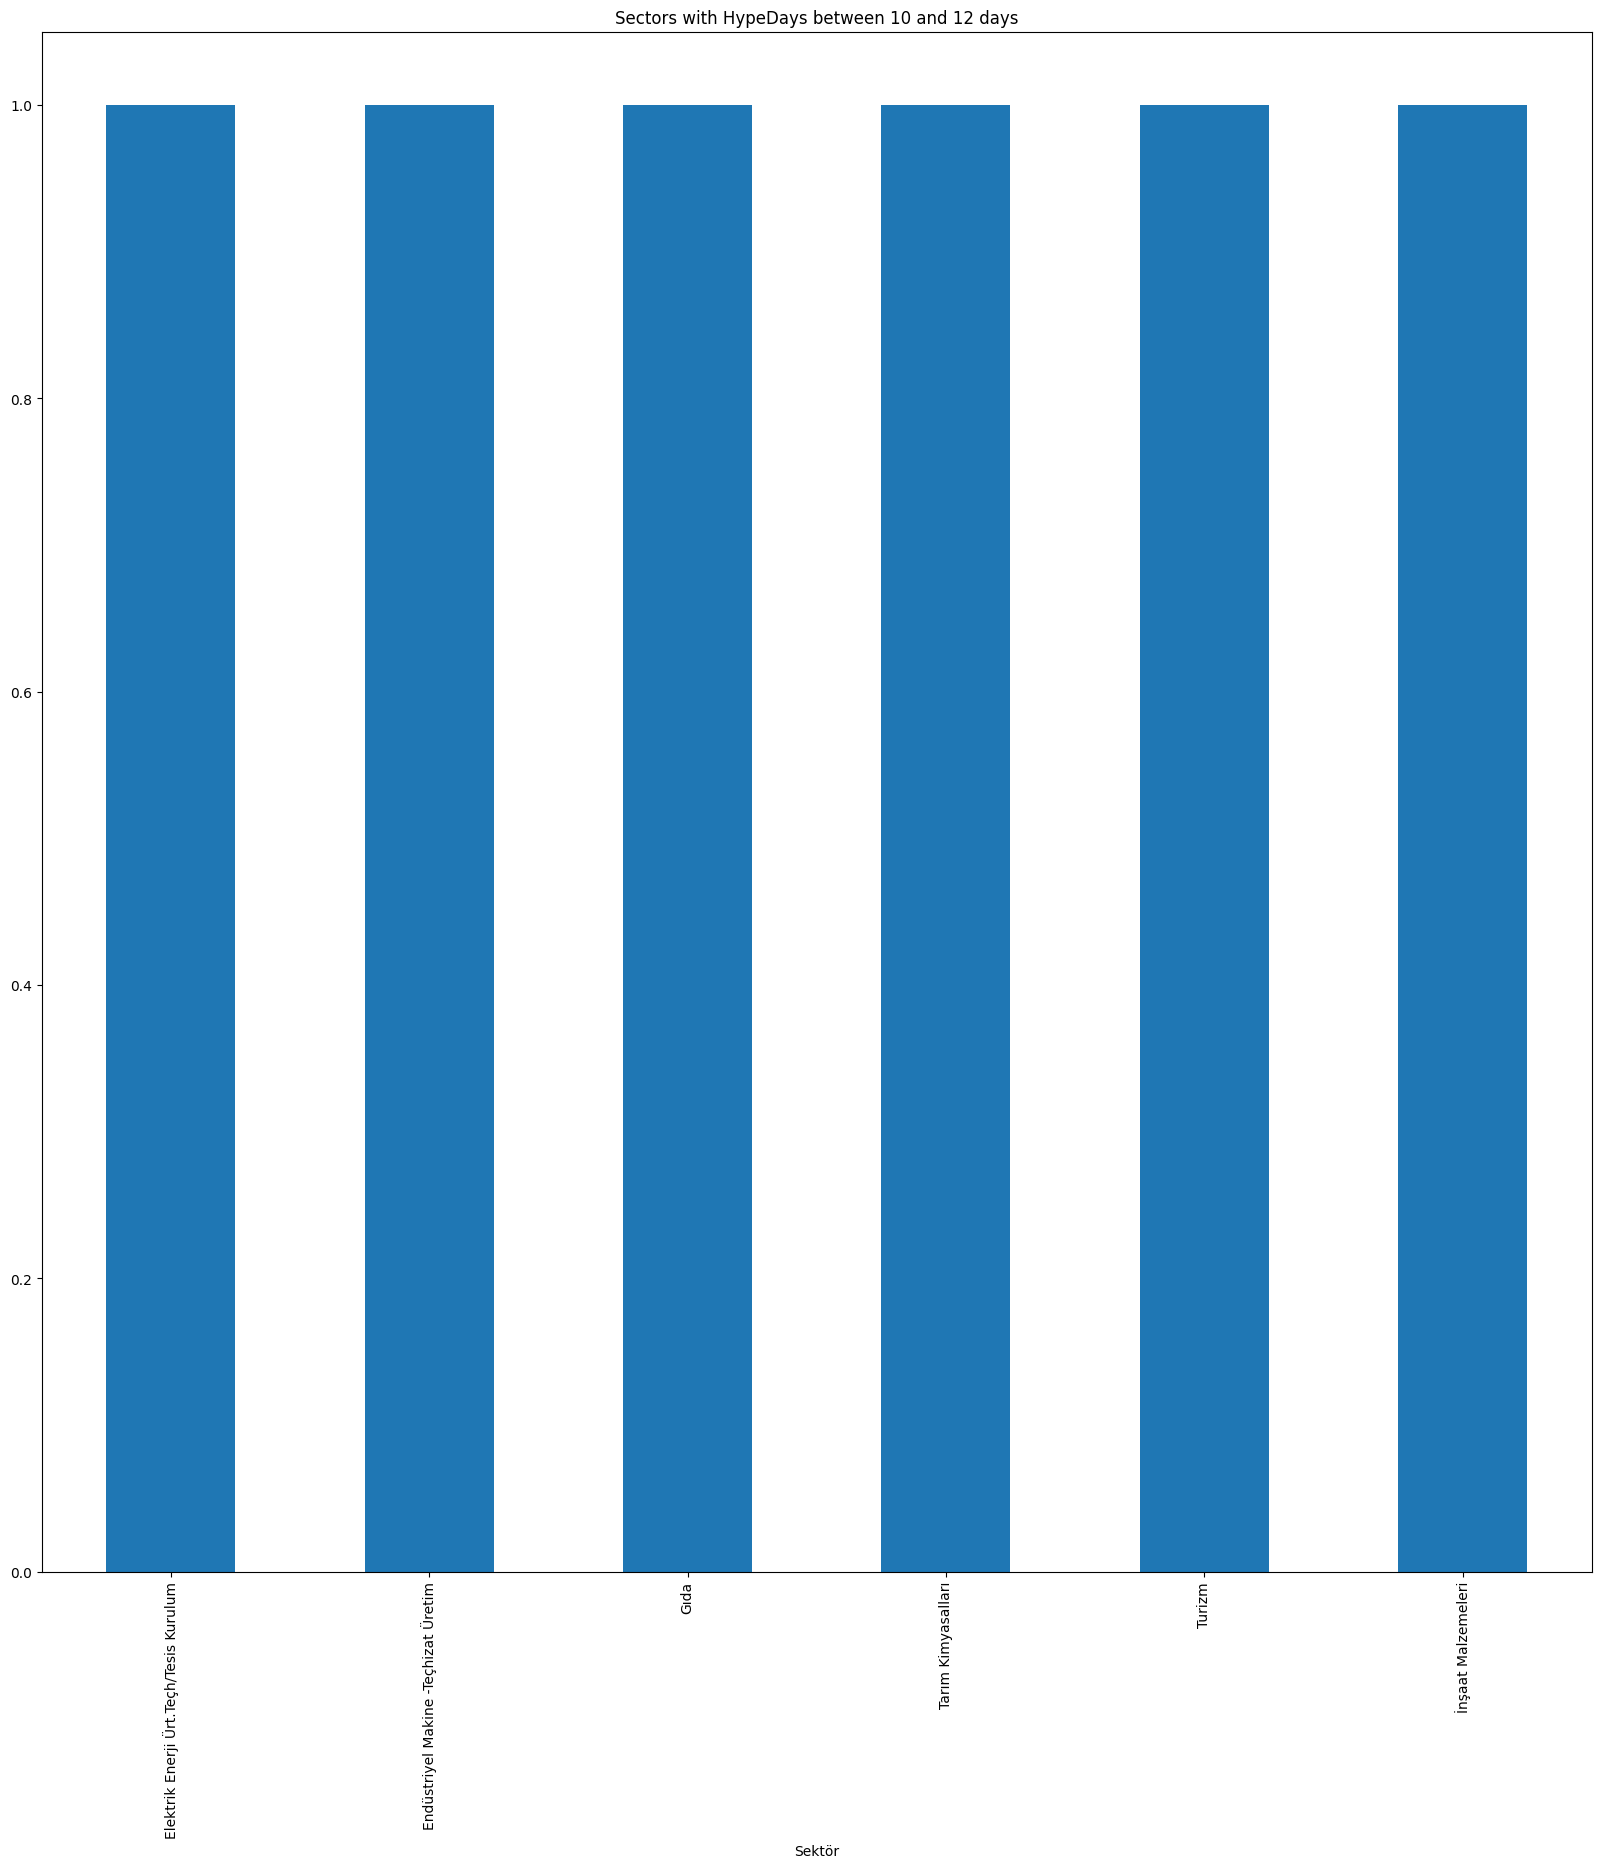

In [140]:
df[(df["HypeDays"] > 10) & (df["HypeDays"] <= 12)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays between 10 and 12 days');

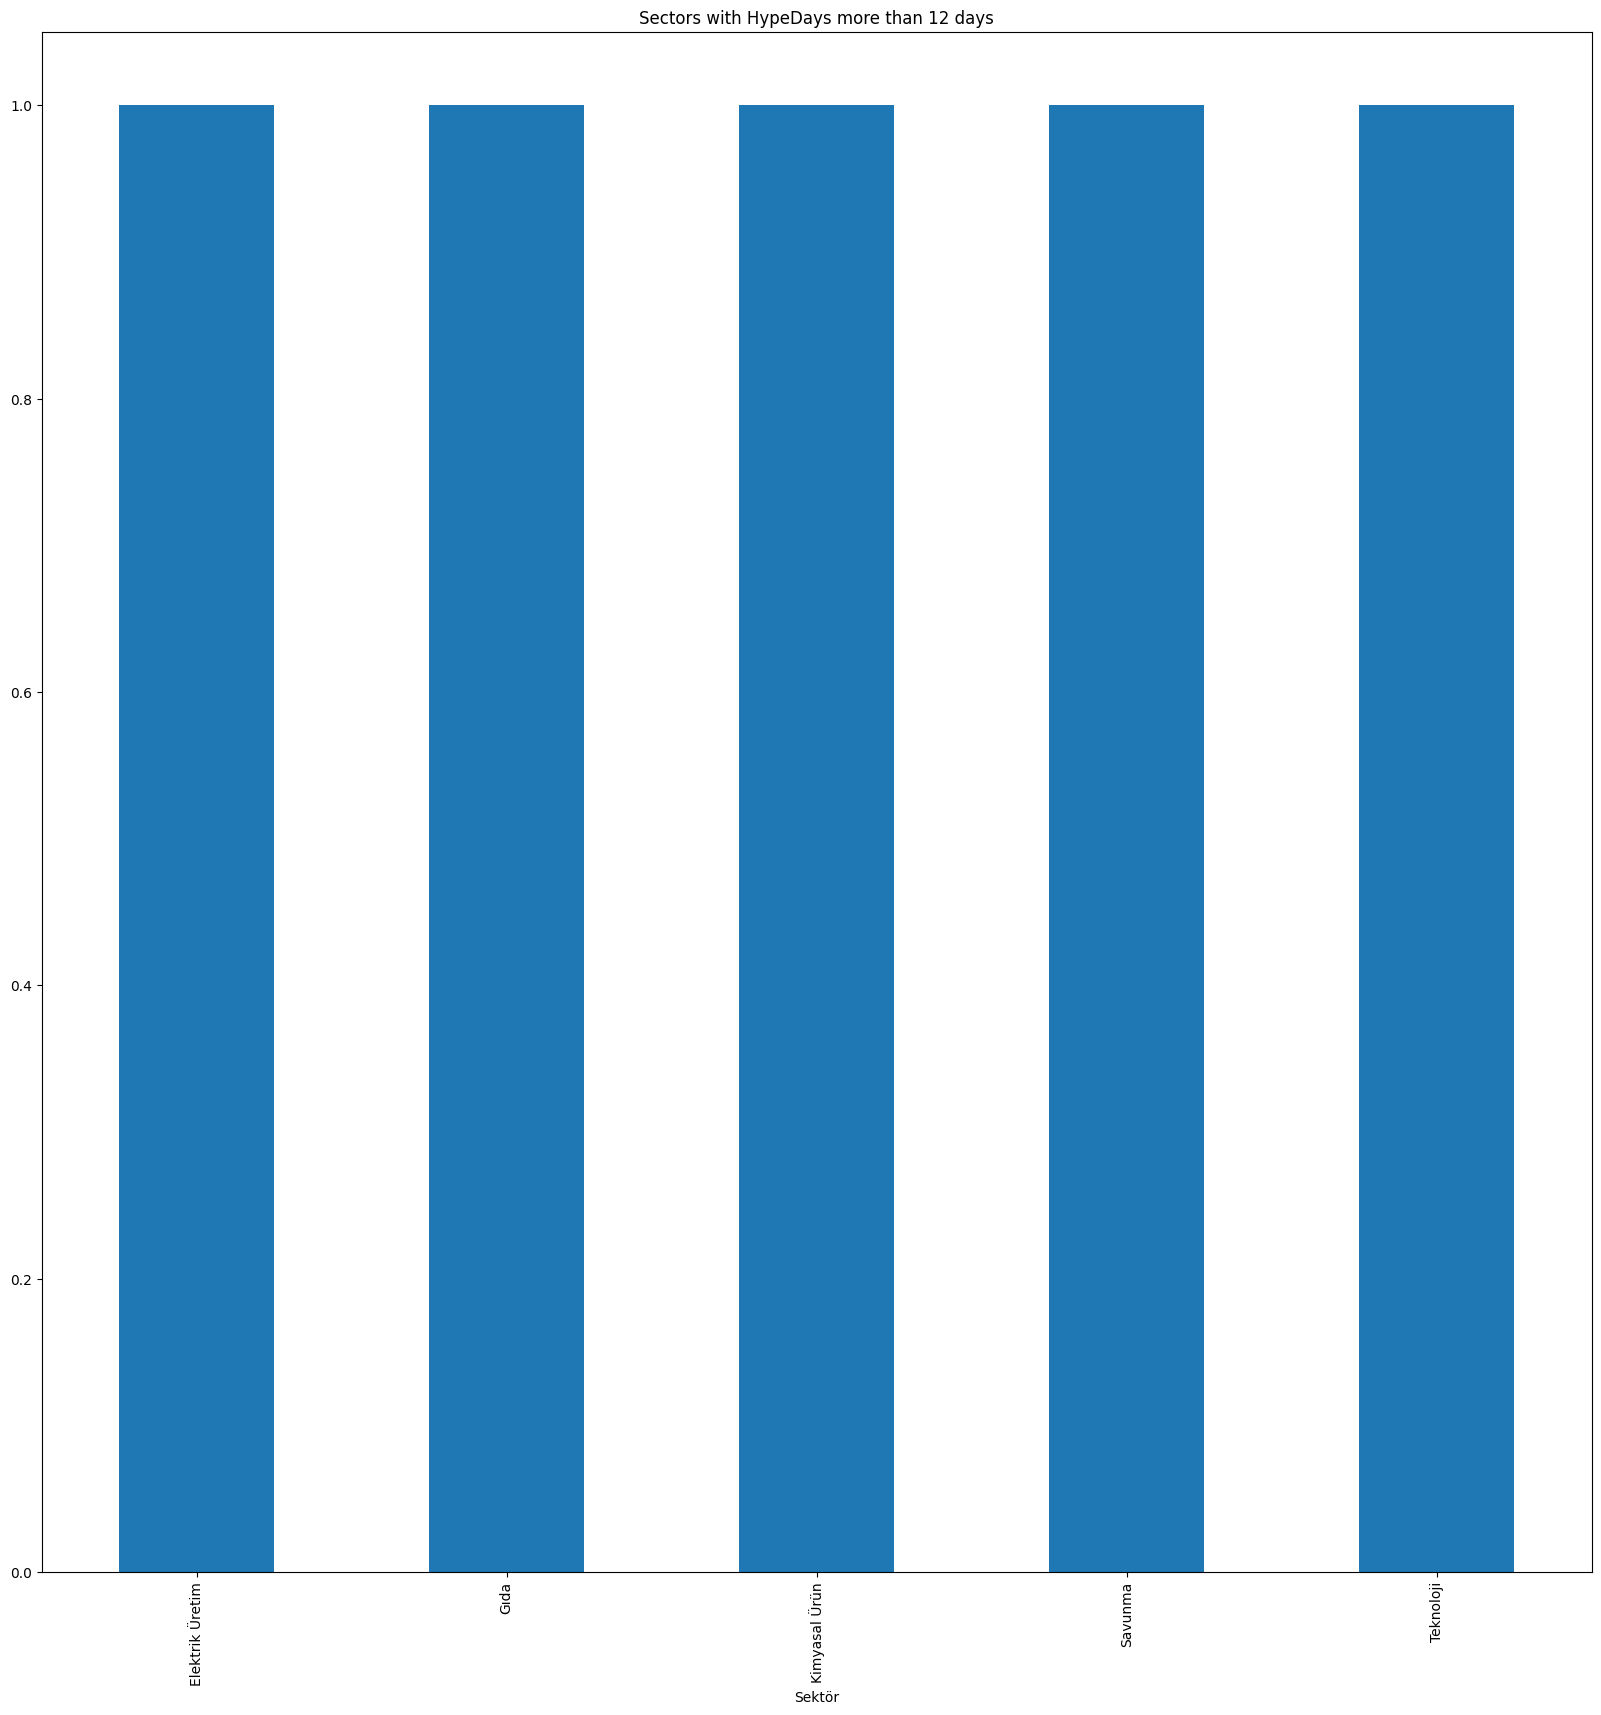

In [141]:
df[(df["HypeDays"] > 12)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays more than 12 days');

In [143]:
df.columns

Index(['Halka Arz Fiyatı/Aralığı : ', 'Dağıtım Yöntemi : ', 'Pay : ', 'Symbol',
       'Pazar : ', 'Aracı Kurum : ', 'Bist İlk İşlem Tarihi : ', 'HypeDays',
       'Yurtici_Kisi', 'Yurtici_Lot', 'Yurtdisi_Kisi', 'Yurtdisi_Lot',
       'Yurtici_Kurumsal', 'Yurtici_Kurumsal_Lot', 'Yurtdisi_Kurumsal',
       'Yurtdisi_Kurumsal_Lot', 'Sirket_Calisanlari_Kisi',
       'Sirket_Calisanlari_Lot', 'Yuksek Başvurulu_Kisi',
       'Yuksek Başvurulu_Lot', 'Yuksek Başvurulu Bireysel_Kisi',
       'Yuksek Başvurulu Bireysel_Lot', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)',
       'New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)', 'New_Sermaye'],
      dtype='object')

In [144]:
df.head(1)

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Symbol,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :,HypeDays,Yurtici_Kisi,Yurtici_Lot,...,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran,Sektör,Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL),New_Bireysel_Oran,New_Piyasa Değeri (mn $),New_Sermaye
0,30.0,Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,10,3198260.0,26520000.0,...,99.994185,0.005815,Teknoloji,9387.0,2909.0,400,1105.0,55.0,25.0,15.0


<Axes: >

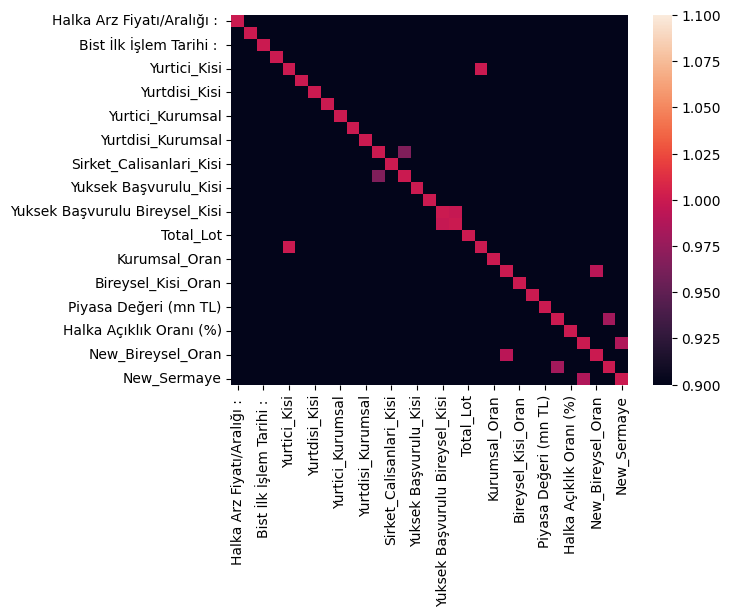

In [165]:
sns.heatmap(df.drop(columns=["Symbol", "Pazar : ", 'Aracı Kurum : ', 'Sektör']).corr(), vmax=1., vmin=1.)

In [169]:
df.drop(columns=["Symbol", "Pazar : ", 'Aracı Kurum : ', 'Sektör']).corr().sort_values('HypeDays', ascending=False)['HypeDays']

HypeDays                          1.000000
Bist İlk İşlem Tarihi :           0.387892
Total_Kisi                        0.266663
Yurtici_Kisi                      0.266247
Yurtdisi_Kisi                     0.260528
Yurtici_Kurumsal                  0.170139
Piyasa Değeri (mn $)              0.145451
New_Piyasa Değeri (mn $)          0.141181
Piyasa Değeri (mn TL)             0.108988
Halka Arz Fiyatı/Aralığı :        0.108605
Yuksek Başvurulu_Kisi             0.105989
Bireysel_Kisi_Oran                0.066601
Yurtici_Kurumsal_Lot              0.061806
Yurtdisi_Kurumsal_Lot             0.056738
Sirket_Calisanlari_Lot            0.049984
Total_Lot                         0.038350
Kurumsal_Oran                     0.028621
Yurtdisi_Lot                      0.017992
Yurtici_Lot                       0.014270
Kurumsal_Kisi_Oran                0.011856
Bireysel_Oran                    -0.001972
Yuksek Başvurulu Bireysel_Lot    -0.015029
Yuksek Başvurulu Bireysel_Kisi   -0.018616
New_Bireyse

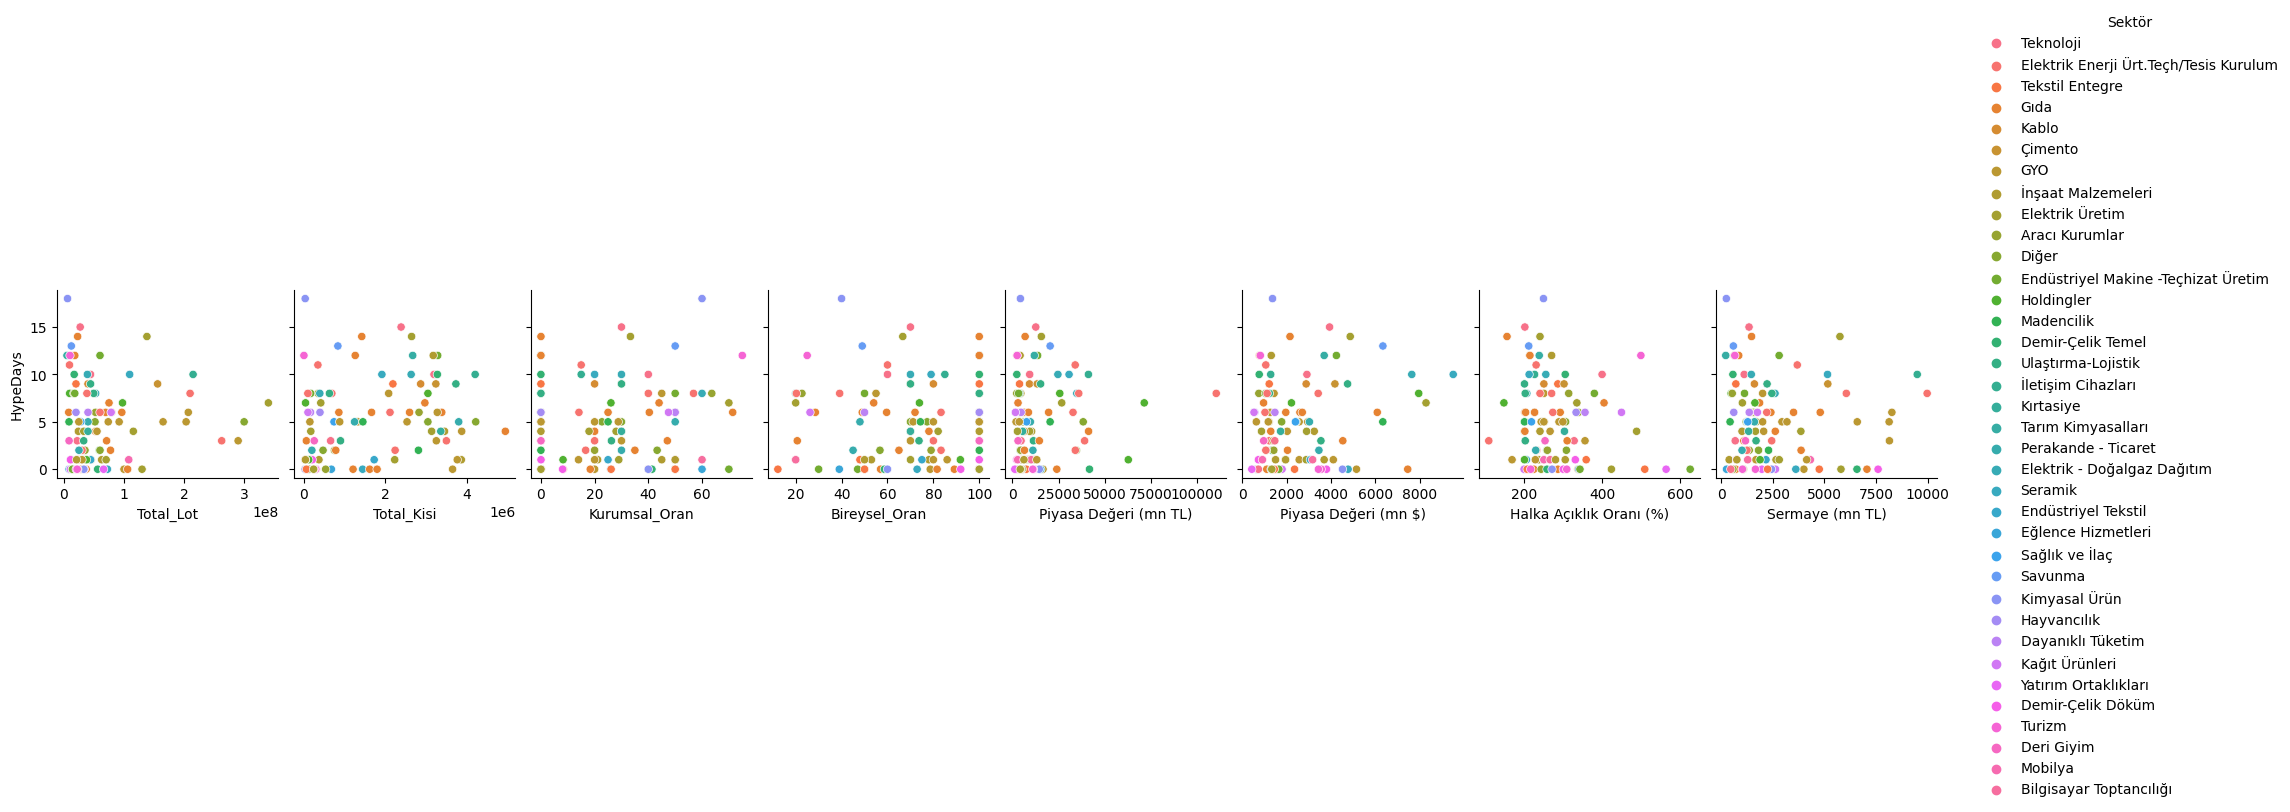

In [179]:
sns.pairplot(df, x_vars=['Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)'],
       y_vars=['HypeDays'], hue='Sektör')
plt.show()

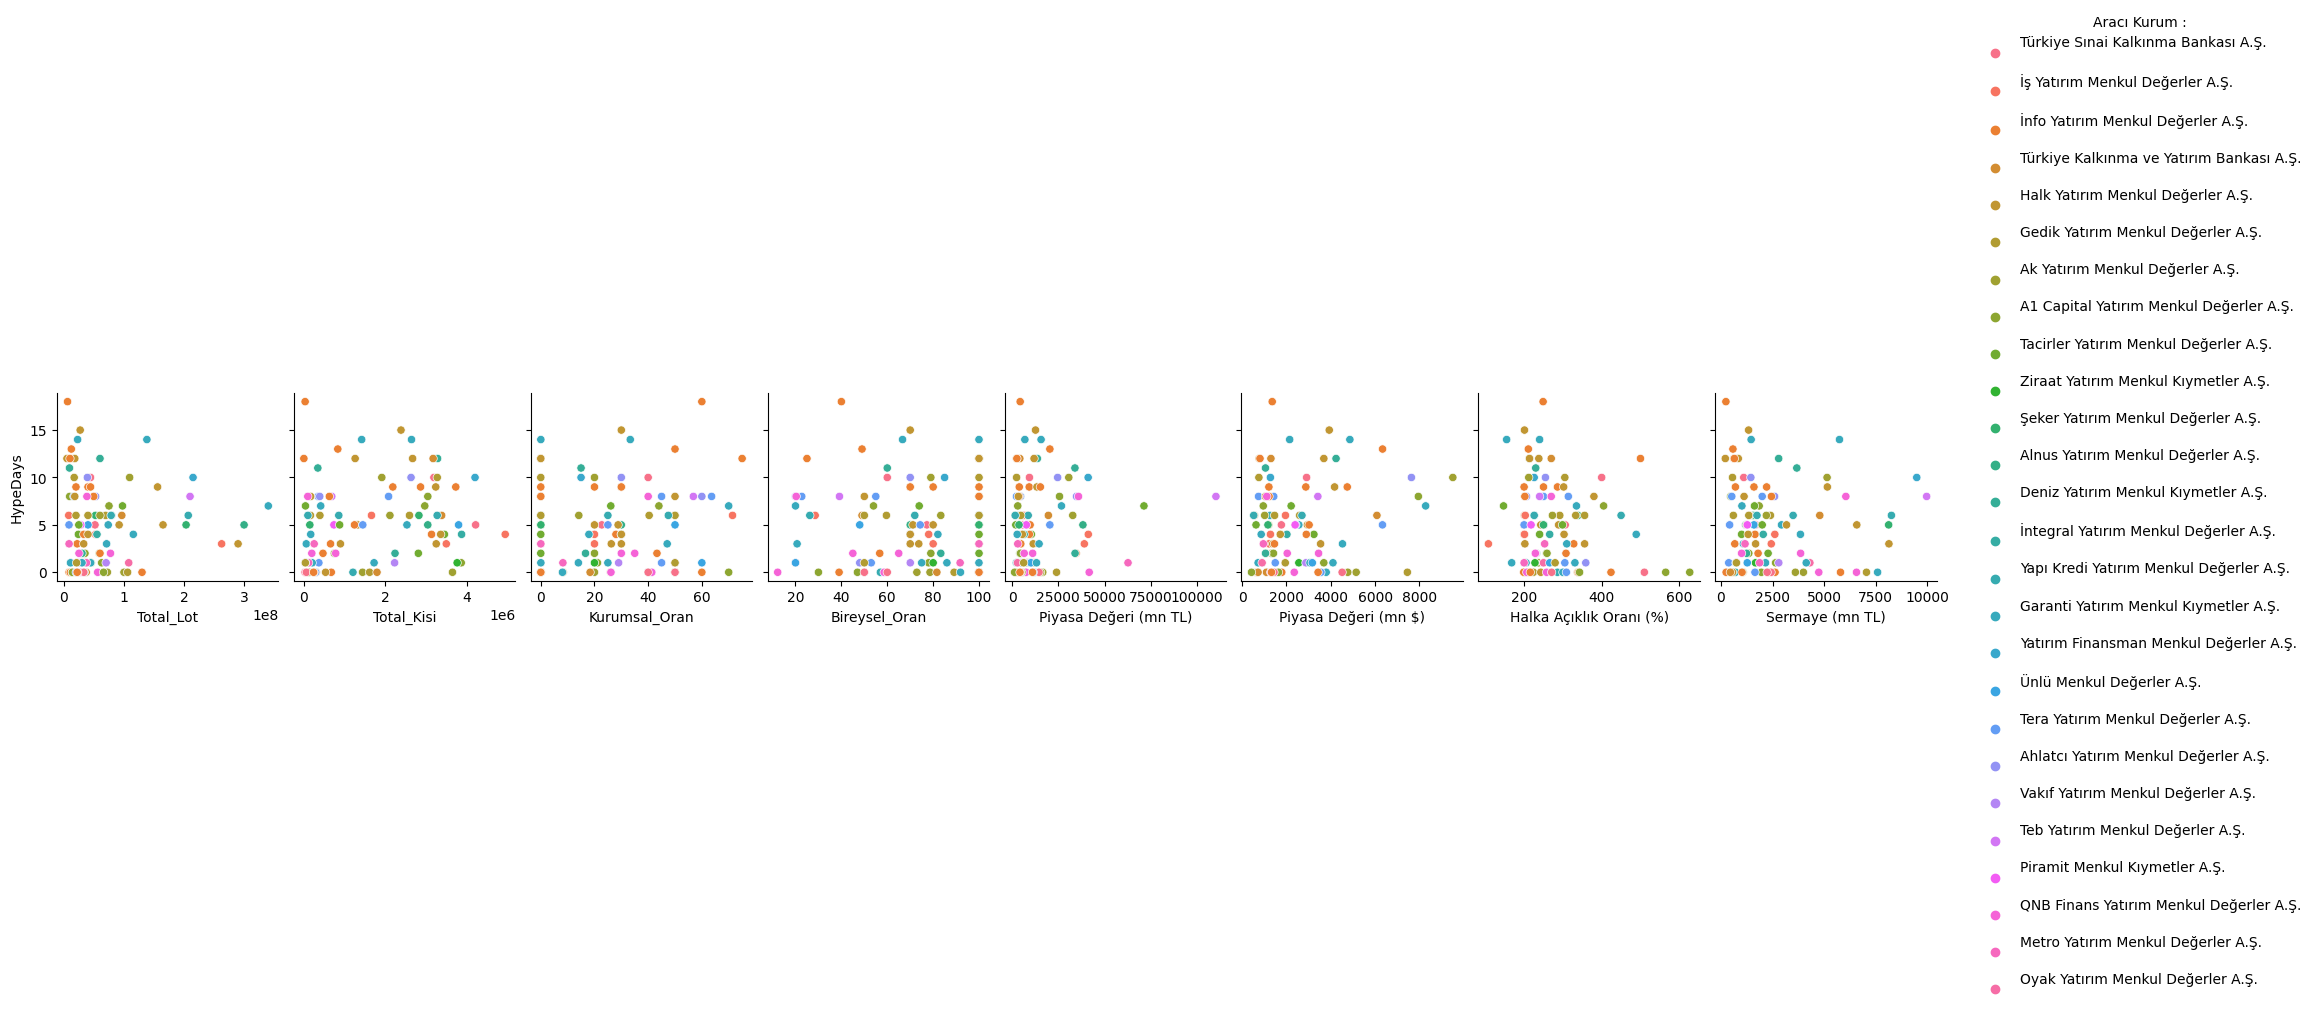

In [180]:
sns.pairplot(df, x_vars=['Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)'],
       y_vars=['HypeDays'], hue='Aracı Kurum : ')
plt.show()

## Model Training

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :      102 non-null    float64       
 1   Dağıtım Yöntemi :               102 non-null    int64         
 2   Symbol                          102 non-null    object        
 3   Pazar :                         102 non-null    object        
 4   Aracı Kurum :                   102 non-null    object        
 5   Bist İlk İşlem Tarihi :         102 non-null    datetime64[ns]
 6   HypeDays                        102 non-null    int64         
 7   Yurtici_Kisi                    102 non-null    float64       
 8   Yurtici_Lot                     102 non-null    float64       
 9   Yurtdisi_Kisi                   102 non-null    float64       
 10  Yurtdisi_Lot                    102 non-null    float64       
 11  Yurtic

In [184]:
df_ = df.copy()
df_.columns

Index(['Halka Arz Fiyatı/Aralığı : ', 'Dağıtım Yöntemi : ', 'Symbol',
       'Pazar : ', 'Aracı Kurum : ', 'Bist İlk İşlem Tarihi : ', 'HypeDays',
       'Yurtici_Kisi', 'Yurtici_Lot', 'Yurtdisi_Kisi', 'Yurtdisi_Lot',
       'Yurtici_Kurumsal', 'Yurtici_Kurumsal_Lot', 'Yurtdisi_Kurumsal',
       'Yurtdisi_Kurumsal_Lot', 'Sirket_Calisanlari_Kisi',
       'Sirket_Calisanlari_Lot', 'Yuksek Başvurulu_Kisi',
       'Yuksek Başvurulu_Lot', 'Yuksek Başvurulu Bireysel_Kisi',
       'Yuksek Başvurulu Bireysel_Lot', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)',
       'New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)', 'New_Sermaye'],
      dtype='object')

In [185]:
x = df_.drop(columns=['New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)', 'New_Sermaye', 'Dağıtım Yöntemi : ', 'Symbol', 'Pazar : ', 'Aracı Kurum : ',
                      'Bist İlk İşlem Tarihi : ', 'HypeDays'])
y = df_[['HypeDays']]

In [186]:
x['Sektör'] = LabelEncoder().fit_transform(x['Sektör'])

In [187]:
# Adding constant to x
x = sm.add_constant(x)

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [190]:
print(f"Train size is {x_train.shape[0]}")
print(f"Test size is {x_test.shape[0]}")

Train size is 81
Test size is 21


#### OLS

##### Backward Elimination

In [256]:
def backward_elimination(x_train, y_train, sl = 0.05):
    """Backward Elimination.
    Takes train x, y data and significant level, retuns final model summary and remaining columns names.
    Significant level (sl) is 0.05 by default."""
    x_train_ = x_train.copy()
    model = sm.OLS(y_train, x_train_).fit()
    while any(model.pvalues > sl):
        x_train_.drop(columns = [model.pvalues.drop(index="const").idxmax()], axis = 1, inplace = True)
        model = sm.OLS(y_train, x_train_).fit()
    eq = 'HypeDays = '
    for parameter in model.params.keys():
        eq = eq + str(model.params[parameter]) + '*' + parameter + ' + '
    eq = eq[:-2]
    return model, x_train_.columns, eq

In [257]:
model, cols, eq = backward_elimination(x_train, y_train)

In [264]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               HypeDays   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     5.825
Date:                Mon, 13 May 2024   Prob (F-statistic):            0.00439
Time:                        12:46:54   Log-Likelihood:                -226.46
No. Observations:                  81   AIC:                             458.9
Df Residuals:                      78   BIC:                             466.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.3235      0.694      4.787      0.000       1.941       4.706
Yurtici_Kisi    -0.0004      0.000     -2.567      0.012      -0.001   -9.29e-05
Total_Kisi       0.0004      0.000      2.572      0.012    9.36e-05       0.001
==============================================================================
Omnibus:                       16.593   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.622
Skew:                           1.023   Prob(JB):                     5.48e-05
Kurtosis:                       4.275   Cond. No.                     4.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [268]:
print(f"Equation of line = '{eq}")

Equation of line = 'HypeDays = 3.3234797076141476*const + -0.0004138100750188243*Yurtici_Kisi + 0.0004144782842413334*Total_Kisi 


In [284]:
train_err = mean_squared_error(y_train, np.round(model.predict(x_train[cols])).astype(int))
test_err = mean_squared_error(y_test, np.round(model.predict(x_test[cols])).astype(int))
print(f"Train mean squared error for OLS is {train_err}.")
print(f"Test mean squared error for OLS is {test_err}.")

Train mean squared error for OLS is 16.246913580246915.
Test mean squared error for OLS is 16.571428571428573.


In [269]:
print(f"Adj R square is {model.rsquared_adj}")

Adj R square is 0.10763101038558653


In [283]:
ols_pred = np.round(model.predict(x_test[cols])).astype(int)
ols_df = pd.DataFrame({"Actual_values": y_test["HypeDays"].values, "Predicted_values": ols_pred})
ols_df.head(10)

,Actual_values,Predicted_values
30,12,7
67,0,4
62,13,4
47,0,5
42,3,4
40,5,4
90,0,3
45,2,4
10,4,8
0,10,6


#### ElasticNet

In [194]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [198]:
elnet = ElasticNet()
elnet_model = elnet.fit(x_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.940e+02, tolerance: 1.462e-01
  model = cd_fast.enet_coordinate_descent(


In [232]:
print(f"ElasticNet coefficients{elnet_model.coef_}")

ElasticNet coefficients[ 0.00000000e+00 -2.62346024e-02  8.34460451e-07 -1.27689133e-08
  1.10652398e-03  4.45694847e-06 -0.00000000e+00  1.77211589e-09
  2.43624016e-03  5.53625224e-08 -1.36686857e-04 -3.43621635e-07
  4.45095495e-04 -1.82065378e-07  0.00000000e+00  0.00000000e+00
  4.14963369e-09 -2.45091680e-07  7.48471084e-02  7.74907285e-03
  0.00000000e+00  0.00000000e+00  1.66608963e-02  4.09543367e-05
  2.00697932e-04 -6.67349215e-03  1.35042025e-05]


In [231]:
print(f"ElasticNet intercept{elnet_model.intercept_}")

ElasticNet intercept[2.16564326]


In [228]:
train_err = mean_squared_error(y_train, np.round(elnet_model.predict(x_train)).astype(int))
test_err = mean_squared_error(y_test, np.round(elnet_model.predict(x_test)).astype(int))
print(f"Train mean squared error is {train_err}.")
print(f"Test mean squared error is {test_err}.")

Train mean squared error is 12.592592592592593.
Test mean squared error is 21.714285714285715.


In [240]:
print(f"R Square is {r2_score(y_train, np.round(elnet_model.predict(x_train)))}")

R Square is 0.30223130584598745


In [239]:
print(f"R Square is {r2_score(y_test, np.round(elnet_model.predict(x_test).astype(int)))}")

R Square is -0.11880804953560342


In [281]:
pred = np.round(elnet_model.predict(x_test)).astype(int)
elnet_df = pd.DataFrame({"Actual_values": y_test["HypeDays"].values, "Predicted_values": pred})
elnet_df.head(10)


,Actual_values,Predicted_values
0,12,6
1,0,5
2,13,7
3,0,4
4,3,3
5,5,4
6,0,4
7,2,7
8,4,12
9,10,6


## Conclusion

In [285]:
train_err = mean_squared_error(y_train, np.round(model.predict(x_train[cols])).astype(int))
test_err = mean_squared_error(y_test, np.round(model.predict(x_test[cols])).astype(int))
print(f"Train mean squared error for OLS is {train_err}.")
print(f"Test mean squared error for OLS is {test_err}.")

Train mean squared error for OLS is 16.246913580246915.
Test mean squared error for OLS is 16.571428571428573.


In [286]:
train_err = r2_score(y_train, np.round(model.predict(x_train[cols])).astype(int))
test_err = r2_score(y_test, np.round(model.predict(x_test[cols])).astype(int))
print(f"Train r_2 score for OLS is {train_err}.")
print(f"Test r_2 score for OLS is {test_err}.")

Train r_2 score for OLS is 0.09974156715031324.
Test r_2 score for OLS is 0.05727554179566585.


In [292]:
print(f"Equation of line for OLS = '{eq}")

Equation of line for OLS = 'HypeDays = 3.3234797076141476*const + -0.0004138100750188243*Yurtici_Kisi + 0.0004144782842413334*Total_Kisi 


In [345]:
ols_df = pd.DataFrame(data={"Actual_Values": y["HypeDays"].values, "Predicted_Values": np.round(model.predict(x[cols])).astype(int)}, index=y.index)
ols_df = ols_df.merge(df[["Symbol"]],left_index=True, right_index=True)
ols_df["Delta"] = np.where(ols_df["Actual_Values"] >= ols_df["Predicted_Values"], "green", "red")
ols_df.head(10)

,Actual_Values,Predicted_Values,Symbol,Delta
0,10,6,ODINE,green
1,3,6,MOGAN,red
2,9,7,ARTMS,green
3,6,6,OBAMS,green
4,9,5,ALVES,green
5,9,6,LMKDC,green
6,6,5,BORSK,green
7,15,5,PATEK,green
8,0,6,AVPGY,red
9,1,6,MEGMT,red


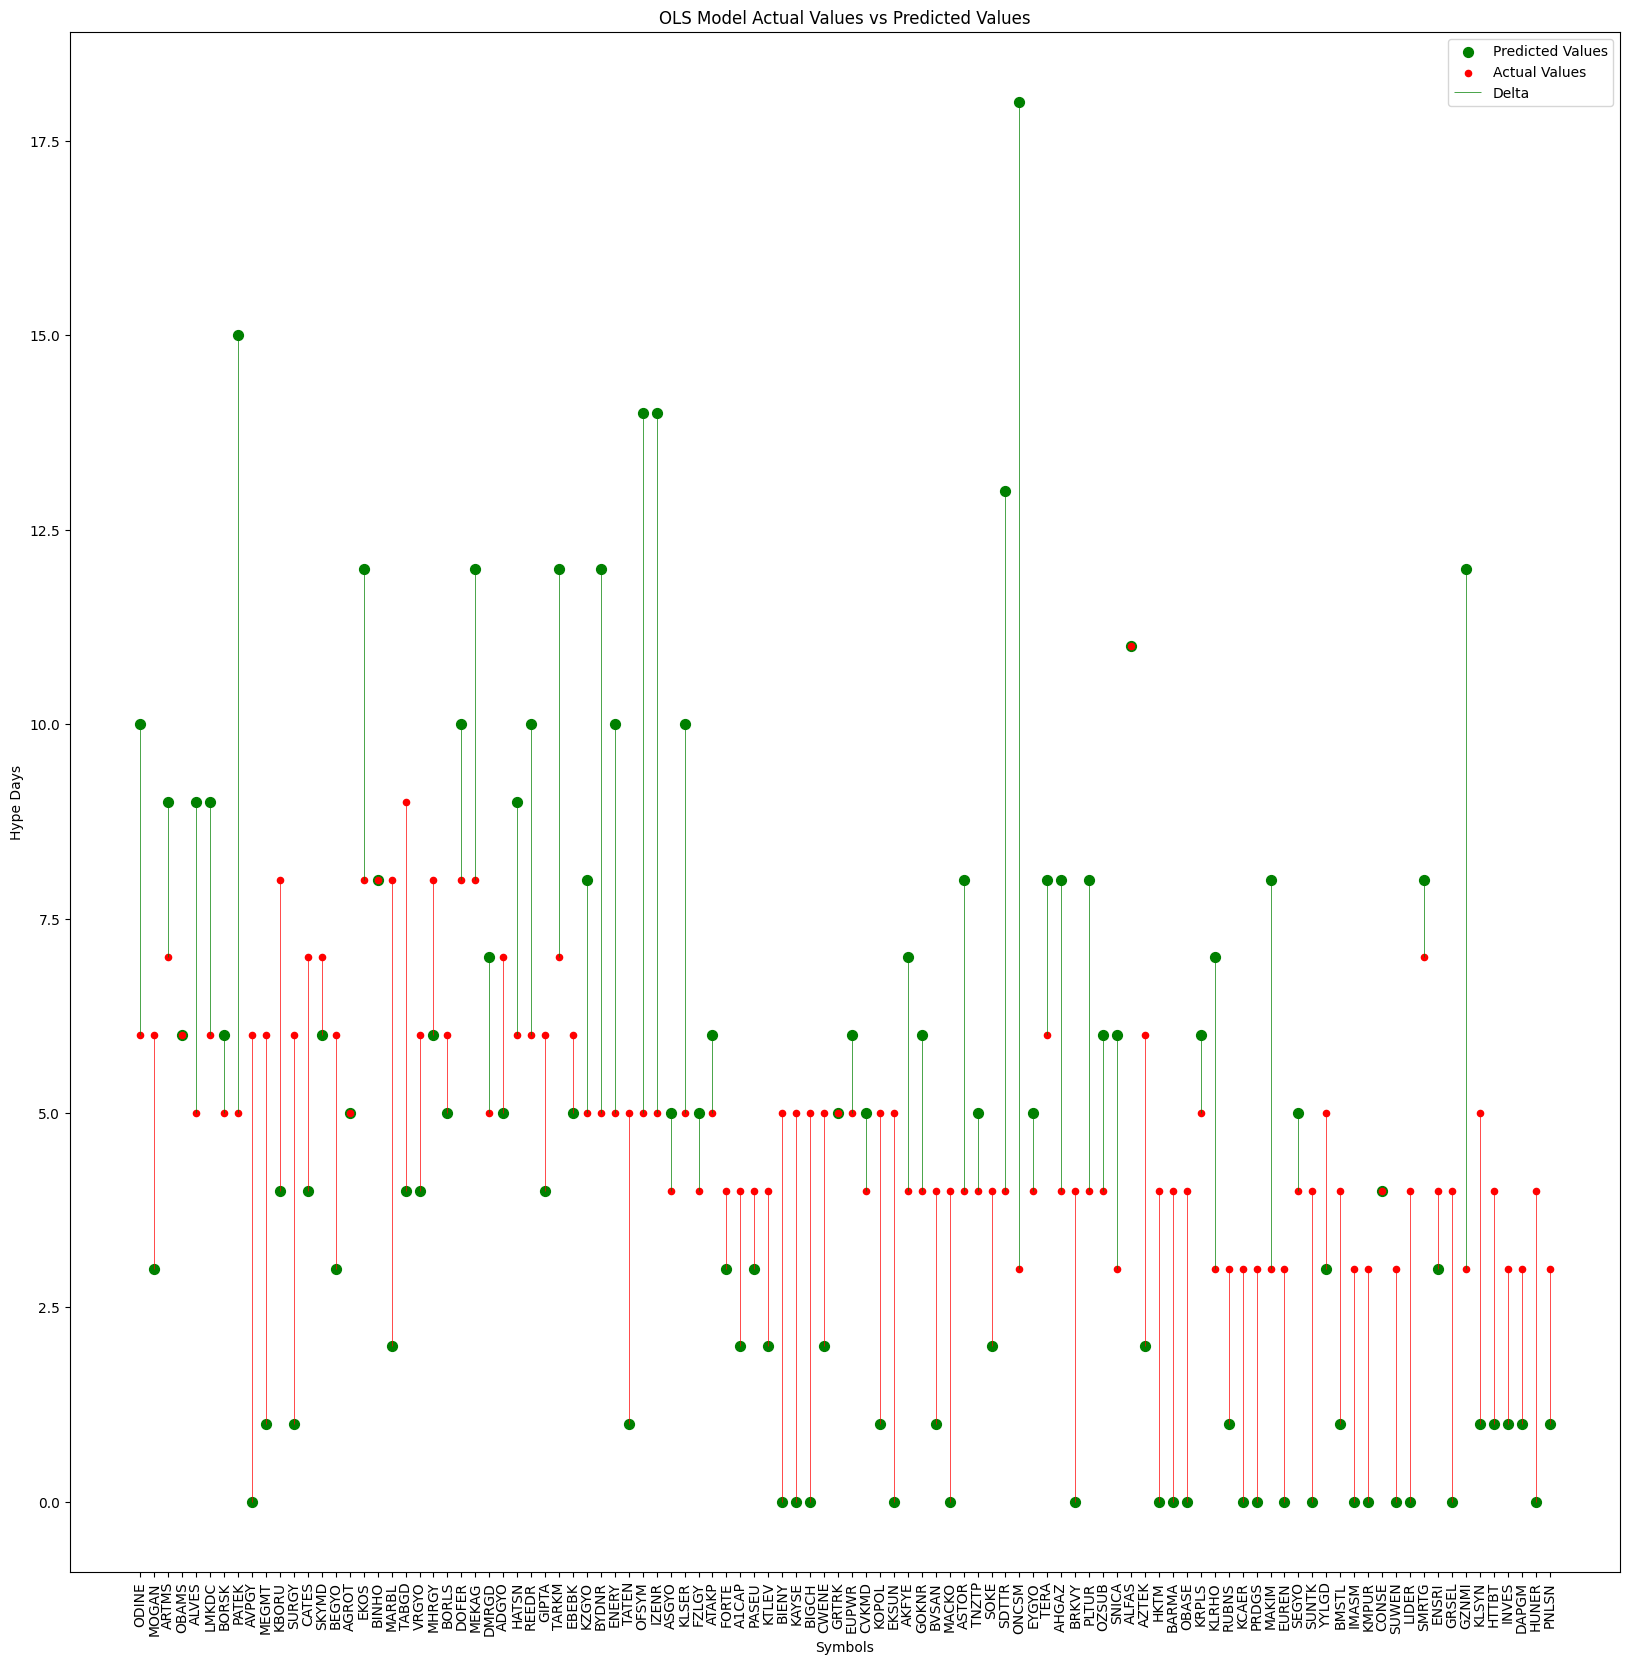

In [365]:
plt.figure(figsize=(20, 20))
plt.scatter(x=ols_df["Symbol"], y=ols_df["Actual_Values"], color="green", label="Predicted Values", s=50);
plt.scatter(x=ols_df["Symbol"], y=ols_df["Predicted_Values"], color="red", label="Actual Values", s=20);
plt.vlines(x=ols_df["Symbol"], ymin=ols_df[["Actual_Values", "Predicted_Values"]].min(axis=1), ymax=ols_df[["Actual_Values", "Predicted_Values"]].max(axis=1), color=ols_df["Delta"], linewidth = 0.5, label="Delta")
plt.title("OLS Model Actual Values vs Predicted Values")
plt.xlabel("Symbols")
plt.ylabel("Hype Days")
plt.legend()
plt.xticks(rotation=90);

In [287]:
train_err = mean_squared_error(y_train, np.round(elnet_model.predict(x_train)).astype(int))
test_err = mean_squared_error(y_test, np.round(elnet_model.predict(x_test)).astype(int))
print(f"Train mean squared error Elastic Net is {train_err}.")
print(f"Test mean squared error Elastic Net is {test_err}.")

Train mean squared error Elastic Net is 12.592592592592593.
Test mean squared error Elastic Net is 21.714285714285715.


In [289]:
train_err = r2_score(y_train, np.round(elnet_model.predict(x_train)).astype(int))
test_err = r2_score(y_test, np.round(elnet_model.predict(x_test)).astype(int))
print(f"Train r_2 score Elastic Net is {train_err}.")
print(f"Test r_2 score Elastic Net is {test_err}.")

Train r_2 score Elastic Net is 0.30223130584598745.
Test r_2 score Elastic Net is -0.23529411764705865.


In [291]:
print(f"ElasticNet coefficients{elnet_model.coef_}")
print(f"ElasticNet intercept{elnet_model.intercept_}")

ElasticNet coefficients[ 0.00000000e+00 -2.62346024e-02  8.34460451e-07 -1.27689133e-08
  1.10652398e-03  4.45694847e-06 -0.00000000e+00  1.77211589e-09
  2.43624016e-03  5.53625224e-08 -1.36686857e-04 -3.43621635e-07
  4.45095495e-04 -1.82065378e-07  0.00000000e+00  0.00000000e+00
  4.14963369e-09 -2.45091680e-07  7.48471084e-02  7.74907285e-03
  0.00000000e+00  0.00000000e+00  1.66608963e-02  4.09543367e-05
  2.00697932e-04 -6.67349215e-03  1.35042025e-05]
ElasticNet intercept[2.16564326]


In [366]:
elnet_df_df = pd.DataFrame(data={"Actual_Values": y["HypeDays"].values, "Predicted_Values": np.round(elnet_model.predict(x)).astype(int)}, index=y.index)
elnet_df = elnet_df_df.merge(df[["Symbol"]],left_index=True, right_index=True)
elnet_df["Delta"] = np.where(elnet_df["Actual_Values"] >= elnet_df["Predicted_Values"], "green", "red")
elnet_df.head(10)

,Actual_Values,Predicted_Values,Symbol,Delta
0,10,6,ODINE,green
1,3,6,MOGAN,red
2,9,7,ARTMS,green
3,6,8,OBAMS,red
4,9,5,ALVES,green
5,9,6,LMKDC,green
6,6,6,BORSK,green
7,15,6,PATEK,green
8,0,4,AVPGY,red
9,1,6,MEGMT,red


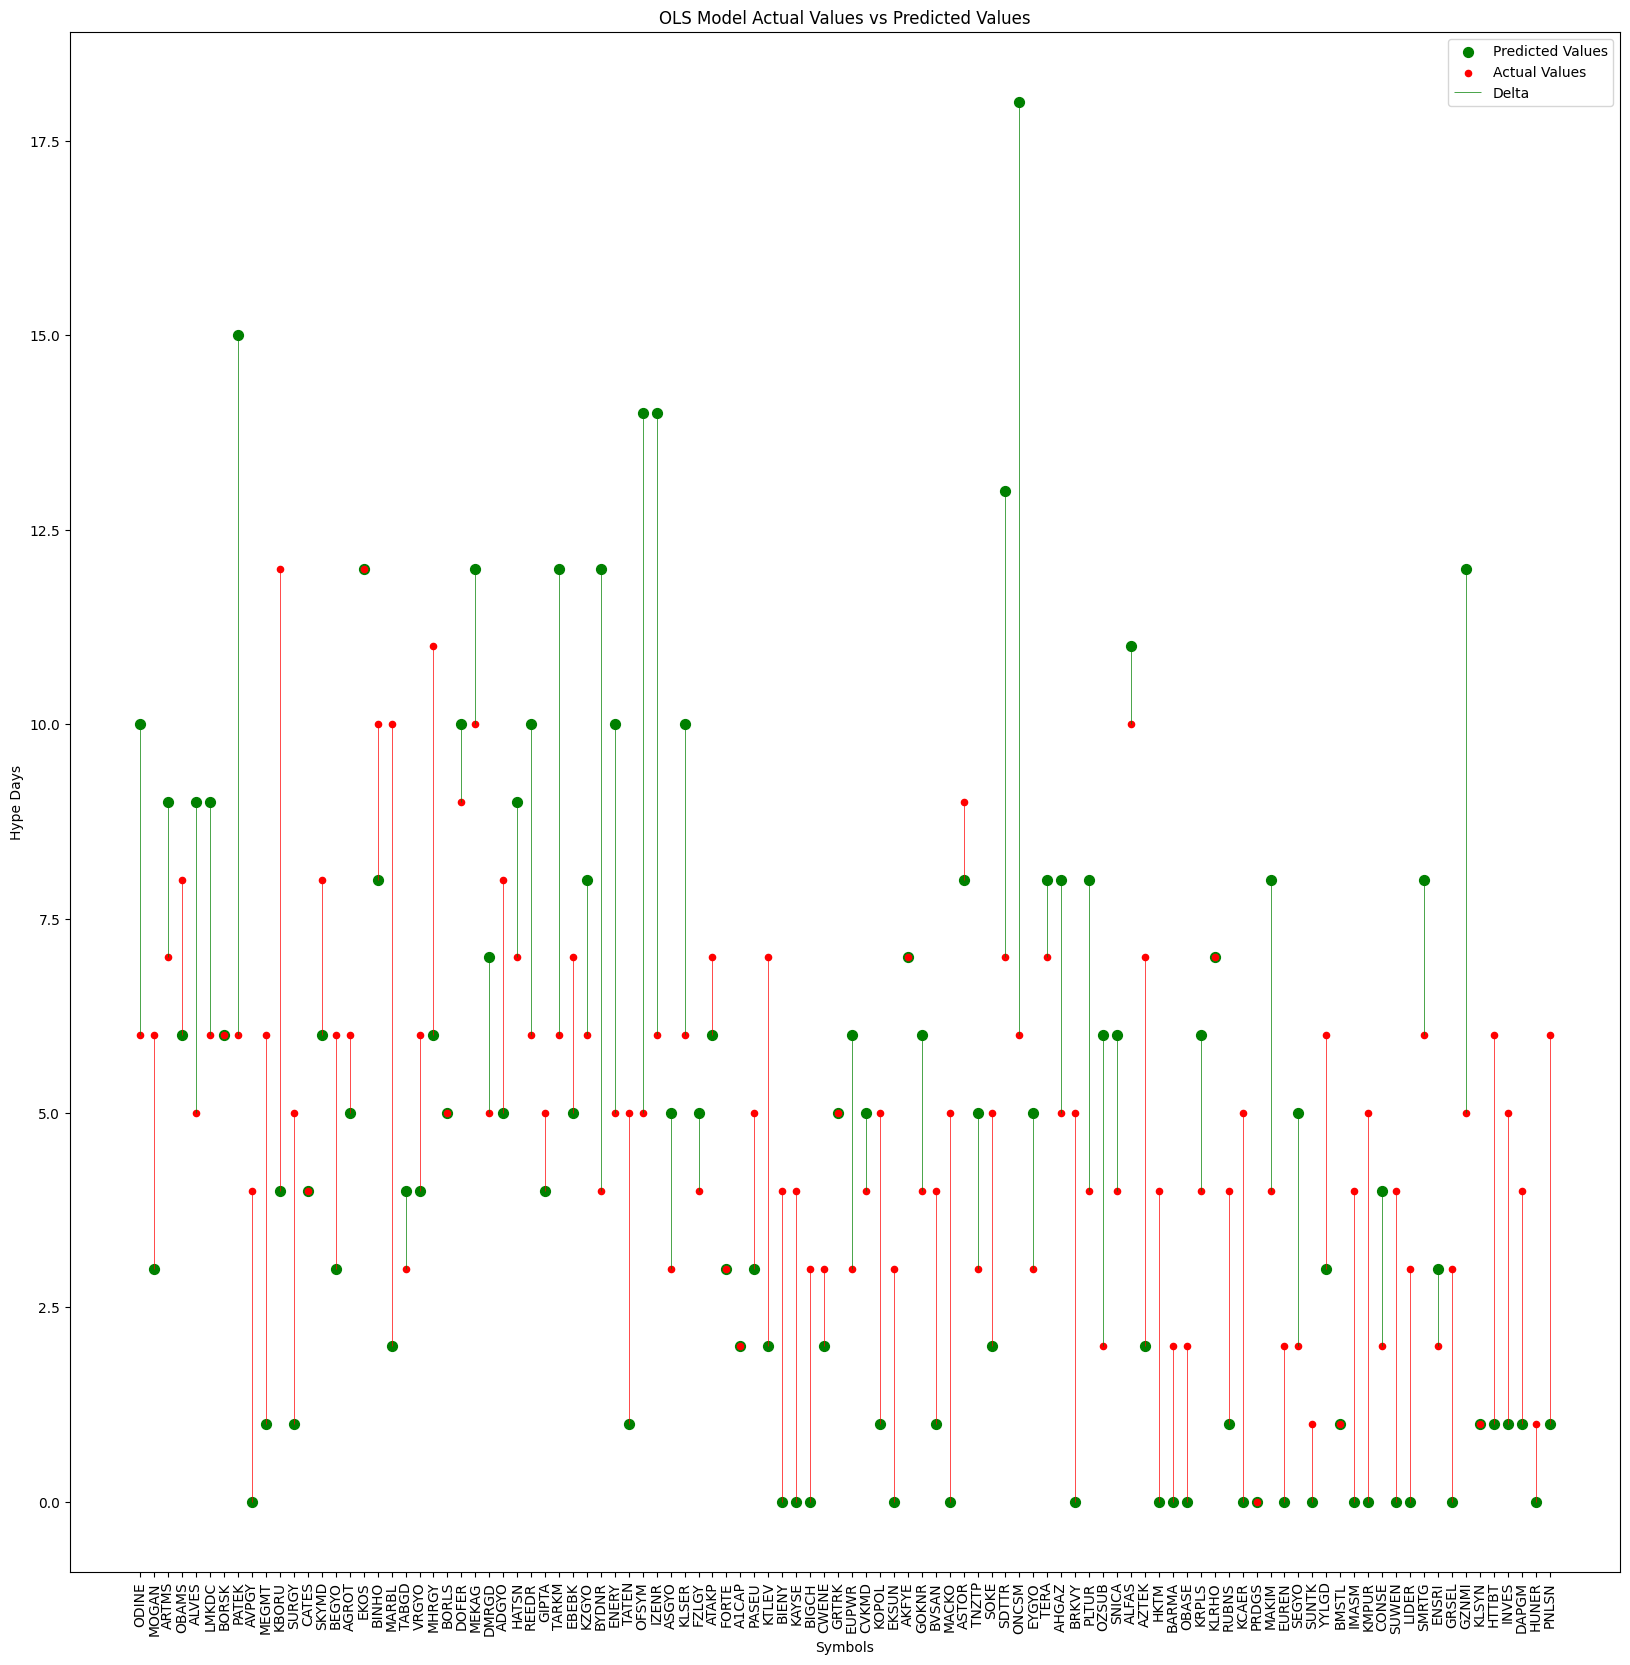

In [367]:
plt.figure(figsize=(20, 20))
plt.scatter(x=elnet_df["Symbol"], y=elnet_df["Actual_Values"], color="green", label="Predicted Values", s=50);
plt.scatter(x=elnet_df["Symbol"], y=elnet_df["Predicted_Values"], color="red", label="Actual Values", s=20);
plt.vlines(x=elnet_df["Symbol"], ymin=elnet_df[["Actual_Values", "Predicted_Values"]].min(axis=1), ymax=elnet_df[["Actual_Values", "Predicted_Values"]].max(axis=1), color=elnet_df["Delta"], linewidth = 0.5, label="Delta")
plt.title("OLS Model Actual Values vs Predicted Values")
plt.xlabel("Symbols")
plt.ylabel("Hype Days")
plt.legend()
plt.xticks(rotation=90);


For both OLS and ElasticNet models, results are really bad. For better results, other models can be tried or more data can be used. But either ways, the results won't be good enough. Based on my experiences, I can say that the results do not depend only on numerical values, they also depend on company background, supporters, period, company name, rumors and even name of company founders. Those are all pre-release parameters, also there are parameters  may change during release, like impact of participants. The impact of participants is the most important part, because they hold most of the stocks. If we consider all together, we can think of this as a chaos.